# Sommaire

* [Introduction](#introduction)
* [I) Importation des données](#i)
* [II) Nettoyage du jeu de données](#ii)
* [III) Analyses](#iii)
    * [1) Univariées](#iii1)
        * [i) Qualitatives](#iii1i)
        * [ii) Quantitatives](#iii1ii)
    * [2) Bivariées](#iii2)
        * [i) ANOVA](#iii2i)
        * [ii) Quantitatives](#iii2ii)
* [IV) Export](#iv)

# Introduction <a class="anchor" id="introduction"></a>
Des relevés relatifs à la consommation et aux émissions des bâtiments dans la ville de Seattle ont été effectués en 2016. A partir de ceux-ci nous allons tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées. Nous chercherons également à évaluer l'intérêt de l'ENERGYSTARScore pour la prédiction d'émissions. Ce sera l'objet des deux notebooks suivants.

Dans ce premier notebook, nous allons réaliser un nettoyage des données déjà recueillies ainsi qu'une analyse exploratoire.

# I) Importation des données <a class="anchor" id="i"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
raw_data

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3371                Horticulture building  1600 S Dakota St  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  ...  Electricity(kWh)  \
0     98101.0                    0659000030  ...      1.156514e+06   
1     98101.0                    0659000220  ...      9.504252e+05   
2     98101.0                    0659000475  ...      1.451544e+07   
3     98101.0                    0659000640  ...      8.115253e+05   
4     98121.0                    0659000970  ...      1.573449e+06   
...       ...                           ...  ...               ...   
3371      NaN                    1624049080  ...      1.536550e+05   
3372      NaN                    3558300000  ...      1.162210e+05   
3373      NaN                    1794501150  ...      5.252517e+05   
3374      NaN                    7883603155  ...      1.022480e+05   
3375      NaN                    7857002030  ...      1.267744e+05   

     Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0         3.946027e+06        12764.529300      1.276453e+06        False   
1         3.242851e+06        51450.816410      5.145082e+06        False   
2         4.952666e+07        14938.000000      1.493800e+06        False   
3         2.768924e+06        18112.130860      1.811213e+06        False   
4         5.368607e+06        88039.984380      8.803998e+06        False   
...                ...                 ...               ...          ...   
3371      5.242709e+05         3254.750244      3.254750e+05         True   
3372      3.965461e+05         5537.299805      5.537300e+05        False   
3373      1.792159e+06        39737.390630      3.973739e+06        False   
3374      3.488702e+05         3706.010010      3.706010e+05        False   
3375      4.325542e+05         7203.419922      7.203420e+05        False   

      Comments              ComplianceStatus  Outlier  TotalGHGEmissions  \
0          NaN                     Compliant      NaN             249.98   
1          NaN                     Compliant      NaN             295.86   
2          NaN                     Compliant      NaN            2089.28   
3          NaN                     Compliant      NaN             286.43   
4          NaN                     Compliant  

# II) Nettoyage du jeu de données <a class="anchor" id="ii"></a>

In [3]:
#Structure globale du dataframe
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [4]:
#On commence par supprimer les colonnes avec plus de 3000 valeurs manquantes
data_drop_na = raw_data.dropna(axis=1, thresh=len(raw_data) - 3000)
data_drop_na

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3371          50222      2016  Nonresidential COS              Office   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
3371                Horticulture building  1600 S Dakota St  Seattle    WA   
3372  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
3373                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
3374          South Park Community Center    8319 8th Ave S  Seattle    WA   
3375          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  ...  SiteEnergyUseWN(kBtu)  \
0     98101.0                    0659000030  ...           7.456910e+06   
1     98101.0                    0659000220  ...           8.664479e+06   
2     98101.0                    0659000475  ...           7.393711e+07   
3     98101.0                    0659000640  ...           6.946800e+06   
4     98121.0                    0659000970  ...           1.465650e+07   
...       ...                           ...  ...                    ...   
3371      NaN                    1624049080  ...           9.430032e+05   
3372      NaN                    3558300000  ...           1.053706e+06   
3373      NaN                    1794501150  ...           6.053764e+06   
3374      NaN                    7883603155  ...           7.828413e+05   
3375      NaN                    7857002030  ...           1.293722e+06   

     SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0        2003882.00      1.156514e+06       3.946027e+06        12764.529300   
1              0.00      9.504252e+05       3.242851e+06        51450.816410   
2       21566554.00      1.451544e+07       4.952666e+07        14938.000000   
3        2214446.25      8.115253e+05       2.768924e+06        18112.130860   
4              0.00      1.573449e+06       5.368607e+06        88039.984380   
...             ...               ...                ...                 ...   
3371           0.00      1.536550e+05       5.242709e+05         3254.750244   
3372           0.00      1.162210e+05       3.965461e+05         5537.299805   
3373           0.00      5.252517e+05       1.792159e+06        39737.390630   
3374           0.00      1.022480e+05       3.488702e+05         3706.010010   
3375           0.00      1.267744e+05       4.325542e+05         7203.419922   

      NaturalGas(kBtu)  DefaultData              ComplianceStatus  \
0         1.276453e+06        False                     Compliant   
1         5.145082e+06        False                     Compliant   
2         1.493800e+06        False                     Compliant   
3         1.811213e+06        False                   

In [5]:
#On reviendra sur les valeurs manquantes plus tard
#Pour se débarasser de la notation scientifique de certaines colonnes
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

#Pour afficher toutes les colonnes d'un coup
pd.set_option('display.max_columns', None)

In [6]:
#On va regarder s'il y a des doublons
data_drop_na.duplicated('OSEBuildingID').sum()

0

In [7]:
#On ne s'intéresse qu'aux bâtiments non résidentiels
data_drop_na['BuildingType'].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [8]:
#On se débarasse des types de bâtiments "Multifamily"
#On constate également un "Nonresidential WA", qu'on va changer en "NonResidential" pour harmoniser
data_drop_mf = data_drop_na[~data_drop_na['BuildingType'].str.contains("Multifamily")].reset_index(drop=True)
data_drop_mf['BuildingType'] = data_drop_mf['BuildingType'].replace('Nonresidential WA', 'NonResidential')
data_drop_mf

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
1663          50222      2016  Nonresidential COS              Office   
1664          50223      2016  Nonresidential COS               Other   
1665          50224      2016  Nonresidential COS               Other   
1666          50225      2016  Nonresidential COS  Mixed Use Property   
1667          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
1663                Horticulture building  1600 S Dakota St  Seattle    WA   
1664  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
1665                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
1666          South Park Community Center    8319 8th Ave S  Seattle    WA   
1667          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0    98101.00                    0659000030                    7   
1    98101.00                    0659000220                    7   
2    98101.00                    0659000475                    7   
3    98101.00                    0659000640                    7   
4    98121.00                    0659000970                    7   
...       ...                           ...                  ...   
1663      NaN                    1624049080                    2   
1664      NaN                    3558300000                    2   
1665      NaN                    1794501150                    7   
1666      NaN                    7883603155                    1   
1667      NaN                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN     47.61    -122.34       1927   
1                  DOWNTOWN     47.61    -122.33       1996   
2                  DOWNTOWN     47.61    -122.34       1969   
3                  DOWNTOWN     47.61    -122.34       1926   
4                  DOWNTOWN     47.61    -122.34       1980   
...                     ...       ...        ...        ...   
1663       GREATER DUWAMISH     47.57    -122.31       1990   
1664               DOWNTOWN     47.60    -122.32       2004   
1665  MAGNOLIA / QUEEN ANNE     47.64    -122.36       1974   
1666       GREATER DUWAMISH     47.53    -122.32       1989   
1667       GREATER DUWAMISH     47.54    -122.30       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1.00              12             88434                   0   
1                  1.00              11            103566               15064   
2                  1.00              41            956110              196718   
3                  1.00              10             61320                   0   
4                  1.00              18            175580               62000   
...                 ...             ...               ...                 ...   
1663               1.00               1            

In [9]:
#On vérifie
data_drop_mf['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus'], dtype=object)

In [10]:
#On vérifie maintenant que "PrimaryPropertyType" est cohérent
data_drop_mf['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    292
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             114
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             3
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [11]:
#On retrouve un type "Multifamily"
data_drop_mf.loc[data_drop_mf['PrimaryPropertyType'].str.contains("Multifamily")]

OSEBuildingID  DataYear    BuildingType   PrimaryPropertyType  \
632           19445      2016  NonResidential  Low-Rise Multifamily   
912           21481      2016          Campus  Low-Rise Multifamily   
1365          25674      2016  NonResidential  Low-Rise Multifamily   

                PropertyName             Address     City State  ZipCode  \
632           Pacific Pointe  2108 N Pacific St.  Seattle    WA 98103.00   
912          Sanitary Market   1525 FIrst Avenue  Seattle    WA 98101.00   
1365  (ID25674) COMET TAVERN       916 E PIKE ST  Seattle    WA 98122.00   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
632                     0354000254                    4   LAKE UNION   
912                     1976200210                    7     DOWNTOWN   
1365                    6003500480                    3         EAST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
632      47.65    -122.33       2000               1.00               3   
912      47.61    -122.34       1942               1.00               4   
1365     47.61    -122.32       1910               1.00               3   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
632              93079               36093                   56986   
912              45500                   0                   45500   
1365             32100                   0                   32100   

                              ListOfAllPropertyUseTypes  \
632                                 Multifamily Housing   
912   Bar/Nightclub, Food Sales, Multifamily Housing...   
1365                 Bar/Nightclub, Multifamily Housing   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
632     Multifamily Housing                   91064.00   
912     Multifamily Housing                   22669.00   
1365    Multifamily Housing                   21400.00   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
632                           NaN                              NaN   
912                  Retail Store                         10455.00   
1365                Bar/Nightclub                         10700.00   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
632                          NaN                             NaN   
912                   Restaurant                         3668.00   
1365                         NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
632             32.00             21.90               23.00   
912               NaN             85.20               85.20   
1365              NaN              3.40                4.50   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
632                63.10                 65.10           1997181.50   
912               267.50                267.50           3778355.00   
1365                4.30                  5.40            108200.40   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
632              2090011.62            0.00         511195.59   
912              3778355.00            0.00        1107372.38   
1365              142892.50            0.00           3332.50   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
632          1744199.00             2529.82         252982.00        False   
912          3778355.00                0.00              0.00        False   
1365           11370.00              968.30          96830.00        False   

     ComplianceStatus  TotalGHGEmissions  GHGEmissionsIntensity  
632         Compliant              25.60                   0.28  
912         Compliant              26.34                   0.58  
1365    Non-Compliant               5.22                   0.16

In [12]:
#Une rapide recherche google m'informe que Pacific Pointe est un immeuble, et donc résidentiel
#En revanche Sanitary Market devrait être un "Supermarket / Grocery Store"
#Et Comet Tavern, en tant que bar je le rangerais plutôt avec les restaurants
data_ppt = data_drop_mf[data_drop_mf['OSEBuildingID'] != 19445].copy().reset_index(drop=True)
data_ppt.loc[data_ppt['OSEBuildingID'] == 21481, 'PrimaryPropertyType'] = 'Supermarket / Grocery Store'
data_ppt.loc[data_ppt['OSEBuildingID'] == 25674, 'PrimaryPropertyType'] = 'Restaurant'
data_ppt

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
1662          50222      2016  Nonresidential COS              Office   
1663          50223      2016  Nonresidential COS               Other   
1664          50224      2016  Nonresidential COS               Other   
1665          50225      2016  Nonresidential COS  Mixed Use Property   
1666          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName           Address     City State  \
0                    Mayflower park hotel     405 Olive way  Seattle    WA   
1                         Paramount Hotel   724 Pine street  Seattle    WA   
2                 5673-The Westin Seattle   1900 5th Avenue  Seattle    WA   
3                               HOTEL MAX    620 STEWART ST  Seattle    WA   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST  Seattle    WA   
...                                   ...               ...      ...   ...   
1662                Horticulture building  1600 S Dakota St  Seattle    WA   
1663  International district/Chinatown CC     719 8th Ave S  Seattle    WA   
1664                      Queen Anne Pool    1920 1st Ave W  Seattle    WA   
1665          South Park Community Center    8319 8th Ave S  Seattle    WA   
1666          Van Asselt Community Center  2820 S Myrtle St  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0    98101.00                    0659000030                    7   
1    98101.00                    0659000220                    7   
2    98101.00                    0659000475                    7   
3    98101.00                    0659000640                    7   
4    98121.00                    0659000970                    7   
...       ...                           ...                  ...   
1662      NaN                    1624049080                    2   
1663      NaN                    3558300000                    2   
1664      NaN                    1794501150                    7   
1665      NaN                    7883603155                    1   
1666      NaN                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN     47.61    -122.34       1927   
1                  DOWNTOWN     47.61    -122.33       1996   
2                  DOWNTOWN     47.61    -122.34       1969   
3                  DOWNTOWN     47.61    -122.34       1926   
4                  DOWNTOWN     47.61    -122.34       1980   
...                     ...       ...        ...        ...   
1662       GREATER DUWAMISH     47.57    -122.31       1990   
1663               DOWNTOWN     47.60    -122.32       2004   
1664  MAGNOLIA / QUEEN ANNE     47.64    -122.36       1974   
1665       GREATER DUWAMISH     47.53    -122.32       1989   
1666       GREATER DUWAMISH     47.54    -122.30       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1.00              12             88434                   0   
1                  1.00              11            103566               15064   
2                  1.00              41            956110              196718   
3                  1.00              10             61320                   0   
4                  1.00              18            175580               62000   
...                 ...             ...               ...                 ...   
1662               1.00               1            

In [13]:
#Il y a également 3 "Office", on va voir s'ils ne pourraient pas rejoindre Small- and Mid-Sized Office ou Large Office
data_ppt.loc[data_ppt['PrimaryPropertyType'] == 'Office']

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
1657          50210      2016  Nonresidential COS              Office   
1660          50220      2016  Nonresidential COS              Office   
1662          50222      2016  Nonresidential COS              Office   

                      PropertyName           Address     City State  ZipCode  \
1657  Central West HQ / Brown Bear       1403 w howe  Seattle    WA      NaN   
1660              Genesee/SC SE HQ    4420 S Genesee  Seattle    WA      NaN   
1662         Horticulture building  1600 S Dakota St  Seattle    WA      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
1657                    2425039137                    7   
1660                    4154300585                    2   
1662                    1624049080                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
1657  MAGNOLIA / QUEEN ANNE     47.64    -122.38       1952   
1660              SOUTHEAST     47.56    -122.28       1960   
1662       GREATER DUWAMISH     47.57    -122.31       1990   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1657               1.00               1             13661                   0   
1660               1.00               1             15398                   0   
1662               1.00               1             12294                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
1657                   13661                    Office                 Office   
1660                   15398                    Office                 Office   
1662                   12294                    Office                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
1657                   13661.00                          NaN   
1660                   15398.00                          NaN   
1662                   12294.00                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
1657                              NaN                         NaN   
1660                              NaN                         NaN   
1662                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
1657                             NaN            75.00             36.80   
1660                             NaN            93.00             25.20   
1662                             NaN            46.00             69.10   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
1657               40.90              115.50                128.40   
1660               26.90               64.10                 66.70   
1662               76.70              161.70                176.10   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
1657            502667.69              558525.12            0.00   
1660            387810.00              414172.41            0.00   
1662            849745.69              943003.19            0.00   

      Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
1657         147323.50          502667.78                0.00   
1660          81341.40          277536.85             1102.73   
1662         153655.00          524270.86             3254.75   

      NaturalGas(kBtu)  DefaultData              ComplianceStatus  \
1657              0.00         True  Error - Correct Default Data   
1660         110273.00         True  Error - Correct Default Data   
1662         325475.02         True  Error - Correct Default Data   

      TotalGHGEmissions  GHGEmissionsIntensity  
1657               3.50                   0.26  
1660               7.79                   0.51  
1662              20.94                   1.70

In [14]:
#Pour comparer
data_ppt.loc[data_ppt['PrimaryPropertyType'] == 'Small- and Mid-Sized Office'].sort_values('PropertyGFATotal').head(10)

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
1015          22574      2016  NonResidential  Small- and Mid-Sized Office   
673           19853      2016  NonResidential  Small- and Mid-Sized Office   
1268          24708      2016  NonResidential  Small- and Mid-Sized Office   
1226          24488      2016  NonResidential  Small- and Mid-Sized Office   
700           20033      2016  NonResidential  Small- and Mid-Sized Office   
1508          27567      2016  NonResidential  Small- and Mid-Sized Office   
1246          24591      2016  NonResidential  Small- and Mid-Sized Office   
794           20871      2016  NonResidential  Small- and Mid-Sized Office   
1546          28081      2016  NonResidential  Small- and Mid-Sized Office   
508           19755      2016  NonResidential  Small- and Mid-Sized Office   

                             PropertyName                   Address     City  \
1015            Nickerson Business Center     3837 13th Avenue West  Seattle   
673                     Hartford Building               600 2nd Ave  Seattle   
1268                                  820             820 1st Ave S  Seattle   
1226  Hawthorne Hills Professional Center          4020 NE 55th St.  Seattle   
700                      Lisa Li Building          4907 25th Ave NE  Seattle   
1508                      4010 Associates      4010 Stone Way North  Seattle   
1246                2724 1st Avenue South     2724 1st Avenue South  Seattle   
794                The Production Network  1000 North Northlake Way  Seattle   
1546                  Brown Bear Car Wash         3977 Leary Way NW  Seattle   
508                    2607 Building, LLC           2607 2nd Avenue  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
1015    WA 98119.00                    2770604870                    7   
673     WA 98104.00                    0939000115                    7   
1268    WA 98134.00                    7666206631                    2   
1226    WA 98105.00                    7974700160                    4   
700     WA 98105.00                    0925049118                    4   
1508    WA 98020.00                    4452300055                    4   
1246    WA 98134.00                    7666206040                    2   
794     WA 98103.00                    1825049143                    4   
1546    WA 98107.00                    7442000545                    6   
508     WA 98121.00                    0654000120                    7   

               Neighborhood  Latitude  Longitude  YearBuilt  \
1015  MAGNOLIA / QUEEN ANNE     47.66    -122.37       1961   
673                DOWNTOWN     47.60    -122.33       1929   
1268       GREATER DUWAMISH     47.60    -122.33       1920   
1226              NORTHEAST     47.67    -122.28       1967   
700               NORTHEAST     47.66    -122.30       1989   
1508             LAKE UNION     47.66    -122.34       1995   
1246       GREATER DUWAMISH     47.58    -122.33       1926   
794              LAKE UNION     47.65    -122.35       1900   
1546                Ballard     47.66    -122.36       1988   
508                DOWNTOWN     47.62    -122.35       1925   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1015               1.00               2             20022                   0   
673                1.00               2             20028                   0   
1268               1.00               2             20150                   0   
1226               1.00               2             20317                   0   
700                1.00               2             20384                   0   
1508               1.00               3             20410                   0   
1246               1.00               1             20460                   0   
794                1.00               2             20500                   0   
1546               1.00     

In [15]:
#Il semblerait qu'il s'agisse de 3 petits bureaux
data_ppt['PrimaryPropertyType'].replace({'Office': 'Small- and Mid-Sized Office'}, inplace=True)

In [16]:
#On regarde combien de valeurs uniques il y a par colonne
data_ppt.nunique()

OSEBuildingID                      1667
DataYear                              1
BuildingType                          4
PrimaryPropertyType                  20
PropertyName                       1663
Address                            1646
City                                  1
State                                 1
ZipCode                              48
TaxParcelIdentificationNumber      1586
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           1496
Longitude                          1407
YearBuilt                           113
NumberofBuildings                    16
NumberofFloors                       45
PropertyGFATotal                   1589
PropertyGFAParking                  326
PropertyGFABuilding(s)             1584
ListOfAllPropertyUseTypes           372
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          1560
SecondLargestPropertyUseType         47
SecondLargestPropertyUseTypeGFA     699


In [17]:
#Les colonnes avec une seule valeur unique (year, city, state) n'apporteront rien à l'analyse/prédiction
data_no_unique = data_ppt.drop(data_ppt.columns[data_ppt.nunique() == 1], axis=1)
data_no_unique

OSEBuildingID        BuildingType          PrimaryPropertyType  \
0                 1      NonResidential                        Hotel   
1                 2      NonResidential                        Hotel   
2                 3      NonResidential                        Hotel   
3                 5      NonResidential                        Hotel   
4                 8      NonResidential                        Hotel   
...             ...                 ...                          ...   
1662          50222  Nonresidential COS  Small- and Mid-Sized Office   
1663          50223  Nonresidential COS                        Other   
1664          50224  Nonresidential COS                        Other   
1665          50225  Nonresidential COS           Mixed Use Property   
1666          50226  Nonresidential COS           Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way 98101.00   
1                         Paramount Hotel   724 Pine street 98101.00   
2                 5673-The Westin Seattle   1900 5th Avenue 98101.00   
3                               HOTEL MAX    620 STEWART ST 98101.00   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST 98121.00   
...                                   ...               ...      ...   
1662                Horticulture building  1600 S Dakota St      NaN   
1663  International district/Chinatown CC     719 8th Ave S      NaN   
1664                      Queen Anne Pool    1920 1st Ave W      NaN   
1665          South Park Community Center    8319 8th Ave S      NaN   
1666          Van Asselt Community Center  2820 S Myrtle St      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                    7   
1                       0659000220                    7   
2                       0659000475                    7   
3                       0659000640                    7   
4                       0659000970                    7   
...                            ...                  ...   
1662                    1624049080                    2   
1663                    3558300000                    2   
1664                    1794501150                    7   
1665                    7883603155                    1   
1666                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN     47.61    -122.34       1927   
1                  DOWNTOWN     47.61    -122.33       1996   
2                  DOWNTOWN     47.61    -122.34       1969   
3                  DOWNTOWN     47.61    -122.34       1926   
4                  DOWNTOWN     47.61    -122.34       1980   
...                     ...       ...        ...        ...   
1662       GREATER DUWAMISH     47.57    -122.31       1990   
1663               DOWNTOWN     47.60    -122.32       2004   
1664  MAGNOLIA / QUEEN ANNE     47.64    -122.36       1974   
1665       GREATER DUWAMISH     47.53    -122.32       1989   
1666       GREATER DUWAMISH     47.54    -122.30       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1.00              12             88434                   0   
1                  1.00              11            103566               15064   
2                  1.00              41            956110              196718   
3                  1.00              10             61320                   0   
4                  1.00              18            175580               62000   
...                 ...             ...               ...                 ...   
1662               1.00               1             12294                   0   
1663               1.00               1             16000                   0   
1664               1.00               1             13157                   0   


In [18]:
#Pour me rafraîchir la mémoire
data_no_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1667 non-null   int64  
 1   BuildingType                     1667 non-null   object 
 2   PrimaryPropertyType              1667 non-null   object 
 3   PropertyName                     1667 non-null   object 
 4   Address                          1667 non-null   object 
 5   ZipCode                          1651 non-null   float64
 6   TaxParcelIdentificationNumber    1667 non-null   object 
 7   CouncilDistrictCode              1667 non-null   int64  
 8   Neighborhood                     1667 non-null   object 
 9   Latitude                         1667 non-null   float64
 10  Longitude                        1667 non-null   float64
 11  YearBuilt                        1667 non-null   int64  
 12  NumberofBuildings   

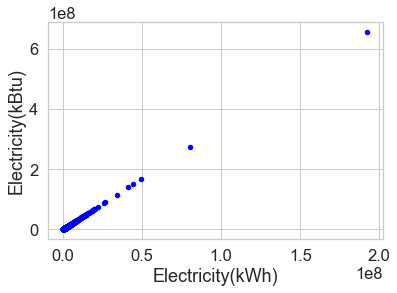

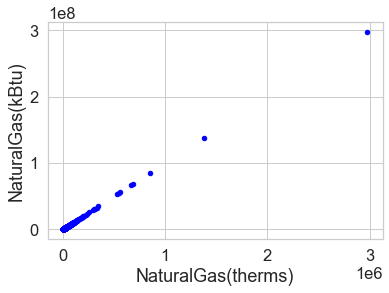

In [19]:
#Deux couples de variables (Electricity et NaturalGas) sont exprimées dans des unités différentes
sns.set_theme(style='whitegrid', palette='dark', font_scale=1.5)

data_no_unique.plot.scatter("Electricity(kWh)", "Electricity(kBtu)", color='blue')
plt.show()

data_no_unique.plot.scatter("NaturalGas(therms)", "NaturalGas(kBtu)", color='blue')
plt.show()

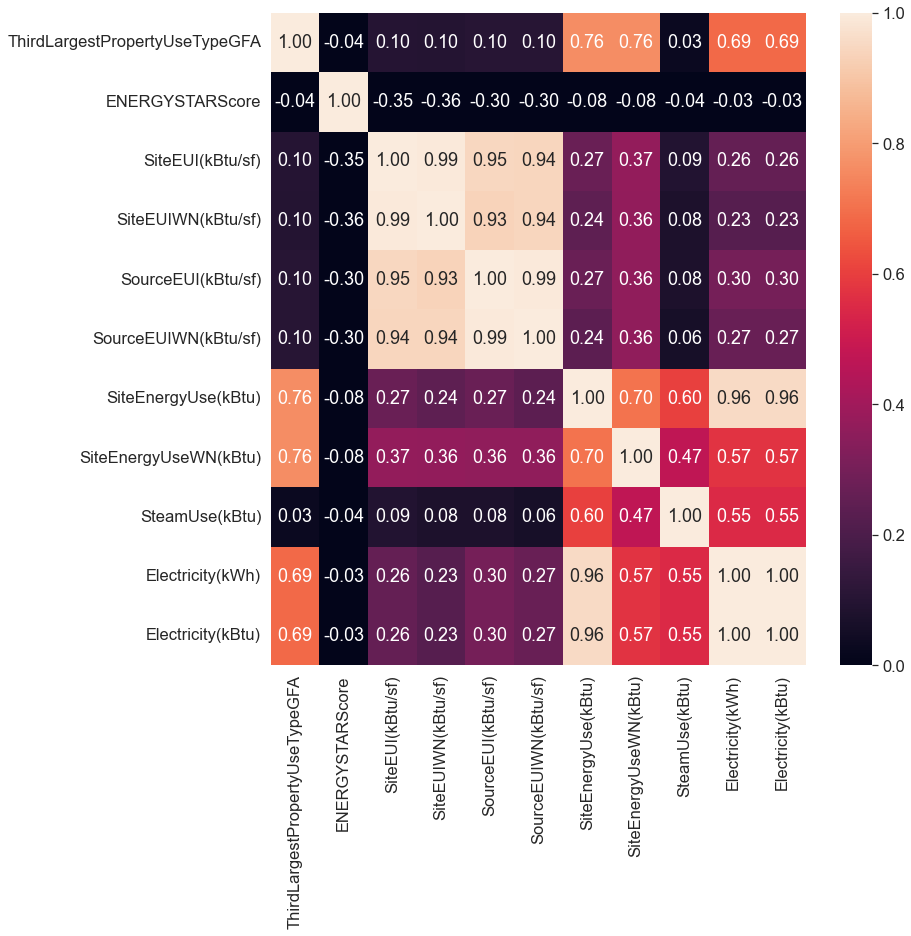

In [20]:
#Ces couples de variables semblent parfaitement corrélés, pour en avoir le coeur net
plt.figure(figsize=(12,12))
sns.heatmap(data_no_unique.iloc[:, 23:34].corr(), vmin=0, annot=True, fmt='.2f')
plt.show()

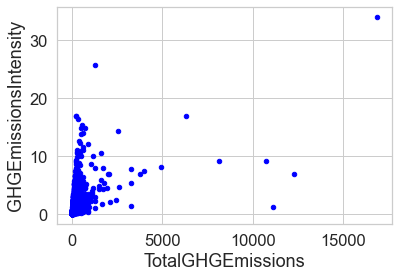

In [21]:
#Il semblerait qu'on ait vu juste, on va pouvoir faire un peu de ménage
#On constate que les variables "WN" sont très fortement corrélées à leur alter ego également
#Par curiosité
data_no_unique.plot.scatter("TotalGHGEmissions", "GHGEmissionsIntensity", color='blue')
plt.show()

In [22]:
#On conserve les unités britanniques par souci de conformité avec les autres colonnes
#Les colonnes contenant "WN" sont des colonnes normalisées en fonction des conditions climatiques, on les garde pour l'instant
#On garde également les colonnes "DefaultData" et "ComplianceStatus", même si je ne suis pas encore convaincu de leur pertinence
data_kbtu = data_no_unique.drop(columns=["Electricity(kWh)", "NaturalGas(therms)"])
data_kbtu

OSEBuildingID        BuildingType          PrimaryPropertyType  \
0                 1      NonResidential                        Hotel   
1                 2      NonResidential                        Hotel   
2                 3      NonResidential                        Hotel   
3                 5      NonResidential                        Hotel   
4                 8      NonResidential                        Hotel   
...             ...                 ...                          ...   
1662          50222  Nonresidential COS  Small- and Mid-Sized Office   
1663          50223  Nonresidential COS                        Other   
1664          50224  Nonresidential COS                        Other   
1665          50225  Nonresidential COS           Mixed Use Property   
1666          50226  Nonresidential COS           Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way 98101.00   
1                         Paramount Hotel   724 Pine street 98101.00   
2                 5673-The Westin Seattle   1900 5th Avenue 98101.00   
3                               HOTEL MAX    620 STEWART ST 98101.00   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST 98121.00   
...                                   ...               ...      ...   
1662                Horticulture building  1600 S Dakota St      NaN   
1663  International district/Chinatown CC     719 8th Ave S      NaN   
1664                      Queen Anne Pool    1920 1st Ave W      NaN   
1665          South Park Community Center    8319 8th Ave S      NaN   
1666          Van Asselt Community Center  2820 S Myrtle St      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                    7   
1                       0659000220                    7   
2                       0659000475                    7   
3                       0659000640                    7   
4                       0659000970                    7   
...                            ...                  ...   
1662                    1624049080                    2   
1663                    3558300000                    2   
1664                    1794501150                    7   
1665                    7883603155                    1   
1666                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN     47.61    -122.34       1927   
1                  DOWNTOWN     47.61    -122.33       1996   
2                  DOWNTOWN     47.61    -122.34       1969   
3                  DOWNTOWN     47.61    -122.34       1926   
4                  DOWNTOWN     47.61    -122.34       1980   
...                     ...       ...        ...        ...   
1662       GREATER DUWAMISH     47.57    -122.31       1990   
1663               DOWNTOWN     47.60    -122.32       2004   
1664  MAGNOLIA / QUEEN ANNE     47.64    -122.36       1974   
1665       GREATER DUWAMISH     47.53    -122.32       1989   
1666       GREATER DUWAMISH     47.54    -122.30       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1.00              12             88434                   0   
1                  1.00              11            103566               15064   
2                  1.00              41            956110              196718   
3                  1.00              10             61320                   0   
4                  1.00              18            175580               62000   
...                 ...             ...               ...                 ...   
1662               1.00               1             12294                   0   
1663               1.00               1             16000                   0   
1664               1.00               1             13157                   0   


In [23]:
#On regarde les valeurs manquantes par ligne
data_kbtu.isna().sum(axis=1).sort_values(ascending=False)

1422    20
568     20
347      7
1367     7
1658     6
        ..
1122     0
77       0
76       0
561      0
677      0
Length: 1667, dtype: int64

In [24]:
#Deux lignes sortent du lot
data_kbtu.loc[[568, 1422]]

OSEBuildingID    BuildingType          PrimaryPropertyType  \
568             773  NonResidential  Small- and Mid-Sized Office   
1422          26532  NonResidential           Mixed Use Property   

          PropertyName                 Address  ZipCode  \
568   SEATTLE BUILDING         215 COLUMBIA ST 98104.00   
1422  KALBERG BUILDING  4515 UNIVERSITY WAY NE 98105.00   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
568                     0939000245                    7     DOWNTOWN   
1422                    8816401120                    4    NORTHEAST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
568      47.60    -122.33       1924                NaN               4   
1422     47.66    -122.31       1928                NaN               2   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
568              63150                   0                   63150   
1422             20760                   0                   20760   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
568                        NaN                    NaN   
1422                       NaN                    NaN   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
568                         NaN                          NaN   
1422                        NaN                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
568                               NaN                         NaN   
1422                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
568                              NaN              NaN               NaN   
1422                             NaN              NaN               NaN   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
568                  NaN                 NaN                   NaN   
1422                 NaN                 NaN                   NaN   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
568                   NaN                    NaN             NaN   
1422                  NaN                    NaN             NaN   

      Electricity(kBtu)  NaturalGas(kBtu)  DefaultData ComplianceStatus  \
568                 NaN               NaN        False    Non-Compliant   
1422                NaN               NaN        False    Non-Compliant   

      TotalGHGEmissions  GHGEmissionsIntensity  
568                 NaN                    NaN  
1422                NaN                    NaN

In [25]:
#Effectivement, trop de valeurs manquantes pour envisager une imputation
data_drop_lm = data_kbtu.drop([568, 1422]).reset_index(drop=True)
data_drop_lm

OSEBuildingID        BuildingType          PrimaryPropertyType  \
0                 1      NonResidential                        Hotel   
1                 2      NonResidential                        Hotel   
2                 3      NonResidential                        Hotel   
3                 5      NonResidential                        Hotel   
4                 8      NonResidential                        Hotel   
...             ...                 ...                          ...   
1660          50222  Nonresidential COS  Small- and Mid-Sized Office   
1661          50223  Nonresidential COS                        Other   
1662          50224  Nonresidential COS                        Other   
1663          50225  Nonresidential COS           Mixed Use Property   
1664          50226  Nonresidential COS           Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way 98101.00   
1                         Paramount Hotel   724 Pine street 98101.00   
2                 5673-The Westin Seattle   1900 5th Avenue 98101.00   
3                               HOTEL MAX    620 STEWART ST 98101.00   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST 98121.00   
...                                   ...               ...      ...   
1660                Horticulture building  1600 S Dakota St      NaN   
1661  International district/Chinatown CC     719 8th Ave S      NaN   
1662                      Queen Anne Pool    1920 1st Ave W      NaN   
1663          South Park Community Center    8319 8th Ave S      NaN   
1664          Van Asselt Community Center  2820 S Myrtle St      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                    7   
1                       0659000220                    7   
2                       0659000475                    7   
3                       0659000640                    7   
4                       0659000970                    7   
...                            ...                  ...   
1660                    1624049080                    2   
1661                    3558300000                    2   
1662                    1794501150                    7   
1663                    7883603155                    1   
1664                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN     47.61    -122.34       1927   
1                  DOWNTOWN     47.61    -122.33       1996   
2                  DOWNTOWN     47.61    -122.34       1969   
3                  DOWNTOWN     47.61    -122.34       1926   
4                  DOWNTOWN     47.61    -122.34       1980   
...                     ...       ...        ...        ...   
1660       GREATER DUWAMISH     47.57    -122.31       1990   
1661               DOWNTOWN     47.60    -122.32       2004   
1662  MAGNOLIA / QUEEN ANNE     47.64    -122.36       1974   
1663       GREATER DUWAMISH     47.53    -122.32       1989   
1664       GREATER DUWAMISH     47.54    -122.30       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1.00              12             88434                   0   
1                  1.00              11            103566               15064   
2                  1.00              41            956110              196718   
3                  1.00              10             61320                   0   
4                  1.00              18            175580               62000   
...                 ...             ...               ...                 ...   
1660               1.00               1             12294                   0   
1661               1.00               1             16000                   0   
1662               1.00               1             13157                   0   


In [26]:
data_drop_lm.describe().T

count       mean         std        min  \
OSEBuildingID                   1665.00   16337.70    13840.04       1.00   
ZipCode                         1649.00   98116.84       18.44   98006.00   
CouncilDistrictCode             1665.00       4.36        2.19       1.00   
Latitude                        1665.00      47.62        0.05      47.50   
Longitude                       1665.00    -122.33        0.02    -122.41   
YearBuilt                       1665.00    1961.93       32.73    1900.00   
NumberofBuildings               1665.00       1.17        2.93       0.00   
NumberofFloors                  1665.00       4.12        6.57       0.00   
PropertyGFATotal                1665.00  118950.56   297616.61   11285.00   
PropertyGFAParking              1665.00   12899.54    42306.42       0.00   
PropertyGFABuilding(s)          1665.00  106051.01   284455.51    3636.00   
LargestPropertyUseTypeGFA       1661.00   98769.32   276794.33    5656.00   
SecondLargestPropertyUseTypeGFA  855.00   36804.16    69845.26       0.00   
ThirdLargestPropertyUseTypeGFA   353.00   14923.14    36790.56       0.00   
ENERGYSTARScore                 1093.00      65.48       28.49       1.00   
SiteEUI(kBtu/sf)                1664.00      72.19       74.06       0.00   
SiteEUIWN(kBtu/sf)              1664.00      74.60       75.04       0.00   
SourceEUI(kBtu/sf)              1665.00     175.90      185.97       0.00   
SourceEUIWN(kBtu/sf)            1665.00     178.16      185.95      -2.10   
SiteEnergyUse(kBtu)             1665.00 8441801.54 30252477.43       0.00   
SiteEnergyUseWN(kBtu)           1664.00 8068381.05 22044914.32       0.00   
SteamUse(kBtu)                  1665.00  512880.42  5515585.95       0.00   
Electricity(kBtu)               1665.00 5845954.86 20802730.44 -115417.00   
NaturalGas(kBtu)                1665.00 1971876.39  9373534.33       0.00   
TotalGHGEmissions               1665.00     185.07      752.19      -0.80   
GHGEmissionsIntensity           1665.00       1.61        2.34      -0.02   

                                       25%        50%        75%          max  
OSEBuildingID                       582.00   21145.00   24602.00     50226.00  
ZipCode                           98105.00   98109.00   98125.00     98199.00  
CouncilDistrictCode                   2.00       4.00       7.00         7.00  
Latitude                             47.59      47.61      47.65        47.73  
Longitude                          -122.34    -122.33    -122.32      -122.26  
YearBuilt                          1930.00    1965.00    1989.00      2015.00  
NumberofBuildings                     1.00       1.00       1.00       111.00  
NumberofFloors                        1.00       2.00       4.00        99.00  
PropertyGFATotal                  29498.00   49280.00  106000.00   9320156.00  
PropertyGFAParking                    0.00       0.00       0.00    512608.00  
PropertyGFABuilding(s)            28492.00   47368.00   94900.00   9320156.00  
LargestPropertyUseTypeGFA         25521.00   43728.00   92000.00   9320156.00  
SecondLargestPropertyUseTypeGFA    5350.00   12000.00   31881.00    686750.00  
ThirdLargestPropertyUseTypeGFA     2663.00    5931.00   12941.00    459748.00  
ENERGYSTARScore                      48.00      73.00      89.00       100.00  
SiteEUI(kBtu/sf)                     33.70      51.90      81.70       834.40  
SiteEUIWN(kBtu/sf)                   35.40      53.90      85.20       834.40  
SourceEUI(kBtu/sf)                   76.60     131.00     204.00      2620.00  
SourceEUIWN(kBtu/sf)                 79.40     134.20     205.80      2620.00  
SiteEnergyUse(kBtu)             1228113.50 2556131.00 6917280.00 873923712.00  
SiteEnergyUseWN(kBtu)           1294392.03 2686911.12 7123115.25 471613856.00  
SteamUse(kBtu)                        0.00       0.00       0.00 134943456.00  
Electricity(kBtu)                720945.00 1611215.00 4855036.00 657074389.00  
NaturalGas(kBtu)                  

In [27]:
#J'ai du mal à croire que la consommation en électricité puisse être négative
data_drop_lm.sort_values('Electricity(kBtu)').head(5)

OSEBuildingID       BuildingType          PrimaryPropertyType  \
1602          49784     NonResidential  Small- and Mid-Sized Office   
151             242  SPS-District K-12                  K-12 School   
420           23854     NonResidential                   Restaurant   
132             217  SPS-District K-12                  K-12 School   
1586          49703  SPS-District K-12                  K-12 School   

                 PropertyName              Address  ZipCode  \
1602           Bullitt Center  1501 E. Madison St. 98122.00   
151   Olympic View Elementary    504 N.E. 95th St. 98115.00   
420                   Pier 57     1301 Alaskan Way 98101.00   
132            Whitman Middle   9201 15th Ave. NW. 98117.00   
1586     Catharine Blaine K-8    2550 34th Ave. W. 98199.00   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
1602                    7234600195                    3   
151                     5100404840                    5   
420                     7666202435                    7   
132                     3526039131                    6   
1586                    2225039016                    7   

               Neighborhood  Latitude  Longitude  YearBuilt  \
1602                CENTRAL     47.61    -122.31       2013   
151                   NORTH     47.70    -122.32       1989   
420                DOWNTOWN     47.61    -122.34       1900   
132                 BALLARD     47.70    -122.38       1959   
1586  MAGNOLIA / QUEEN ANNE     47.64    -122.40       1952   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1602               1.00               6             52000                   0   
151                1.00               2             52792                   0   
420                1.00               1             43728                   0   
132                1.00               1            160270                   0   
1586               1.00               1            116101                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
1602                   52000                    Office                 Office   
151                    52792               K-12 School            K-12 School   
420                    43728                Restaurant             Restaurant   
132                   160270               K-12 School            K-12 School   
1586                  116101               K-12 School            K-12 School   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
1602                   48159.00                          NaN   
151                    55480.00                          NaN   
420                    43728.00                          NaN   
132                   160270.00                          NaN   
1586                  119685.00                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
1602                              NaN                         NaN   
151                               NaN                         NaN   
420                               NaN                         NaN   
132                               NaN                         NaN   
1586                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
1602                             NaN           100.00              7.10   
151                              NaN              NaN              0.00   
420                              NaN              NaN            263.20   
132                              NaN              NaN              0.00   
1586                             NaN              NaN              0.00   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
1602                5.00                2.00                 -2.10   
151                 0.00                0.00                  0.00   
420               271.10       

In [28]:
#On drop
data_drop_nv = data_drop_lm.loc[data_drop_lm['Electricity(kBtu)'] >= 0].reset_index(drop=True)
data_drop_nv

OSEBuildingID        BuildingType          PrimaryPropertyType  \
0                 1      NonResidential                        Hotel   
1                 2      NonResidential                        Hotel   
2                 3      NonResidential                        Hotel   
3                 5      NonResidential                        Hotel   
4                 8      NonResidential                        Hotel   
...             ...                 ...                          ...   
1659          50222  Nonresidential COS  Small- and Mid-Sized Office   
1660          50223  Nonresidential COS                        Other   
1661          50224  Nonresidential COS                        Other   
1662          50225  Nonresidential COS           Mixed Use Property   
1663          50226  Nonresidential COS           Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way 98101.00   
1                         Paramount Hotel   724 Pine street 98101.00   
2                 5673-The Westin Seattle   1900 5th Avenue 98101.00   
3                               HOTEL MAX    620 STEWART ST 98101.00   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST 98121.00   
...                                   ...               ...      ...   
1659                Horticulture building  1600 S Dakota St      NaN   
1660  International district/Chinatown CC     719 8th Ave S      NaN   
1661                      Queen Anne Pool    1920 1st Ave W      NaN   
1662          South Park Community Center    8319 8th Ave S      NaN   
1663          Van Asselt Community Center  2820 S Myrtle St      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                    7   
1                       0659000220                    7   
2                       0659000475                    7   
3                       0659000640                    7   
4                       0659000970                    7   
...                            ...                  ...   
1659                    1624049080                    2   
1660                    3558300000                    2   
1661                    1794501150                    7   
1662                    7883603155                    1   
1663                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN     47.61    -122.34       1927   
1                  DOWNTOWN     47.61    -122.33       1996   
2                  DOWNTOWN     47.61    -122.34       1969   
3                  DOWNTOWN     47.61    -122.34       1926   
4                  DOWNTOWN     47.61    -122.34       1980   
...                     ...       ...        ...        ...   
1659       GREATER DUWAMISH     47.57    -122.31       1990   
1660               DOWNTOWN     47.60    -122.32       2004   
1661  MAGNOLIA / QUEEN ANNE     47.64    -122.36       1974   
1662       GREATER DUWAMISH     47.53    -122.32       1989   
1663       GREATER DUWAMISH     47.54    -122.30       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1.00              12             88434                   0   
1                  1.00              11            103566               15064   
2                  1.00              41            956110              196718   
3                  1.00              10             61320                   0   
4                  1.00              18            175580               62000   
...                 ...             ...               ...                 ...   
1659               1.00               1             12294                   0   
1660               1.00               1             16000                   0   
1661               1.00               1             13157                   0   


In [29]:
#En regardant les valeurs mins d'autres variables, celle-ci (entre autres) a retenu mon attention
data_drop_nv.loc[data_drop_nv['NumberofBuildings'] == 0]

OSEBuildingID        BuildingType          PrimaryPropertyType  \
62               89      NonResidential               Medical Office   
75              113      NonResidential  Small- and Mid-Sized Office   
159             257      NonResidential                    Warehouse   
195             322      NonResidential                 Large Office   
235             366      NonResidential  Small- and Mid-Sized Office   
258             391      NonResidential           Mixed Use Property   
272             408      NonResidential                 Large Office   
274             410      NonResidential                        Hotel   
285             421      NonResidential                        Other   
352             504  Nonresidential COS                        Other   
359             517      NonResidential  Supermarket / Grocery Store   
411             576      NonResidential                        Other   
423             588      NonResidential           Mixed Use Property   
427             594      NonResidential                        Other   
471             640      NonResidential                 Large Office   
475             649      NonResidential  Small- and Mid-Sized Office   
481             657      NonResidential           Mixed Use Property   
487             673      NonResidential                 Retail Store   
534             735      NonResidential                    Warehouse   
597             812      NonResidential                    Warehouse   
689           19900      NonResidential                   Laboratory   
727           20323      NonResidential               Residence Hall   
745           20427      NonResidential           Mixed Use Property   
752           20474      NonResidential                        Other   
765           20532  Nonresidential COS                        Other   
839           21180      NonResidential                        Other   
873           21336      NonResidential                        Other   
877           21365      NonResidential               Medical Office   
918           21508      NonResidential                        Other   
1027          22801  Nonresidential COS                        Other   
1196          24270      NonResidential             Worship Facility   
1228          24514      NonResidential  Supermarket / Grocery Store   
1260          24646  Nonresidential COS                        Other   
1270          24716      NonResidential       Refrigerated Warehouse   
1281          24822      NonResidential  Small- and Mid-Sized Office   
1331          25461      NonResidential                   Restaurant   
1342          25546      NonResidential           Mixed Use Property   
1354          25661      NonResidential  Small- and Mid-Sized Office   
1371          25772      NonResidential                     Hospital   
1392          26119      NonResidential                 Retail Store   
1409          26331      NonResidential  Small- and Mid-Sized Office   
1436          26706      NonResidential  Small- and Mid-Sized Office   
1440          26719      NonResidential  Small- and Mid-Sized Office   
1450          26833      NonResidential  Small- and Mid-Sized Office   
1462          26924  Nonresidential COS           Mixed Use Property   
1511          27673      NonResidential                        Hotel   
1555          33289      NonResidential                 Large Office   
1564          36034      NonResidential                 Retail Store   
1579          45287  Nonresidential COS                        Other   
1601          49783      NonResidential                   Laboratory   
1608          49862  Nonresidential COS                        Other   
1615          49924      NonResidential  Small- and Mid-Sized Office   

                                      PropertyName  \
62                       Polyclinic North && South   
75                                           KCTS9   
159          Harbor Island:

In [30]:
#Le nombre de bâtiments ne peut pas être 0, surtout quand on constate que la plupart ont plusieurs étages
#On va donc remplacer ces 0 par des 1
data_drop_nv['NumberofBuildings'] = data_drop_nv['NumberofBuildings'].replace(0, 1)

In [31]:
#Idem avec le nombre d'étages
data_drop_nv['NumberofFloors'] = data_drop_nv['NumberofFloors'].replace(0, 1)

In [32]:
#Cette colonne (entre autres) se distingue également
data_drop_nv.sort_values('SiteEnergyUseWN(kBtu)').head(30)

OSEBuildingID        BuildingType          PrimaryPropertyType  \
1586          49703   SPS-District K-12                  K-12 School   
298             435      NonResidential                        Other   
27               34   SPS-District K-12                  K-12 School   
30               37   SPS-District K-12                  K-12 School   
344             493      NonResidential  Small- and Mid-Sized Office   
94              140   SPS-District K-12                  K-12 School   
278             414      NonResidential                 Large Office   
709           20130      NonResidential             Worship Facility   
1623          49967              Campus                   University   
1109          23722   SPS-District K-12                  K-12 School   
61               87   SPS-District K-12                  K-12 School   
728           20324      NonResidential             Worship Facility   
603             820   SPS-District K-12                  K-12 School   
138             227   SPS-District K-12                  K-12 School   
241             372      NonResidential                 Large Office   
80              118   SPS-District K-12                  K-12 School   
132             217   SPS-District K-12                  K-12 School   
151             242   SPS-District K-12                  K-12 School   
1624          49968      NonResidential                   University   
84              122   SPS-District K-12                  K-12 School   
940           21616   SPS-District K-12                  K-12 School   
665           19776      NonResidential                        Other   
214             343      NonResidential                 Large Office   
1626          49972      NonResidential                   University   
619             850   SPS-District K-12                  K-12 School   
1271          24717      NonResidential                        Other   
866           21315      NonResidential  Small- and Mid-Sized Office   
908           21474      NonResidential                        Other   
1013          22548      NonResidential        Self-Storage Facility   
1578          43948  Nonresidential COS                        Other   

                                     PropertyName                    Address  \
1586                         Catharine Blaine K-8          2550 34th Ave. W.   
298            Washington State Convention Center                705 Pike St   
27                                 Meany Building       301/300 21st Ave. E.   
30                            John Hay Elementary           201 Garfield St.   
344                               200 First Ave W              200 1ST AVE W   
94                            B.F. Day Elementary        3921 Linden Ave. N.   
278               Onni 1411 Fourth Development LP               1411 4TH AVE   
709            Green Lake United Methodist Church            6415 1st ave ne   
1623    University of Washington - Seattle Campus  NE 45th St & Brooklyn Ave   
1109                       North Beach Elementary         9018 24th Ave N.W.   
61                       Arbor Heights Elementary        3701 S.W. 104th St.   
728                                Temple Beth Am           2632 NE 80th St.   
603                     Bailey Gatzert Elementary         1301 E. Yesler Way   
138                             Washington Middle            2101 S. Jackson   
241                        Metropolitan Park East          1730 Minor Avenue   
80                                 Pathfinder K-8        1901 SW Genesee St.   
132                                Whitman Middle         9201 15th Ave. NW.   
151                       Olympic View Elementary          504 N.E. 95th St.   
1624                                    Aerospace      3795 E Stevens Way NE   
84                           John Muir Elementary         3301 S. Horton St.   
940                      Olympic Hills Elementary       13018 20th Ave. N.E.   
665          

In [33]:
#On sait que cette variable est très fortement corrélée à "SiteEnergyUse(kBtu)", pourtant elle affiche 0 pour des bâtiments où "SiteEnergyUse(kBtu)" est très élevée
#En comparant les autres colonnes "WN" de plus près, on s'aperçoit qu'elles affichent souvent des 0 là où les colonnes non "WN" semblent avoir des valeurs bien plus élevées
#Je fais donc le choix de les retirer finalement
data_no_wn = data_drop_nv.filter(regex='^(?!.*WN)')
data_no_wn

OSEBuildingID        BuildingType          PrimaryPropertyType  \
0                 1      NonResidential                        Hotel   
1                 2      NonResidential                        Hotel   
2                 3      NonResidential                        Hotel   
3                 5      NonResidential                        Hotel   
4                 8      NonResidential                        Hotel   
...             ...                 ...                          ...   
1659          50222  Nonresidential COS  Small- and Mid-Sized Office   
1660          50223  Nonresidential COS                        Other   
1661          50224  Nonresidential COS                        Other   
1662          50225  Nonresidential COS           Mixed Use Property   
1663          50226  Nonresidential COS           Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way 98101.00   
1                         Paramount Hotel   724 Pine street 98101.00   
2                 5673-The Westin Seattle   1900 5th Avenue 98101.00   
3                               HOTEL MAX    620 STEWART ST 98101.00   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST 98121.00   
...                                   ...               ...      ...   
1659                Horticulture building  1600 S Dakota St      NaN   
1660  International district/Chinatown CC     719 8th Ave S      NaN   
1661                      Queen Anne Pool    1920 1st Ave W      NaN   
1662          South Park Community Center    8319 8th Ave S      NaN   
1663          Van Asselt Community Center  2820 S Myrtle St      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                    7   
1                       0659000220                    7   
2                       0659000475                    7   
3                       0659000640                    7   
4                       0659000970                    7   
...                            ...                  ...   
1659                    1624049080                    2   
1660                    3558300000                    2   
1661                    1794501150                    7   
1662                    7883603155                    1   
1663                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN     47.61    -122.34       1927   
1                  DOWNTOWN     47.61    -122.33       1996   
2                  DOWNTOWN     47.61    -122.34       1969   
3                  DOWNTOWN     47.61    -122.34       1926   
4                  DOWNTOWN     47.61    -122.34       1980   
...                     ...       ...        ...        ...   
1659       GREATER DUWAMISH     47.57    -122.31       1990   
1660               DOWNTOWN     47.60    -122.32       2004   
1661  MAGNOLIA / QUEEN ANNE     47.64    -122.36       1974   
1662       GREATER DUWAMISH     47.53    -122.32       1989   
1663       GREATER DUWAMISH     47.54    -122.30       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1.00              12             88434                   0   
1                  1.00              11            103566               15064   
2                  1.00              41            956110              196718   
3                  1.00              10             61320                   0   
4                  1.00              18            175580               62000   
...                 ...             ...               ...                 ...   
1659               1.00               1             12294                   0   
1660               1.00               1             16000                   0   
1661               1.00               1             13157                   0   


In [34]:
#Dans les notebooks suivants, on va s'intéresser aux variables SiteEnergyUse(kBtu) et TotalGHGEmissions
#Alors je souhaite voir les lignes où ces valeurs sont à 0
data_no_wn.loc[(data_no_wn['SiteEnergyUse(kBtu)'] == 0) | (data_no_wn['TotalGHGEmissions'] == 0)]

OSEBuildingID       BuildingType          PrimaryPropertyType  \
27               34  SPS-District K-12                  K-12 School   
30               37  SPS-District K-12                  K-12 School   
61               87  SPS-District K-12                  K-12 School   
80              118  SPS-District K-12                  K-12 School   
84              122  SPS-District K-12                  K-12 School   
94              140  SPS-District K-12                  K-12 School   
132             217  SPS-District K-12                  K-12 School   
138             227  SPS-District K-12                  K-12 School   
151             242  SPS-District K-12                  K-12 School   
298             435     NonResidential                        Other   
503             700     NonResidential  Supermarket / Grocery Store   
603             820  SPS-District K-12                  K-12 School   
619             850  SPS-District K-12                  K-12 School   
665           19776     NonResidential                        Other   
940           21616  SPS-District K-12                  K-12 School   
1109          23722  SPS-District K-12                  K-12 School   
1586          49703  SPS-District K-12                  K-12 School   

                            PropertyName                Address  ZipCode  \
27                        Meany Building   301/300 21st Ave. E. 98112.00   
30                   John Hay Elementary       201 Garfield St. 98109.00   
61              Arbor Heights Elementary    3701 S.W. 104th St. 98146.00   
80                        Pathfinder K-8    1901 SW Genesee St. 98106.00   
84                  John Muir Elementary     3301 S. Horton St. 98144.00   
94                   B.F. Day Elementary    3921 Linden Ave. N. 98103.00   
132                       Whitman Middle     9201 15th Ave. NW. 98117.00   
138                    Washington Middle        2101 S. Jackson 98144.00   
151              Olympic View Elementary      504 N.E. 95th St. 98115.00   
298   Washington State Convention Center            705 Pike St 98101.00   
503            IUC- Whole Foods Interbay  2001 15th Avenue West 98119.00   
603            Bailey Gatzert Elementary     1301 E. Yesler Way 98122.00   
619                    Leschi Elementary          135 32nd Ave. 98122.00   
665       Welcome Home Society - PriceCo     13537 Aurora Ave N 98133.00   
940             Olympic Hills Elementary   13018 20th Ave. N.E. 98125.00   
1109              North Beach Elementary     9018 24th Ave N.W. 98117.00   
1586                Catharine Blaine K-8      2550 34th Ave. W. 98199.00   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
27                      0688000090                    3   
30                      0809000005                    7   
61                      2518400005                    1   
80                      1324039116                    1   
84                      1524049002                    2   
94                      1931301145                    6   
132                     3526039131                    6   
138                     3646100540                    3   
151                     5100404840                    5   
298                     1978200105                    7   
503                     7666201460                    7   
603                     0007600137                    3   
619                     3416600240                    3   
665                     0164000020                    5   
940                     2126049041                    5   
1109                    3526039024                    6   
1586                    2225039016                    7   

               Neighborhood  Latitude  Longitude  YearBuilt  \
27                  Central     47.62    -122.31       1955   
30    MAGNOLIA / QUEEN ANNE     47.63    -122.35       1989   
61                SOUTHWEST     47.51    -122.38       1948   
80                 DELRIDGE     47.56    -1

In [35]:
#On voit que la donnée n'est pas systématiquement 0 dans les 2 colonnes en même temps
#Je vais supprimer les lignes où c'est le cas, et je garde ça en tête pour retirer les 0 restants avant les prédictions
data_no_0 = data_no_wn.loc[~((data_no_wn['SiteEnergyUse(kBtu)'] == 0) & (data_no_wn['TotalGHGEmissions'] == 0))].reset_index(drop=True)
data_no_0

OSEBuildingID        BuildingType          PrimaryPropertyType  \
0                 1      NonResidential                        Hotel   
1                 2      NonResidential                        Hotel   
2                 3      NonResidential                        Hotel   
3                 5      NonResidential                        Hotel   
4                 8      NonResidential                        Hotel   
...             ...                 ...                          ...   
1654          50222  Nonresidential COS  Small- and Mid-Sized Office   
1655          50223  Nonresidential COS                        Other   
1656          50224  Nonresidential COS                        Other   
1657          50225  Nonresidential COS           Mixed Use Property   
1658          50226  Nonresidential COS           Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way 98101.00   
1                         Paramount Hotel   724 Pine street 98101.00   
2                 5673-The Westin Seattle   1900 5th Avenue 98101.00   
3                               HOTEL MAX    620 STEWART ST 98101.00   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST 98121.00   
...                                   ...               ...      ...   
1654                Horticulture building  1600 S Dakota St      NaN   
1655  International district/Chinatown CC     719 8th Ave S      NaN   
1656                      Queen Anne Pool    1920 1st Ave W      NaN   
1657          South Park Community Center    8319 8th Ave S      NaN   
1658          Van Asselt Community Center  2820 S Myrtle St      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                    7   
1                       0659000220                    7   
2                       0659000475                    7   
3                       0659000640                    7   
4                       0659000970                    7   
...                            ...                  ...   
1654                    1624049080                    2   
1655                    3558300000                    2   
1656                    1794501150                    7   
1657                    7883603155                    1   
1658                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN     47.61    -122.34       1927   
1                  DOWNTOWN     47.61    -122.33       1996   
2                  DOWNTOWN     47.61    -122.34       1969   
3                  DOWNTOWN     47.61    -122.34       1926   
4                  DOWNTOWN     47.61    -122.34       1980   
...                     ...       ...        ...        ...   
1654       GREATER DUWAMISH     47.57    -122.31       1990   
1655               DOWNTOWN     47.60    -122.32       2004   
1656  MAGNOLIA / QUEEN ANNE     47.64    -122.36       1974   
1657       GREATER DUWAMISH     47.53    -122.32       1989   
1658       GREATER DUWAMISH     47.54    -122.30       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1.00              12             88434                   0   
1                  1.00              11            103566               15064   
2                  1.00              41            956110              196718   
3                  1.00              10             61320                   0   
4                  1.00              18            175580               62000   
...                 ...             ...               ...                 ...   
1654               1.00               1             12294                   0   
1655               1.00               1             16000                   0   
1656               1.00               1             13157                   0   


In [36]:
#Certaines valeurs max me paraissent suspectes également
data_no_0.sort_values('NumberofFloors', ascending=False).head(5)

OSEBuildingID        BuildingType PrimaryPropertyType  \
934          21611      NonResidential    Worship Facility   
546            775      NonResidential        Large Office   
225            357  Nonresidential COS        Large Office   
284            422      NonResidential        Large Office   
263            399      NonResidential        Large Office   

                       PropertyName                   Address  ZipCode  \
934  Seattle Chinese Baptist Church  5801 Beacon Avenue South 98108.00   
546          Columbia Center - 2015            701 5th Avenue 98104.00   
225  Seattle Municipal Tower (2030)          700 Fifth Avenue 98104.00   
284                Two Union Square             601 Union St. 98101.00   
263               1201 Third Avenue              1201 3rd ave 98101.00   

    TaxParcelIdentificationNumber  CouncilDistrictCode      Neighborhood  \
934                    2124049098                    2  GREATER DUWAMISH   
546                    0942000640                    7          DOWNTOWN   
225                    0942000720                    3          DOWNTOWN   
284                    1976700125                    7          DOWNTOWN   
263                    1974700120                    7          DOWNTOWN   

     Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
934     47.55    -122.30       1977               1.00              99   
546     47.60    -122.33       1985               1.00              76   
225     47.61    -122.33       1990               1.00              63   
284     47.61    -122.33       1989               1.00              56   
263     47.61    -122.34       1988               1.00              55   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
934             21948                   0                   21948   
546           1952220              319400                 1632820   
225           1354987              159600                 1195387   
284           1605578              389860                 1215718   
263           1400000              285000                 1115000   

              ListOfAllPropertyUseTypes LargestPropertyUseType  \
934                    Worship Facility       Worship Facility   
546                     Office, Parking                 Office   
225                     Office, Parking                 Office   
284              Office, Other, Parking                 Office   
263  Office, Other, Parking, Restaurant                 Office   

     LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
934                   21948.00                          NaN   
546                 1680937.00                      Parking   
225                 1191115.00                      Parking   
284                 1314475.00                      Parking   
263                  994116.00                      Parking   

     SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
934                              NaN                         NaN   
546                        319368.00                         NaN   
225                        159599.00                       Other   
284                        389860.00                       Other   
263                        264481.00                       Other   

     ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
934                             NaN            80.00             14.90   
546                             NaN            86.00             55.30   
225                        18656.00            89.00             50.40   
284                        30744.00            97.00             36.80   
263                       133598.00            92.00             46.70   

     SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
934               46.60            326001.19            0.00   
546              167.30          92937640.00            0.00   
225              158.10          61576184.00    

In [37]:
#J'ai regardé sur google encore une fois et cette église a l'air de n'avoir que 2 étages
data_no_0.loc[934, "NumberofFloors"] = 2

In [38]:
#On note que l'Université de Washington - Campus de Seattle mène la danse, et de très loin, dans la majorité de nos variables quantitatives
#Avant de passer à la suite je voudrais m'assurer qu'il n'y a pas d'incohérences au niveau du GFA
data_no_0.loc[data_no_0['PropertyGFAParking'] + data_no_0['PropertyGFABuilding(s)'] == data_no_0['PropertyGFATotal']]

OSEBuildingID        BuildingType          PrimaryPropertyType  \
0                 1      NonResidential                        Hotel   
1                 2      NonResidential                        Hotel   
2                 3      NonResidential                        Hotel   
3                 5      NonResidential                        Hotel   
4                 8      NonResidential                        Hotel   
...             ...                 ...                          ...   
1654          50222  Nonresidential COS  Small- and Mid-Sized Office   
1655          50223  Nonresidential COS                        Other   
1656          50224  Nonresidential COS                        Other   
1657          50225  Nonresidential COS           Mixed Use Property   
1658          50226  Nonresidential COS           Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way 98101.00   
1                         Paramount Hotel   724 Pine street 98101.00   
2                 5673-The Westin Seattle   1900 5th Avenue 98101.00   
3                               HOTEL MAX    620 STEWART ST 98101.00   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST 98121.00   
...                                   ...               ...      ...   
1654                Horticulture building  1600 S Dakota St      NaN   
1655  International district/Chinatown CC     719 8th Ave S      NaN   
1656                      Queen Anne Pool    1920 1st Ave W      NaN   
1657          South Park Community Center    8319 8th Ave S      NaN   
1658          Van Asselt Community Center  2820 S Myrtle St      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                    7   
1                       0659000220                    7   
2                       0659000475                    7   
3                       0659000640                    7   
4                       0659000970                    7   
...                            ...                  ...   
1654                    1624049080                    2   
1655                    3558300000                    2   
1656                    1794501150                    7   
1657                    7883603155                    1   
1658                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN     47.61    -122.34       1927   
1                  DOWNTOWN     47.61    -122.33       1996   
2                  DOWNTOWN     47.61    -122.34       1969   
3                  DOWNTOWN     47.61    -122.34       1926   
4                  DOWNTOWN     47.61    -122.34       1980   
...                     ...       ...        ...        ...   
1654       GREATER DUWAMISH     47.57    -122.31       1990   
1655               DOWNTOWN     47.60    -122.32       2004   
1656  MAGNOLIA / QUEEN ANNE     47.64    -122.36       1974   
1657       GREATER DUWAMISH     47.53    -122.32       1989   
1658       GREATER DUWAMISH     47.54    -122.30       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1.00              12             88434                   0   
1                  1.00              11            103566               15064   
2                  1.00              41            956110              196718   
3                  1.00              10             61320                   0   
4                  1.00              18            175580               62000   
...                 ...             ...               ...                 ...   
1654               1.00               1             12294                   0   
1655               1.00               1             16000                   0   
1656               1.00               1             13157                   0   


In [39]:
#Apparemment pas en regardant ces 3 colonnes
#Il y en a 3 autres à regarder, mais il faut combler les valeurs manquantes d'abord
#Je souhaite maintenant m'attaquer aux valeurs manquantes
data_no_0.isnull().sum()

OSEBuildingID                         0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             0
LargestPropertyUseType                4
LargestPropertyUseTypeGFA             4
SecondLargestPropertyUseType        805
SecondLargestPropertyUseTypeGFA     805
ThirdLargestPropertyUseType        1306
ThirdLargestPropertyUseTypeGFA     1306
ENERGYSTARScore                     568


In [40]:
data_no_0.loc[data_no_0['ZipCode'].isnull()]

OSEBuildingID        BuildingType          PrimaryPropertyType  \
1643          50196  Nonresidential COS           Mixed Use Property   
1644          50198  Nonresidential COS                        Other   
1645          50201  Nonresidential COS                        Other   
1646          50204  Nonresidential COS                        Other   
1647          50207  Nonresidential COS                        Other   
1648          50208  Nonresidential COS                        Other   
1649          50210  Nonresidential COS  Small- and Mid-Sized Office   
1650          50212  Nonresidential COS                        Other   
1651          50219  Nonresidential COS           Mixed Use Property   
1652          50220  Nonresidential COS  Small- and Mid-Sized Office   
1653          50221  Nonresidential COS                        Other   
1654          50222  Nonresidential COS  Small- and Mid-Sized Office   
1655          50223  Nonresidential COS                        Other   
1656          50224  Nonresidential COS                        Other   
1657          50225  Nonresidential COS           Mixed Use Property   
1658          50226  Nonresidential COS           Mixed Use Property   

                             PropertyName              Address  ZipCode  \
1643           Northgate Community Center     10510 5th Ave NE      NaN   
1644                Fire Station 06 (New)     405 MLK Jr Way S      NaN   
1645                Fire Station 35 (New)     8729 15th Ave NW      NaN   
1646                Fire Station 39 (New)     2806 NE 127th St      NaN   
1647             Ballard Community Center     6020 28th ave NW      NaN   
1648                         Ballard Pool      1471 NW 67th St      NaN   
1649         Central West HQ / Brown Bear          1403 w howe      NaN   
1650                  Conservatory Campus      1400 E Galer St      NaN   
1651            Garfield Community Center  2323 East Cherry St      NaN   
1652                     Genesee/SC SE HQ       4420 S Genesee      NaN   
1653          High Point Community Center     6920 34th Ave SW      NaN   
1654                Horticulture building     1600 S Dakota St      NaN   
1655  International district/Chinatown CC        719 8th Ave S      NaN   
1656                      Queen Anne Pool       1920 1st Ave W      NaN   
1657          South Park Community Center       8319 8th Ave S      NaN   
1658          Van Asselt Community Center     2820 S Myrtle St      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
1643                    2926049431                    5   
1644                    1250200565                    3   
1645                    3300700810                    6   
1646                    3834500066                    5   
1647                    6658000065                    6   
1648                    3050700005                    6   
1649                    2425039137                    7   
1650                    2925049087                    3   
1651                    7544800245                    3   
1652                    4154300585                    2   
1653                    2524039059                    1   
1654                    1624049080                    2   
1655                    3558300000                    2   
1656                    1794501150                    7   
1657                    7883603155                    1   
1658                    7857002030                    2   

                Neighborhood  Latitude  Longitude  YearBuilt  \
1643                   NORTH     47.71    -122.32       2005   
1644                 CENTRAL     47.60    -122.30       2013   
1645                 BALLARD     47.69    -122.38       2010   
1646                   NORTH     47.72    -122.30       1949   
1647                 BALLARD     47.67    -122.39       1911   
1648                 BALLARD     47.68    -122.38       1972   
1649   MAGNOLIA / QUEEN ANNE     47.64    -122.38    

In [41]:
#On va remplir à partir du code postal le plus fréquent (mode) pour chaque combinaison de Latitude et Longitude
#On utilise round(2) car bien que le notebook n'affiche que 2 chiffres après la virgules, ces variables en ont souvent plus
modes = data_no_0.groupby([data_no_0['Latitude'].round(2), data_no_0['Longitude'].round(2)])['ZipCode'].apply(lambda x: x.mode()).reset_index()
modes

Latitude  Longitude  level_2  ZipCode
0       47.50    -122.26        0 98178.00
1       47.51    -122.38        0 98146.00
2       47.51    -122.37        0 98146.00
3       47.51    -122.34        0 98146.00
4       47.51    -122.29        0 98118.00
..        ...        ...      ...      ...
225     47.73    -122.35        0 98133.00
226     47.73    -122.34        0 98133.00
227     47.73    -122.33        0 98125.00
228     47.73    -122.31        0 98155.00
229     47.73    -122.29        0 98125.00

[230 rows x 4 columns]

In [42]:
#Cette colonne s'ajoute lorsqu'il y a 2 (ou plus de) modes de ZipCode à égalité pour la même Latitude et Longitude
modes.loc[modes['level_2'] != 0]

Latitude  Longitude  level_2  ZipCode
7       47.51    -122.26        1 98178.00
25      47.53    -122.29        1 98118.00
113     47.62    -122.29        1 98122.00
138     47.65    -122.36        1 98119.00
143     47.65    -122.32        1 98195.00
164     47.67    -122.33        1 98105.00
178     47.68    -122.35        1 98103.00
199     47.70    -122.36        1 98133.00
203     47.70    -122.33        1 98125.00

In [43]:
#On vérifie s'il y a correspondance entre ces paires de Latitude/Longitude et celles des ZipCode manquants
#Mais d'abord il faut arrondir dans le df source
data_no_0_arrondi = data_no_0.loc[data_no_0['ZipCode'].isnull()].copy()
data_no_0_arrondi['Latitude'] = data_no_0_arrondi['Latitude'].round(2)
data_no_0_arrondi['Longitude'] = data_no_0_arrondi['Longitude'].round(2)

#On merge
test_zip = pd.merge(data_no_0_arrondi, 
                    modes.loc[modes['level_2'] != 0], 
                    on=['Latitude', 'Longitude'],
                    how='inner')
test_zip

Empty DataFrame
Columns: [OSEBuildingID, BuildingType, PrimaryPropertyType, PropertyName, Address, ZipCode_x, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEUI(kBtu/sf), SourceEUI(kBtu/sf), SiteEnergyUse(kBtu), SteamUse(kBtu), Electricity(kBtu), NaturalGas(kBtu), DefaultData, ComplianceStatus, TotalGHGEmissions, GHGEmissionsIntensity, level_2, ZipCode_y]
Index: []

In [44]:
#Manifestement pas de correspondance, donc on ignore
lat_long_zip = modes.set_index(['Latitude', 'Longitude'])['ZipCode'].to_dict()
lat_long_zip

{(47.5, -122.26): 98178.0,
 (47.51, -122.38): 98146.0,
 (47.51, -122.37): 98146.0,
 (47.51, -122.34): 98146.0,
 (47.51, -122.29): 98118.0,
 (47.51, -122.28): 98118.0,
 (47.51, -122.26): 98178.0,
 (47.52, -122.39): 98136.0,
 (47.52, -122.38): 98126.0,
 (47.52, -122.37): 98126.0,
 (47.52, -122.36): 98106.0,
 (47.52, -122.35): 98106.0,
 (47.52, -122.33): 98108.0,
 (47.52, -122.32): 98108.0,
 (47.52, -122.31): 98108.0,
 (47.52, -122.27): 98118.0,
 (47.53, -122.38): 98106.0,
 (47.53, -122.37): 98126.0,
 (47.53, -122.35): 98106.0,
 (47.53, -122.34): 98108.0,
 (47.53, -122.33): 98108.0,
 (47.53, -122.32): 98108.0,
 (47.53, -122.3): 98108.0,
 (47.53, -122.29): 98118.0,
 (47.53, -122.28): 98118.0,
 (47.53, -122.27): 98118.0,
 (47.54, -122.39): 98136.0,
 (47.54, -122.38): 98126.0,
 (47.54, -122.37): 98126.0,
 (47.54, -122.36): 98106.0,
 (47.54, -122.34): 98106.0,
 (47.54, -122.33): 98108.0,
 (47.54, -122.32): 98108.0,
 (47.54, -122.31): 98108.0,
 (47.54, -122.3): 98108.0,
 (47.54, -122.28): 9811

In [45]:
#On remplace les valeurs manquantes à partir du dictionnaire créé
data_zip = data_no_0.copy()
data_zip['ZipCode'] = data_zip.apply(lambda row: lat_long_zip[(round(row['Latitude'], 2), round(row['Longitude'], 2))] if pd.isnull(row['ZipCode']) and (round(row['Latitude'], 2), round(row['Longitude'], 2)) in lat_long_zip else row['ZipCode'], axis=1)
data_zip.tail(20)

OSEBuildingID        BuildingType          PrimaryPropertyType  \
1639          50070      NonResidential                        Other   
1640          50081      NonResidential                  K-12 School   
1641          50094      NonResidential           Mixed Use Property   
1642          50101      NonResidential                   University   
1643          50196  Nonresidential COS           Mixed Use Property   
1644          50198  Nonresidential COS                        Other   
1645          50201  Nonresidential COS                        Other   
1646          50204  Nonresidential COS                        Other   
1647          50207  Nonresidential COS                        Other   
1648          50208  Nonresidential COS                        Other   
1649          50210  Nonresidential COS  Small- and Mid-Sized Office   
1650          50212  Nonresidential COS                        Other   
1651          50219  Nonresidential COS           Mixed Use Property   
1652          50220  Nonresidential COS  Small- and Mid-Sized Office   
1653          50221  Nonresidential COS                        Other   
1654          50222  Nonresidential COS  Small- and Mid-Sized Office   
1655          50223  Nonresidential COS                        Other   
1656          50224  Nonresidential COS                        Other   
1657          50225  Nonresidential COS           Mixed Use Property   
1658          50226  Nonresidential COS           Mixed Use Property   

                             PropertyName                    Address  ZipCode  \
1639             Tennis Center Sand Point  7135 Sportsfield Drive NE 98155.00   
1640               Hamlin Robinson School        1701 20th Ave South 98144.00   
1641                                 AIBS        601 Westlake Ave N. 98109.00   
1642                         Burke Museum       4331 Memorial Way NE 98195.00   
1643           Northgate Community Center           10510 5th Ave NE 98125.00   
1644                Fire Station 06 (New)           405 MLK Jr Way S 98144.00   
1645                Fire Station 35 (New)           8729 15th Ave NW 98117.00   
1646                Fire Station 39 (New)           2806 NE 127th St 98125.00   
1647             Ballard Community Center           6020 28th ave NW 98107.00   
1648                         Ballard Pool            1471 NW 67th St 98117.00   
1649         Central West HQ / Brown Bear                1403 w howe 98119.00   
1650                  Conservatory Campus            1400 E Galer St 98102.00   
1651            Garfield Community Center        2323 East Cherry St 98122.00   
1652                     Genesee/SC SE HQ             4420 S Genesee 98118.00   
1653          High Point Community Center           6920 34th Ave SW 98126.00   
1654                Horticulture building           1600 S Dakota St      NaN   
1655  International district/Chinatown CC              719 8th Ave S 98104.00   
1656                      Queen Anne Pool             1920 1st Ave W 98119.00   
1657          South Park Community Center             8319 8th Ave S 98108.00   
1658          Van Asselt Community Center           2820 S Myrtle St 98108.00   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
1639                    0225049062                    4   
1640                    7548300840                    3   
1641                    4088803385                    7   
1642                    1625049001                    4   
1643                    2926049431                    5   
1644                    1250200565                    3   
1645                    3300700810                    6   
1646                    3834500066                    5   
1647                    6658000065                    6   
1648                    3050700005                    6   
1649                    2425039137                    7   
1650                    2925049087                    3   
1651                    

In [46]:
#Oops un ZipCode résiste encore et toujours à l'imputation, on cherche en fonction de l'adresse du coup
data_zip.loc[data_zip['Address'].str.contains('S Dakota St')]

OSEBuildingID        BuildingType          PrimaryPropertyType  \
1165          24112      NonResidential          Distribution Center   
1654          50222  Nonresidential COS  Small- and Mid-Sized Office   

               PropertyName           Address  ZipCode  \
1165             FleetPride   600 S Dakota St 98108.00   
1654  Horticulture building  1600 S Dakota St      NaN   

     TaxParcelIdentificationNumber  CouncilDistrictCode      Neighborhood  \
1165                    7886100185                    2  GREATER DUWAMISH   
1654                    1624049080                    2  GREATER DUWAMISH   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
1165     47.57    -122.33       1966               1.00               1   
1654     47.57    -122.31       1990               1.00               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
1165             24354                   0                   24354   
1654             12294                   0                   12294   

        ListOfAllPropertyUseTypes LargestPropertyUseType  \
1165  Distribution Center, Office    Distribution Center   
1654                       Office                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
1165                   18470.00                       Office   
1654                   12294.00                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
1165                          5884.00                         NaN   
1654                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
1165                             NaN            10.00             30.20   
1654                             NaN            46.00             69.10   

      SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
1165               72.30            735907.81            0.00   
1654              161.70            849745.69            0.00   

      Electricity(kBtu)  NaturalGas(kBtu)  DefaultData  \
1165          472280.00         263628.00        False   
1654          524270.86         325475.02         True   

                  ComplianceStatus  TotalGHGEmissions  GHGEmissionsIntensity  
1165                     Compliant              17.29                   0.71  
1654  Error - Correct Default Data              20.94                   1.70

In [47]:
#Une correspondance, super nickel
data_zip['ZipCode'].fillna(98108, inplace=True)
data_zip.tail(5)

OSEBuildingID        BuildingType          PrimaryPropertyType  \
1654          50222  Nonresidential COS  Small- and Mid-Sized Office   
1655          50223  Nonresidential COS                        Other   
1656          50224  Nonresidential COS                        Other   
1657          50225  Nonresidential COS           Mixed Use Property   
1658          50226  Nonresidential COS           Mixed Use Property   

                             PropertyName           Address  ZipCode  \
1654                Horticulture building  1600 S Dakota St 98108.00   
1655  International district/Chinatown CC     719 8th Ave S 98104.00   
1656                      Queen Anne Pool    1920 1st Ave W 98119.00   
1657          South Park Community Center    8319 8th Ave S 98108.00   
1658          Van Asselt Community Center  2820 S Myrtle St 98108.00   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
1654                    1624049080                    2   
1655                    3558300000                    2   
1656                    1794501150                    7   
1657                    7883603155                    1   
1658                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
1654       GREATER DUWAMISH     47.57    -122.31       1990   
1655               DOWNTOWN     47.60    -122.32       2004   
1656  MAGNOLIA / QUEEN ANNE     47.64    -122.36       1974   
1657       GREATER DUWAMISH     47.53    -122.32       1989   
1658       GREATER DUWAMISH     47.54    -122.30       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1654               1.00               1             12294                   0   
1655               1.00               1             16000                   0   
1656               1.00               1             13157                   0   
1657               1.00               1             14101                   0   
1658               1.00               1             18258                   0   

      PropertyGFABuilding(s)  \
1654                   12294   
1655                   16000   
1656                   13157   
1657                   14101   
1658                   18258   

                              ListOfAllPropertyUseTypes  \
1654                                             Office   
1655                                 Other - Recreation   
1656  Fitness Center/Health Club/Gym, Other - Recrea...   
1657  Fitness Center/Health Club/Gym, Food Service, ...   
1658  Fitness Center/Health Club/Gym, Food Service, ...   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
1654                 Office                   12294.00   
1655     Other - Recreation                   16000.00   
1656     Other - Recreation                    7583.00   
1657     Other - Recreation                    6601.00   
1658     Other - Recreation                    8271.00   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
1654                             NaN                              NaN   
1655                             NaN                              NaN   
1656  Fitness Center/Health Club/Gym                          5574.00   
1657  Fitness Center/Health Club/Gym                          6501.00   
1658  Fitness Center/Health Club/Gym                          8000.00   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
1654                         NaN                             NaN   
1655                         NaN                             NaN   
1656               Swimming Pool                            0.00   
1657          Pre-school/Daycare                          484.00   
1658          Pre-school/Daycare                         1108.00   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  \
1654            46.00             69.10              161.70   
1655              NaN             59.40         

In [48]:
#On continue
data_zip.loc[data_zip['LargestPropertyUseType'].isnull()]

OSEBuildingID    BuildingType          PrimaryPropertyType  \
344             496  NonResidential        Self-Storage Facility   
815           21103  NonResidential                        Hotel   
1343          25568  NonResidential  Small- and Mid-Sized Office   
1361          25711  NonResidential                   Restaurant   

                          PropertyName                Address  ZipCode  \
344                   Market St Center  2811 NW Market Street 98107.00   
815                    Palladian Hotel     2000 Second Avenue 98121.00   
1343               Talon Northlake LLC   1341 N Northlake Way 98103.00   
1361  BUSH GARDEN - RESTURANT & LOUNGE    614 S MAYNARD AVE S 98104.00   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
344                     1175001235                    6      BALLARD   
815                     1977201140                    7     DOWNTOWN   
1343                    4088804565                    4   LAKE UNION   
1361                    5247802410                    2     DOWNTOWN   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
344      47.67    -122.39       1946               2.00               2   
815      47.61    -122.34       1910               1.00               8   
1343     47.65    -122.34       2008               1.00               4   
1361     47.60    -122.32       1913               1.00               3   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
344             111445                   0                  111445   
815              61721                   0                   61721   
1343             48350                   0                   48350   
1361             28800                   0                   28800   

                              ListOfAllPropertyUseTypes  \
344   Fitness Center/Health Club/Gym, Office, Other ...   
815                                               Hotel   
1343                                             Office   
1361                                         Restaurant   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
344                     NaN                        NaN   
815                     NaN                        NaN   
1343                    NaN                        NaN   
1361                    NaN                        NaN   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
344                           NaN                              NaN   
815                           NaN                              NaN   
1343                          NaN                              NaN   
1361                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
344                          NaN                             NaN   
815                          NaN                             NaN   
1343                         NaN                             NaN   
1361                         NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  \
344               NaN             47.80              103.00   
815             93.00             52.20              150.40   
1343            45.00             72.20              226.60   
1361              NaN             31.20               62.00   

      SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
344            5697472.50            0.00         3007514.00   
815            2897079.75            0.00         2534592.00   
1343           3168131.00            0.00         3168131.00   
1361            899924.19            0.00          402907.00   

      NaturalGas(kBtu)  DefaultData ComplianceStatus  TotalGHGEmissions  \
344         2689958.00        False        Compliant             163.83   
815          362488.00        False        Compliant              36.92   
1343              0.00        False        Compliant             

In [49]:
#Une nième rapide recherche google montre que la ListOfAllPropertyUseTypes de la première de ces 4 lignes ne devrait pas être si longue
#Les LargestPropertyUseTypes de l'hôtel, du bureau et du restaurant semble assez évidents de leur côté
#On remplace
data_property = data_zip.copy()
data_property.loc[344, 'ListOfAllPropertyUseTypes'] = data_property.loc[344, 'PrimaryPropertyType']
data_property.loc[[344, 815, 1343, 1361], 'LargestPropertyUseType'] = data_property.loc[[344, 815, 1343, 1361], 'ListOfAllPropertyUseTypes']
data_property.loc[[344, 815, 1343, 1361],:]

OSEBuildingID    BuildingType          PrimaryPropertyType  \
344             496  NonResidential        Self-Storage Facility   
815           21103  NonResidential                        Hotel   
1343          25568  NonResidential  Small- and Mid-Sized Office   
1361          25711  NonResidential                   Restaurant   

                          PropertyName                Address  ZipCode  \
344                   Market St Center  2811 NW Market Street 98107.00   
815                    Palladian Hotel     2000 Second Avenue 98121.00   
1343               Talon Northlake LLC   1341 N Northlake Way 98103.00   
1361  BUSH GARDEN - RESTURANT & LOUNGE    614 S MAYNARD AVE S 98104.00   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
344                     1175001235                    6      BALLARD   
815                     1977201140                    7     DOWNTOWN   
1343                    4088804565                    4   LAKE UNION   
1361                    5247802410                    2     DOWNTOWN   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
344      47.67    -122.39       1946               2.00               2   
815      47.61    -122.34       1910               1.00               8   
1343     47.65    -122.34       2008               1.00               4   
1361     47.60    -122.32       1913               1.00               3   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
344             111445                   0                  111445   
815              61721                   0                   61721   
1343             48350                   0                   48350   
1361             28800                   0                   28800   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
344      Self-Storage Facility  Self-Storage Facility   
815                      Hotel                  Hotel   
1343                    Office                 Office   
1361                Restaurant             Restaurant   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
344                         NaN                          NaN   
815                         NaN                          NaN   
1343                        NaN                          NaN   
1361                        NaN                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
344                               NaN                         NaN   
815                               NaN                         NaN   
1343                              NaN                         NaN   
1361                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
344                              NaN              NaN             47.80   
815                              NaN            93.00             52.20   
1343                             NaN            45.00             72.20   
1361                             NaN              NaN             31.20   

      SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
344               103.00           5697472.50            0.00   
815               150.40           2897079.75            0.00   
1343              226.60           3168131.00            0.00   
1361               62.00            899924.19            0.00   

      Electricity(kBtu)  NaturalGas(kBtu)  DefaultData ComplianceStatus  \
344          3007514.00        2689958.00        False        Compliant   
815          2534592.00         362488.00        False        Compliant   
1343         3168131.00              0.00        False        Compliant   
1361          402907.00         497017.00        False        Compliant   

      TotalGHGEmissions  GHGEmissionsIntensity  
344              163.83                   1.47  
815               36.92                   0.60  
1343              22.09     

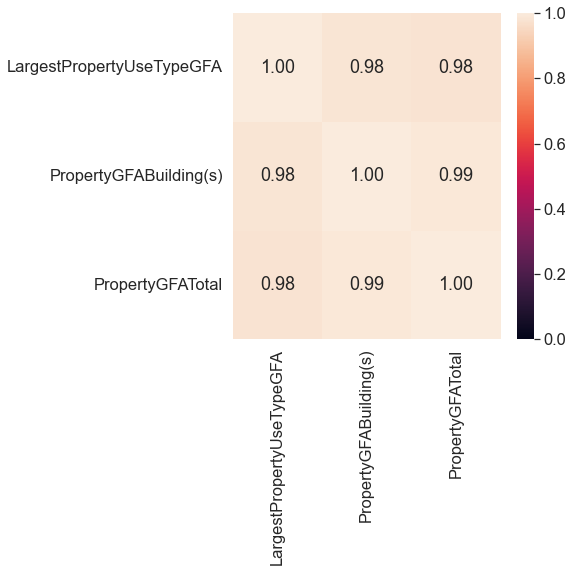

In [50]:
#On passe au GFA (surface hors oeuvre brut)
plt.figure(figsize=(6,6))
sns.heatmap(data_property[['LargestPropertyUseTypeGFA', 'PropertyGFABuilding(s)', 'PropertyGFATotal']].corr(), vmin=0, annot=True, fmt='.2f')
plt.show()

In [51]:
#Les variables GFA sont très fortement corrélées
#Comme elles sont égales dans les 2 premières colonnes pour les 4 lignes retenues, on va les utiliser pour imputer les valeurs manquantes dans LargestPropertyUseTypeGFA
data_property['LargestPropertyUseTypeGFA'].fillna(data_property['PropertyGFATotal'], inplace=True)
data_property.loc[[344, 815, 1343, 1361],:]

OSEBuildingID    BuildingType          PrimaryPropertyType  \
344             496  NonResidential        Self-Storage Facility   
815           21103  NonResidential                        Hotel   
1343          25568  NonResidential  Small- and Mid-Sized Office   
1361          25711  NonResidential                   Restaurant   

                          PropertyName                Address  ZipCode  \
344                   Market St Center  2811 NW Market Street 98107.00   
815                    Palladian Hotel     2000 Second Avenue 98121.00   
1343               Talon Northlake LLC   1341 N Northlake Way 98103.00   
1361  BUSH GARDEN - RESTURANT & LOUNGE    614 S MAYNARD AVE S 98104.00   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
344                     1175001235                    6      BALLARD   
815                     1977201140                    7     DOWNTOWN   
1343                    4088804565                    4   LAKE UNION   
1361                    5247802410                    2     DOWNTOWN   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
344      47.67    -122.39       1946               2.00               2   
815      47.61    -122.34       1910               1.00               8   
1343     47.65    -122.34       2008               1.00               4   
1361     47.60    -122.32       1913               1.00               3   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
344             111445                   0                  111445   
815              61721                   0                   61721   
1343             48350                   0                   48350   
1361             28800                   0                   28800   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
344      Self-Storage Facility  Self-Storage Facility   
815                      Hotel                  Hotel   
1343                    Office                 Office   
1361                Restaurant             Restaurant   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
344                   111445.00                          NaN   
815                    61721.00                          NaN   
1343                   48350.00                          NaN   
1361                   28800.00                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
344                               NaN                         NaN   
815                               NaN                         NaN   
1343                              NaN                         NaN   
1361                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
344                              NaN              NaN             47.80   
815                              NaN            93.00             52.20   
1343                             NaN            45.00             72.20   
1361                             NaN              NaN             31.20   

      SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
344               103.00           5697472.50            0.00   
815               150.40           2897079.75            0.00   
1343              226.60           3168131.00            0.00   
1361               62.00            899924.19            0.00   

      Electricity(kBtu)  NaturalGas(kBtu)  DefaultData ComplianceStatus  \
344          3007514.00        2689958.00        False        Compliant   
815          2534592.00         362488.00        False        Compliant   
1343         3168131.00              0.00        False        Compliant   
1361          402907.00         497017.00        False        Compliant   

      TotalGHGEmissions  GHGEmissionsIntensity  
344              163.83                   1.47  
815               36.92                   0.60  
1343              22.09     

In [52]:
#On cherche les propriétés à utilité multiple dont SecondLargestPropertyUseType n'est pas renseigné
data_property.loc[(data_property["ListOfAllPropertyUseTypes"].str.contains(",")) & (data_property["SecondLargestPropertyUseType"].isnull())]

OSEBuildingID        BuildingType PrimaryPropertyType  \
105             174  Nonresidential COS               Other   
1154          24085      NonResidential               Other   
1305          25124      NonResidential               Other   
1513          27825      NonResidential               Other   
1616          49958  Nonresidential COS               Other   

                                PropertyName             Address  ZipCode  \
105              CSC Vehicle Maintenance (E)    805 S Charles St 98134.00   
1154                    Performance Radiator  1101 AIRPORT WAY S 98134.00   
1305                          4H Investments   12001 31st AVE NE 98125.00   
1513   AKER'S VOLKS-PORSCHE REPAIR (ID27825)       1414 BROADWAY 98122.00   
1616  First Hill Street Car Maintenance Shop       848 7th Ave S 98124.00   

     TaxParcelIdentificationNumber  CouncilDistrictCode      Neighborhood  \
105                     6834700175                    2  GREATER DUWAMISH   
1154                    7666203380                    2  GREATER DUWAMISH   
1305                    8822900840                    5             NORTH   
1513                    6003000020                    3              EAST   
1616                    8592900285                    2  GREATER DUWAMISH   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
105      47.60    -122.32       1950               1.00               1   
1154     47.59    -122.32       1920               1.00               4   
1305     47.72    -122.30       1960               1.00               1   
1513     47.61    -122.32       1907               1.00               2   
1616     47.60    -122.32       2014               1.00               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
105              67356                   0                   67356   
1154             20600                   0                   20600   
1305             25406                   0                   25406   
1513             22320                   0                   22320   
1616             20993                   0                   20993   

                              ListOfAllPropertyUseTypes  \
105     Repair Services (Vehicle, Shoe, Locksmith, etc)   
1154    Repair Services (Vehicle, Shoe, Locksmith, etc)   
1305  Personal Services (Health/Beauty, Dry Cleaning...   
1513    Repair Services (Vehicle, Shoe, Locksmith, etc)   
1616    Repair Services (Vehicle, Shoe, Locksmith, etc)   

                                 LargestPropertyUseType  \
105     Repair Services (Vehicle, Shoe, Locksmith, etc)   
1154    Repair Services (Vehicle, Shoe, Locksmith, etc)   
1305  Personal Services (Health/Beauty, Dry Cleaning...   
1513    Repair Services (Vehicle, Shoe, Locksmith, etc)   
1616    Repair Services (Vehicle, Shoe, Locksmith, etc)   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
105                    68359.00                          NaN   
1154                   20600.00                          NaN   
1305                   25406.00                          NaN   
1513                   22320.00                          NaN   
1616                   20983.00                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
105                               NaN                         NaN   
1154                              NaN                         NaN   
1305                              NaN                         NaN   
1513                              NaN                         NaN   
1616                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
105                              NaN              NaN            109.40   
1154                             NaN              NaN             13.10   
1305                             NaN              NaN             96.10   
1513               

In [53]:
#Les lignes qui ressortent ici ne sont pas des propriétés à utilité multiple
#On part donc du principe que si SecondLargestPropertyUseType n'est pas renseigné, c'est qu'il n'y en a pas
#Par extension, j'applique le même raisonnement à ThirdLargestPropertyUseType
data_property['SecondLargestPropertyUseType'].fillna("NC", inplace=True)
data_property['SecondLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
data_property['ThirdLargestPropertyUseType'].fillna("NC", inplace=True)
data_property['ThirdLargestPropertyUseTypeGFA'].fillna(0, inplace=True)
data_property

OSEBuildingID        BuildingType          PrimaryPropertyType  \
0                 1      NonResidential                        Hotel   
1                 2      NonResidential                        Hotel   
2                 3      NonResidential                        Hotel   
3                 5      NonResidential                        Hotel   
4                 8      NonResidential                        Hotel   
...             ...                 ...                          ...   
1654          50222  Nonresidential COS  Small- and Mid-Sized Office   
1655          50223  Nonresidential COS                        Other   
1656          50224  Nonresidential COS                        Other   
1657          50225  Nonresidential COS           Mixed Use Property   
1658          50226  Nonresidential COS           Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way 98101.00   
1                         Paramount Hotel   724 Pine street 98101.00   
2                 5673-The Westin Seattle   1900 5th Avenue 98101.00   
3                               HOTEL MAX    620 STEWART ST 98101.00   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST 98121.00   
...                                   ...               ...      ...   
1654                Horticulture building  1600 S Dakota St 98108.00   
1655  International district/Chinatown CC     719 8th Ave S 98104.00   
1656                      Queen Anne Pool    1920 1st Ave W 98119.00   
1657          South Park Community Center    8319 8th Ave S 98108.00   
1658          Van Asselt Community Center  2820 S Myrtle St 98108.00   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                    7   
1                       0659000220                    7   
2                       0659000475                    7   
3                       0659000640                    7   
4                       0659000970                    7   
...                            ...                  ...   
1654                    1624049080                    2   
1655                    3558300000                    2   
1656                    1794501150                    7   
1657                    7883603155                    1   
1658                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN     47.61    -122.34       1927   
1                  DOWNTOWN     47.61    -122.33       1996   
2                  DOWNTOWN     47.61    -122.34       1969   
3                  DOWNTOWN     47.61    -122.34       1926   
4                  DOWNTOWN     47.61    -122.34       1980   
...                     ...       ...        ...        ...   
1654       GREATER DUWAMISH     47.57    -122.31       1990   
1655               DOWNTOWN     47.60    -122.32       2004   
1656  MAGNOLIA / QUEEN ANNE     47.64    -122.36       1974   
1657       GREATER DUWAMISH     47.53    -122.32       1989   
1658       GREATER DUWAMISH     47.54    -122.30       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1.00              12             88434                   0   
1                  1.00              11            103566               15064   
2                  1.00              41            956110              196718   
3                  1.00              10             61320                   0   
4                  1.00              18            175580               62000   
...                 ...             ...               ...                 ...   
1654               1.00               1             12294                   0   
1655               1.00               1             16000                   0   
1656               1.00               1             13157                   0   


In [54]:
#On peut désormais effectuer notre dernière vérification concernant le GFA
data_property.loc[data_property['LargestPropertyUseTypeGFA'] + data_property['SecondLargestPropertyUseTypeGFA'] + data_property['ThirdLargestPropertyUseTypeGFA'] > data_property['PropertyGFATotal']]

OSEBuildingID        BuildingType PrimaryPropertyType  \
4                 8      NonResidential               Hotel   
10               16      NonResidential               Hotel   
12               18      NonResidential               Hotel   
13               19      NonResidential               Hotel   
14               21  Nonresidential COS               Other   
...             ...                 ...                 ...   
1634          50045      NonResidential        Large Office   
1635          50054  Nonresidential COS        Large Office   
1636          50062      NonResidential               Hotel   
1640          50081      NonResidential         K-12 School   
1642          50101      NonResidential          University   

                                      PropertyName               Address  \
4                      WARWICK SEATTLE HOTEL (ID8)         401 LENORA ST   
10                                  5679-W Seattle    1112 Fourth Avenue   
12                      Crowne Plaza Hotel Seattle          1113 6th Ave   
13                           Hotel Vintage Seattle       1100 5th Avenue   
14    The Seattle Public Library - Central Library    1000 Fourth Avenue   
...                                            ...                   ...   
1634                                Sidneysea, LLC  400 9th Avenue North   
1635                      400 FAIRVIEW OFFICE BLDG    400 FAIRVIEW AVE N   
1636                           Olympic Hospitality     3926 Aurora Ave N   
1640                        Hamlin Robinson School   1701 20th Ave South   
1642                                  Burke Museum  4331 Memorial Way NE   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
4    98121.00                    0659000970                    7   
10   98101.00                    0942000165                    7   
12   98101.00                    0942000235                    7   
13   98101.00                    0942000265                    7   
14   98154.00                    0942000275                    7   
...       ...                           ...                  ...   
1634 98109.00                    1983200035                    7   
1635 98109.00                    2467400120                    7   
1636 98103.00                    1931300480                    4   
1640 98144.00                    7548300840                    3   
1642 98195.00                    1625049001                    4   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
4             DOWNTOWN     47.61    -122.34       1980               1.00   
10            DOWNTOWN     47.61    -122.33       1998               1.00   
12            DOWNTOWN     47.61    -122.33       1980               1.00   
13            DOWNTOWN     47.61    -122.33       1922               1.00   
14            DOWNTOWN     47.61    -122.33       2004               1.00   
...                ...       ...        ...        ...                ...   
1634        LAKE UNION     47.62    -122.34       2015               1.00   
1635        LAKE UNION     47.62    -122.33       2014               1.00   
1636        LAKE UNION     47.65    -122.35       2014               1.00   
1640  GREATER DUWAMISH     47.59    -122.31       2015               1.00   
1642         NORTHEAST     47.66    -122.31       1962               1.00   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
4                 18            175580               62000   
10                25            333176               61161   
12                33            315952               57600   
13                11             92190               25200   
14                11            412000               57000   
...              ...               ...                 ...   
1634              12            483397              166208   
1635              13            536697              197659   
1636               4            1268

In [55]:
#On constate pas mal de différences, il semble y avoir incohérence entre la variable total des surfaces et celles qui la composent sur un nombre conséquent de résidences
#Je fais le choix de me fier au PropertyGFATotal et de ne pas utiliser les 3 autres variables
#En effet, certains Second et Third LargestPropertyUseTypeGFA valent 0 alors que Second et Third LargestPropertyUseType ne sont pas vides
data_drop_gfa = data_property.drop(columns=["LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA"])
data_drop_gfa

OSEBuildingID        BuildingType          PrimaryPropertyType  \
0                 1      NonResidential                        Hotel   
1                 2      NonResidential                        Hotel   
2                 3      NonResidential                        Hotel   
3                 5      NonResidential                        Hotel   
4                 8      NonResidential                        Hotel   
...             ...                 ...                          ...   
1654          50222  Nonresidential COS  Small- and Mid-Sized Office   
1655          50223  Nonresidential COS                        Other   
1656          50224  Nonresidential COS                        Other   
1657          50225  Nonresidential COS           Mixed Use Property   
1658          50226  Nonresidential COS           Mixed Use Property   

                             PropertyName           Address  ZipCode  \
0                    Mayflower park hotel     405 Olive way 98101.00   
1                         Paramount Hotel   724 Pine street 98101.00   
2                 5673-The Westin Seattle   1900 5th Avenue 98101.00   
3                               HOTEL MAX    620 STEWART ST 98101.00   
4             WARWICK SEATTLE HOTEL (ID8)     401 LENORA ST 98121.00   
...                                   ...               ...      ...   
1654                Horticulture building  1600 S Dakota St 98108.00   
1655  International district/Chinatown CC     719 8th Ave S 98104.00   
1656                      Queen Anne Pool    1920 1st Ave W 98119.00   
1657          South Park Community Center    8319 8th Ave S 98108.00   
1658          Van Asselt Community Center  2820 S Myrtle St 98108.00   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
0                       0659000030                    7   
1                       0659000220                    7   
2                       0659000475                    7   
3                       0659000640                    7   
4                       0659000970                    7   
...                            ...                  ...   
1654                    1624049080                    2   
1655                    3558300000                    2   
1656                    1794501150                    7   
1657                    7883603155                    1   
1658                    7857002030                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN     47.61    -122.34       1927   
1                  DOWNTOWN     47.61    -122.33       1996   
2                  DOWNTOWN     47.61    -122.34       1969   
3                  DOWNTOWN     47.61    -122.34       1926   
4                  DOWNTOWN     47.61    -122.34       1980   
...                     ...       ...        ...        ...   
1654       GREATER DUWAMISH     47.57    -122.31       1990   
1655               DOWNTOWN     47.60    -122.32       2004   
1656  MAGNOLIA / QUEEN ANNE     47.64    -122.36       1974   
1657       GREATER DUWAMISH     47.53    -122.32       1989   
1658       GREATER DUWAMISH     47.54    -122.30       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1.00              12             88434                   0   
1                  1.00              11            103566               15064   
2                  1.00              41            956110              196718   
3                  1.00              10             61320                   0   
4                  1.00              18            175580               62000   
...                 ...             ...               ...                 ...   
1654               1.00               1             12294                   0   
1655               1.00               1             16000                   0   
1656               1.00               1             13157                   0   


In [56]:
#Ne restent plus que les NaN d'ENERGYSTARScore, on me demande d'évaluer son intérêt dans la prédiction d'émissions donc on testera en temps voulu par rapport aux lignes renseignées
#Avant ça on va faire un peu d'harmonisation, on s'est déjà penché sur BuildingType et PrimaryPropertyType alors on enchaîne avec Neighborhood
data_drop_gfa['Neighborhood'].value_counts()

DOWNTOWN                  359
GREATER DUWAMISH          346
MAGNOLIA / QUEEN ANNE     151
LAKE UNION                147
NORTHEAST                 127
EAST                      121
NORTHWEST                  80
BALLARD                    64
NORTH                      56
CENTRAL                    50
SOUTHEAST                  46
DELRIDGE                   42
SOUTHWEST                  41
North                       9
Ballard                     6
Northwest                   5
Delridge                    4
Central                     4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [57]:
#On passe tout en uppercase
data_drop_gfa['Neighborhood'] = data_drop_gfa['Neighborhood'].str.upper()
data_drop_gfa['Neighborhood'] = data_drop_gfa['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE')
data_drop_gfa['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE'],
      dtype=object)

In [58]:
#On va s'intéresser à ZipCode aussi, comme c'est une variable catégorielle
data_drop_gfa['ZipCode'].value_counts()

98134.00    182
98104.00    159
98101.00    148
98109.00    140
98108.00    123
98122.00     93
98105.00     85
98121.00     83
98103.00     67
98119.00     65
98125.00     53
98133.00     50
98107.00     50
98115.00     50
98144.00     49
98118.00     47
98102.00     27
98106.00     26
98116.00     24
98126.00     23
98199.00     22
98117.00     22
98112.00     20
98195.00      9
98136.00      6
98155.00      4
98146.00      3
98178.00      3
98013.00      2
98124.00      2
98177.00      2
98168.00      2
98111.00      2
98154.00      2
98181.00      1
98185.00      1
98164.00      1
98006.00      1
98191.00      1
98053.00      1
98033.00      1
98070.00      1
98114.00      1
98165.00      1
98011.00      1
98113.00      1
98020.00      1
98145.00      1
Name: ZipCode, dtype: int64

In [59]:
#Certains d'entre eux ne sont que très peu représentés, on va remplacer ceux dont value_counts() < 10 par Other
#Petite manipulation avant, pour ne pas avoir des ZipCode à virgule
data_drop_gfa['ZipCode'] = data_drop_gfa['ZipCode'].astype(int)
data_drop_gfa['ZipCode'] = data_drop_gfa['ZipCode'].astype(str) #Ca pose problème plus tard sans cette ligne
data_drop_gfa['ZipCode'] = data_drop_gfa['ZipCode'].apply(lambda x: 'Other' if data_drop_gfa['ZipCode'].value_counts()[x] < 10 else x)
data_drop_gfa['ZipCode'].nunique()

24

In [60]:
#Colonnes suivantes
lput = pd.concat([data_drop_gfa['LargestPropertyUseType'].value_counts(), data_drop_gfa['SecondLargestPropertyUseType'].value_counts(), data_drop_gfa['ThirdLargestPropertyUseType'].value_counts()], axis=1)
lput.columns = ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
lput.T

Office  Non-Refrigerated Warehouse  K-12 School  \
LargestPropertyUseType        497.00                      199.00       136.00   
SecondLargestPropertyUseType  167.00                       30.00         5.00   
ThirdLargestPropertyUseType    49.00                       15.00         2.00   

                              Retail Store  Other  Hotel  Worship Facility  \
LargestPropertyUseType               99.00  98.00  77.00             71.00   
SecondLargestPropertyUseType         85.00  45.00   3.00              3.00   
ThirdLargestPropertyUseType          48.00  39.00   1.00              1.00   

                              Distribution Center  Supermarket/Grocery Store  \
LargestPropertyUseType                      54.00                      41.00   
SecondLargestPropertyUseType                 7.00                      10.00   
ThirdLargestPropertyUseType                  3.00                       1.00   

                              Medical Office  Other - Recreation  Parking  \
LargestPropertyUseType                 41.00               31.00    30.00   
SecondLargestPropertyUseType            8.00                4.00   335.00   
ThirdLargestPropertyUseType             9.00                2.00    46.00   

                              Self-Storage Facility  College/University  \
LargestPropertyUseType                        28.00               24.00   
SecondLargestPropertyUseType                   3.00                1.00   
ThirdLargestPropertyUseType                    2.00                 NaN   

                              Residence Hall/Dormitory  \
LargestPropertyUseType                           22.00   
SecondLargestPropertyUseType                      1.00   
ThirdLargestPropertyUseType                        NaN   

                              Other - Entertainment/Public Assembly  \
LargestPropertyUseType                                        21.00   
SecondLargestPropertyUseType                                   7.00   
ThirdLargestPropertyUseType                                    4.00   

                              Senior Care Community  Laboratory  Restaurant  \
LargestPropertyUseType                        20.00       13.00       13.00   
SecondLargestPropertyUseType                    NaN        8.00       29.00   
ThirdLargestPropertyUseType                     NaN        2.00       32.00   

                              Refrigerated Warehouse  Multifamily Housing  \
LargestPropertyUseType                         12.00                11.00   
SecondLargestPropertyUseType                    2.00                12.00   
ThirdLargestPropertyUseType                     2.00                12.00   

                              Hospital (General Medical & Surgical)  \
LargestPropertyUseType                                        10.00   
SecondLargestPropertyUseType                                   1.00   
ThirdLargestPropertyUseType                                     NaN   

                              Social/Meeting Hall  \
LargestPropertyUseType                      10.00   
SecondLargestPropertyUseType                 1.00   
ThirdLargestPropertyUseType                  8.00   

                              Manufacturing/Industrial Plant  \
LargestPropertyUseType                                  8.00   
SecondLargestPropertyUseType                            2.00   
ThirdLargestPropertyUseType                             1.00   

                              Repair Services (Vehicle, Shoe, Locksmith, etc)  \
LargestPropertyUseType                                                   6.00   
SecondLargestPropertyUseType                                             4.00   
ThirdLargestPropertyUseType                                               NaN   

                              Strip Mall  Automobile Dealership  \
LargestPropertyUseType              6.00                   5.00   
SecondLargestPropertyUseType         NaN                   2.00   
ThirdLargestPropertyUseType         

In [61]:
#On a une catégorie Multifamily alors qu'on ne s'intéresse pas à l'habitation
data_drop_gfa.loc[(data_drop_gfa['LargestPropertyUseType'].str.contains('Multifamily')) | (data_drop_gfa['SecondLargestPropertyUseType'].str.contains('Multifamily')) | (data_drop_gfa['ThirdLargestPropertyUseType'].str.contains('Multifamily'))]

OSEBuildingID    BuildingType          PrimaryPropertyType  \
161             264  NonResidential           Mixed Use Property   
281             419          Campus           Mixed Use Property   
431             601  NonResidential           Mixed Use Property   
457             627  NonResidential  Small- and Mid-Sized Office   
478             657  NonResidential           Mixed Use Property   
498             694  NonResidential                 Large Office   
528             731  NonResidential           Mixed Use Property   
598             817  NonResidential           Mixed Use Property   
716           20212  NonResidential           Mixed Use Property   
719           20241  NonResidential                        Other   
821           21122  NonResidential           Mixed Use Property   
827           21141  NonResidential  Small- and Mid-Sized Office   
906           21481          Campus  Supermarket / Grocery Store   
913           21506  NonResidential           Mixed Use Property   
919           21533  NonResidential           Mixed Use Property   
1021          22684  NonResidential           Mixed Use Property   
1076          23368  NonResidential           Mixed Use Property   
1089          23562  NonResidential           Mixed Use Property   
1310          25222  NonResidential           Mixed Use Property   
1331          25522  NonResidential           Mixed Use Property   
1332          25528  NonResidential                 Large Office   
1337          25546  NonResidential           Mixed Use Property   
1358          25674  NonResidential                   Restaurant   
1371          25886  NonResidential  Small- and Mid-Sized Office   
1380          25992  NonResidential           Mixed Use Property   
1446          26834  NonResidential           Mixed Use Property   
1448          26847  NonResidential  Small- and Mid-Sized Office   
1463          26973  NonResidential           Mixed Use Property   
1517          27838  NonResidential           Mixed Use Property   
1529          27969  NonResidential           Mixed Use Property   
1542          29170  NonResidential           Mixed Use Property   
1569          40348  NonResidential           Mixed Use Property   
1579          49697  NonResidential           Mixed Use Property   
1593          49776  NonResidential                 Large Office   
1628          50026  NonResidential  Small- and Mid-Sized Office   

                                   PropertyName  \
161                                     TriBeCa   
281                                 Main Market   
431                          Wallingford Center   
457                           Roebling Building   
478                        2200 Westlake - SEDO   
498                             Rainier Brewery   
528                     SALVATION ARMY (ID#731)   
598                                Russell Hall   
716                      Market Street Holdings   
719                        neptune theatre bldg   
821              Fremont Court-Equinox Building   
827                             FREMONT FOUNDRY   
906                             Sanitary Market   
913                           Scargo Apartments   
919                                 Hyatt Place   
1021                    Murphy Ballard Building   
1076                          Seaboard Building   
1089                        The Travelers Hotel   
1310                                    Olive 8   
1331                                  YouthCare   
1332                           Waterfront Place   
1337  Compass Housing Alliance - Pioneer Square   
1358                     (ID25674) COMET TAVERN   
1371                   H2125 - Western Triangle   
1380            2201 / Enso Condominiums - SEDO   
1446    (ID26834) SOO YUEN ASSOCIATION BUILDING   
1448                         KOBE PARK BUILDING   
1463                                New Central   
1517                           Madison Crossing   
1529                 1700 M

In [62]:
#Il s'agit de bâtiments multi-usages, on va tout garder finalement
#On va remplacer les valeurs contenant 'Hospital' par 'Hospital', et pareil avec 'Other' (dans cet ordre sinon Other/Specialty Hospital finit en Other)
data_drop_gfa['LargestPropertyUseType'] = data_drop_gfa['LargestPropertyUseType'].apply(lambda x: 'Hospital' if 'Hospital' in x else ('Other' if 'Other' in x else x))
data_drop_gfa['SecondLargestPropertyUseType'] = data_drop_gfa['SecondLargestPropertyUseType'].apply(lambda x: 'Hospital' if 'Hospital' in x else ('Other' if 'Other' in x else x))
data_drop_gfa['ThirdLargestPropertyUseType'] = data_drop_gfa['ThirdLargestPropertyUseType'].apply(lambda x: 'Hospital' if 'Hospital' in x else ('Other' if 'Other' in x else x))
data_drop_gfa['LargestPropertyUseType'].value_counts()

Office                                                  497
Non-Refrigerated Warehouse                              199
Other                                                   177
K-12 School                                             136
Retail Store                                             99
Hotel                                                    77
Worship Facility                                         71
Distribution Center                                      54
Supermarket/Grocery Store                                41
Medical Office                                           41
Parking                                                  30
Self-Storage Facility                                    28
College/University                                       24
Residence Hall/Dormitory                                 22
Senior Care Community                                    20
Hospital                                                 14
Restaurant                              

In [63]:
#Puis on remplace les valeurs dont value_counts() < 10 dans chacune des ces colonnes par Other
data_lput = data_drop_gfa.copy()

#On remplace
for col in ['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']:
    value_counts = data_lput[col].value_counts()
    a_remplacer = value_counts[value_counts < 10].index
    data_lput[col] = data_lput[col].replace(a_remplacer, 'Other')

print(data_lput['LargestPropertyUseType'].nunique())
print(data_lput['SecondLargestPropertyUseType'].nunique())
print(data_lput['ThirdLargestPropertyUseType'].nunique())

21
11
10


In [64]:
#On a énormément réduit le nombre de valeurs uniques dans ces colonnes
#Dernière vérification
data_lput[data_lput.select_dtypes(include=['object']).columns].nunique()

BuildingType                        4
PrimaryPropertyType                20
PropertyName                     1655
Address                          1638
ZipCode                            24
TaxParcelIdentificationNumber    1578
Neighborhood                       13
ListOfAllPropertyUseTypes         369
LargestPropertyUseType             21
SecondLargestPropertyUseType       11
ThirdLargestPropertyUseType        10
ComplianceStatus                    4
dtype: int64

In [65]:
#Certaines de ces variables ont trop de valeurs distinctes pour être utiles dans la prédiction (on garde PropertyName pour l'identification)
data_final = data_lput.copy()
data_final.drop(columns=['Address', 'TaxParcelIdentificationNumber', 'ListOfAllPropertyUseTypes'], inplace=True)
data_final

OSEBuildingID        BuildingType          PrimaryPropertyType  \
0                 1      NonResidential                        Hotel   
1                 2      NonResidential                        Hotel   
2                 3      NonResidential                        Hotel   
3                 5      NonResidential                        Hotel   
4                 8      NonResidential                        Hotel   
...             ...                 ...                          ...   
1654          50222  Nonresidential COS  Small- and Mid-Sized Office   
1655          50223  Nonresidential COS                        Other   
1656          50224  Nonresidential COS                        Other   
1657          50225  Nonresidential COS           Mixed Use Property   
1658          50226  Nonresidential COS           Mixed Use Property   

                             PropertyName ZipCode  CouncilDistrictCode  \
0                    Mayflower park hotel   98101                    7   
1                         Paramount Hotel   98101                    7   
2                 5673-The Westin Seattle   98101                    7   
3                               HOTEL MAX   98101                    7   
4             WARWICK SEATTLE HOTEL (ID8)   98121                    7   
...                                   ...     ...                  ...   
1654                Horticulture building   98108                    2   
1655  International district/Chinatown CC   98104                    2   
1656                      Queen Anne Pool   98119                    7   
1657          South Park Community Center   98108                    1   
1658          Van Asselt Community Center   98108                    2   

               Neighborhood  Latitude  Longitude  YearBuilt  \
0                  DOWNTOWN     47.61    -122.34       1927   
1                  DOWNTOWN     47.61    -122.33       1996   
2                  DOWNTOWN     47.61    -122.34       1969   
3                  DOWNTOWN     47.61    -122.34       1926   
4                  DOWNTOWN     47.61    -122.34       1980   
...                     ...       ...        ...        ...   
1654       GREATER DUWAMISH     47.57    -122.31       1990   
1655               DOWNTOWN     47.60    -122.32       2004   
1656  MAGNOLIA / QUEEN ANNE     47.64    -122.36       1974   
1657       GREATER DUWAMISH     47.53    -122.32       1989   
1658       GREATER DUWAMISH     47.54    -122.30       1938   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1.00              12             88434                   0   
1                  1.00              11            103566               15064   
2                  1.00              41            956110              196718   
3                  1.00              10             61320                   0   
4                  1.00              18            175580               62000   
...                 ...             ...               ...                 ...   
1654               1.00               1             12294                   0   
1655               1.00               1             16000                   0   
1656               1.00               1             13157                   0   
1657               1.00               1             14101                   0   
1658               1.00               1             18258                   0   

      PropertyGFABuilding(s) LargestPropertyUseType  \
0                      88434                  Hotel   
1                      88502                  Hotel   
2                     759392                  Hotel   
3                      61320                  Hotel   
4                     113580                  Hotel   
...                      ...                    ...   
1654                   12294                 Office   
1655                   16000                  Other   
1656                   1315

In [66]:
#Par préférence personnelle, je vais remplacer YearBuilt par Age, même info juste exprimée différemment (rappel : les données datent de 2016)
data_final['YearBuilt'] = 2016 - data_final['YearBuilt']
data_final.rename(columns={'YearBuilt':'Age'}, inplace=True)
data_final

OSEBuildingID        BuildingType          PrimaryPropertyType  \
0                 1      NonResidential                        Hotel   
1                 2      NonResidential                        Hotel   
2                 3      NonResidential                        Hotel   
3                 5      NonResidential                        Hotel   
4                 8      NonResidential                        Hotel   
...             ...                 ...                          ...   
1654          50222  Nonresidential COS  Small- and Mid-Sized Office   
1655          50223  Nonresidential COS                        Other   
1656          50224  Nonresidential COS                        Other   
1657          50225  Nonresidential COS           Mixed Use Property   
1658          50226  Nonresidential COS           Mixed Use Property   

                             PropertyName ZipCode  CouncilDistrictCode  \
0                    Mayflower park hotel   98101                    7   
1                         Paramount Hotel   98101                    7   
2                 5673-The Westin Seattle   98101                    7   
3                               HOTEL MAX   98101                    7   
4             WARWICK SEATTLE HOTEL (ID8)   98121                    7   
...                                   ...     ...                  ...   
1654                Horticulture building   98108                    2   
1655  International district/Chinatown CC   98104                    2   
1656                      Queen Anne Pool   98119                    7   
1657          South Park Community Center   98108                    1   
1658          Van Asselt Community Center   98108                    2   

               Neighborhood  Latitude  Longitude  Age  NumberofBuildings  \
0                  DOWNTOWN     47.61    -122.34   89               1.00   
1                  DOWNTOWN     47.61    -122.33   20               1.00   
2                  DOWNTOWN     47.61    -122.34   47               1.00   
3                  DOWNTOWN     47.61    -122.34   90               1.00   
4                  DOWNTOWN     47.61    -122.34   36               1.00   
...                     ...       ...        ...  ...                ...   
1654       GREATER DUWAMISH     47.57    -122.31   26               1.00   
1655               DOWNTOWN     47.60    -122.32   12               1.00   
1656  MAGNOLIA / QUEEN ANNE     47.64    -122.36   42               1.00   
1657       GREATER DUWAMISH     47.53    -122.32   27               1.00   
1658       GREATER DUWAMISH     47.54    -122.30   78               1.00   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                 12             88434                   0   
1                 11            103566               15064   
2                 41            956110              196718   
3                 10             61320                   0   
4                 18            175580               62000   
...              ...               ...                 ...   
1654               1             12294                   0   
1655               1             16000                   0   
1656               1             13157                   0   
1657               1             14101                   0   
1658               1             18258                   0   

      PropertyGFABuilding(s) LargestPropertyUseType  \
0                      88434                  Hotel   
1                      88502                  Hotel   
2                     759392                  Hotel   
3                      61320                  Hotel   
4                     113580                  Hotel   
...                      ...                    ...   
1654                   12294                 Office   
1655                   16000                  Other   
1656                   13157                  Other   
1657                   14101                

In [67]:
#Enfin, on convertit les colonnes éligibles en int et on passe à l'analyse exploratoire
data_final['NumberofBuildings'] = data_final['NumberofBuildings'].astype(int)
data_final['ENERGYSTARScore'] = data_final['ENERGYSTARScore'].astype('Int64') #Format différent à cause des NaNs
data_final

OSEBuildingID        BuildingType          PrimaryPropertyType  \
0                 1      NonResidential                        Hotel   
1                 2      NonResidential                        Hotel   
2                 3      NonResidential                        Hotel   
3                 5      NonResidential                        Hotel   
4                 8      NonResidential                        Hotel   
...             ...                 ...                          ...   
1654          50222  Nonresidential COS  Small- and Mid-Sized Office   
1655          50223  Nonresidential COS                        Other   
1656          50224  Nonresidential COS                        Other   
1657          50225  Nonresidential COS           Mixed Use Property   
1658          50226  Nonresidential COS           Mixed Use Property   

                             PropertyName ZipCode  CouncilDistrictCode  \
0                    Mayflower park hotel   98101                    7   
1                         Paramount Hotel   98101                    7   
2                 5673-The Westin Seattle   98101                    7   
3                               HOTEL MAX   98101                    7   
4             WARWICK SEATTLE HOTEL (ID8)   98121                    7   
...                                   ...     ...                  ...   
1654                Horticulture building   98108                    2   
1655  International district/Chinatown CC   98104                    2   
1656                      Queen Anne Pool   98119                    7   
1657          South Park Community Center   98108                    1   
1658          Van Asselt Community Center   98108                    2   

               Neighborhood  Latitude  Longitude  Age  NumberofBuildings  \
0                  DOWNTOWN     47.61    -122.34   89                  1   
1                  DOWNTOWN     47.61    -122.33   20                  1   
2                  DOWNTOWN     47.61    -122.34   47                  1   
3                  DOWNTOWN     47.61    -122.34   90                  1   
4                  DOWNTOWN     47.61    -122.34   36                  1   
...                     ...       ...        ...  ...                ...   
1654       GREATER DUWAMISH     47.57    -122.31   26                  1   
1655               DOWNTOWN     47.60    -122.32   12                  1   
1656  MAGNOLIA / QUEEN ANNE     47.64    -122.36   42                  1   
1657       GREATER DUWAMISH     47.53    -122.32   27                  1   
1658       GREATER DUWAMISH     47.54    -122.30   78                  1   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                 12             88434                   0   
1                 11            103566               15064   
2                 41            956110              196718   
3                 10             61320                   0   
4                 18            175580               62000   
...              ...               ...                 ...   
1654               1             12294                   0   
1655               1             16000                   0   
1656               1             13157                   0   
1657               1             14101                   0   
1658               1             18258                   0   

      PropertyGFABuilding(s) LargestPropertyUseType  \
0                      88434                  Hotel   
1                      88502                  Hotel   
2                     759392                  Hotel   
3                      61320                  Hotel   
4                     113580                  Hotel   
...                      ...                    ...   
1654                   12294                 Office   
1655                   16000                  Other   
1656                   13157                  Other   
1657                   14101                

In [68]:
#Pour finir, deux colonnes en particulier m'intriguent : DefaultData et ComplianceStatus
#D'après la documentation sur le site officiel, DefaultData indique simplement si des valeurs par défaut ont été utilisées, je vais tout conserver
#ComplianceStatus est une obligation de benchmarking en lien avec ENERGYSTARScore, nous ne conserverons donc que les résidences conformes
data_final = data_final[data_final['ComplianceStatus'] == 'Compliant'].reset_index(drop=True)
data_final.drop(columns=['ComplianceStatus'], inplace=True)
data_final

OSEBuildingID        BuildingType PrimaryPropertyType  \
0                 1      NonResidential               Hotel   
1                 2      NonResidential               Hotel   
2                 3      NonResidential               Hotel   
3                 5      NonResidential               Hotel   
4                 8      NonResidential               Hotel   
...             ...                 ...                 ...   
1541          50221  Nonresidential COS               Other   
1542          50223  Nonresidential COS               Other   
1543          50224  Nonresidential COS               Other   
1544          50225  Nonresidential COS  Mixed Use Property   
1545          50226  Nonresidential COS  Mixed Use Property   

                             PropertyName ZipCode  CouncilDistrictCode  \
0                    Mayflower park hotel   98101                    7   
1                         Paramount Hotel   98101                    7   
2                 5673-The Westin Seattle   98101                    7   
3                               HOTEL MAX   98101                    7   
4             WARWICK SEATTLE HOTEL (ID8)   98121                    7   
...                                   ...     ...                  ...   
1541          High Point Community Center   98126                    1   
1542  International district/Chinatown CC   98104                    2   
1543                      Queen Anne Pool   98119                    7   
1544          South Park Community Center   98108                    1   
1545          Van Asselt Community Center   98108                    2   

               Neighborhood  Latitude  Longitude  Age  NumberofBuildings  \
0                  DOWNTOWN     47.61    -122.34   89                  1   
1                  DOWNTOWN     47.61    -122.33   20                  1   
2                  DOWNTOWN     47.61    -122.34   47                  1   
3                  DOWNTOWN     47.61    -122.34   90                  1   
4                  DOWNTOWN     47.61    -122.34   36                  1   
...                     ...       ...        ...  ...                ...   
1541               DELRIDGE     47.54    -122.37   34                  1   
1542               DOWNTOWN     47.60    -122.32   12                  1   
1543  MAGNOLIA / QUEEN ANNE     47.64    -122.36   42                  1   
1544       GREATER DUWAMISH     47.53    -122.32   27                  1   
1545       GREATER DUWAMISH     47.54    -122.30   78                  1   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                 12             88434                   0   
1                 11            103566               15064   
2                 41            956110              196718   
3                 10             61320                   0   
4                 18            175580               62000   
...              ...               ...                 ...   
1541               1             18261                   0   
1542               1             16000                   0   
1543               1             13157                   0   
1544               1             14101                   0   
1545               1             18258                   0   

      PropertyGFABuilding(s) LargestPropertyUseType  \
0                      88434                  Hotel   
1                      88502                  Hotel   
2                     759392                  Hotel   
3                      61320                  Hotel   
4                     113580                  Hotel   
...                      ...                    ...   
1541                   18261                  Other   
1542                   16000                  Other   
1543                   13157                  Other   
1544                   14101                  Other   
1545                   18258                  Other   

        SecondLargestPropertyUseType Thir

In [69]:
#Juste par curiosité
data_final['DefaultData'].unique()

array([False])

In [70]:
#En ne conservant que les résidences conformes, le ménage a également été fait dans DefaultData finalement
data_final.drop(columns=['DefaultData'], inplace=True)

# III) Analyses <a class="anchor" id="iii"></a>
## 1) Univariées <a class="anchor" id="iii1"></a>
### i) Qualitatives <a class="anchor" id="iii1i"></a>

In [71]:
#On enregistre les variables qualitatives
var_quali = data_final.select_dtypes(include=['object']).columns
var_quali

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'ZipCode',
       'Neighborhood', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType'],
      dtype='object')

In [72]:
#Moins PropertyName, plus CouncilDistrictCode
var_quali = var_quali.delete(2).append(pd.Index(['CouncilDistrictCode']))
var_quali

Index(['BuildingType', 'PrimaryPropertyType', 'ZipCode', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'CouncilDistrictCode'],
      dtype='object')

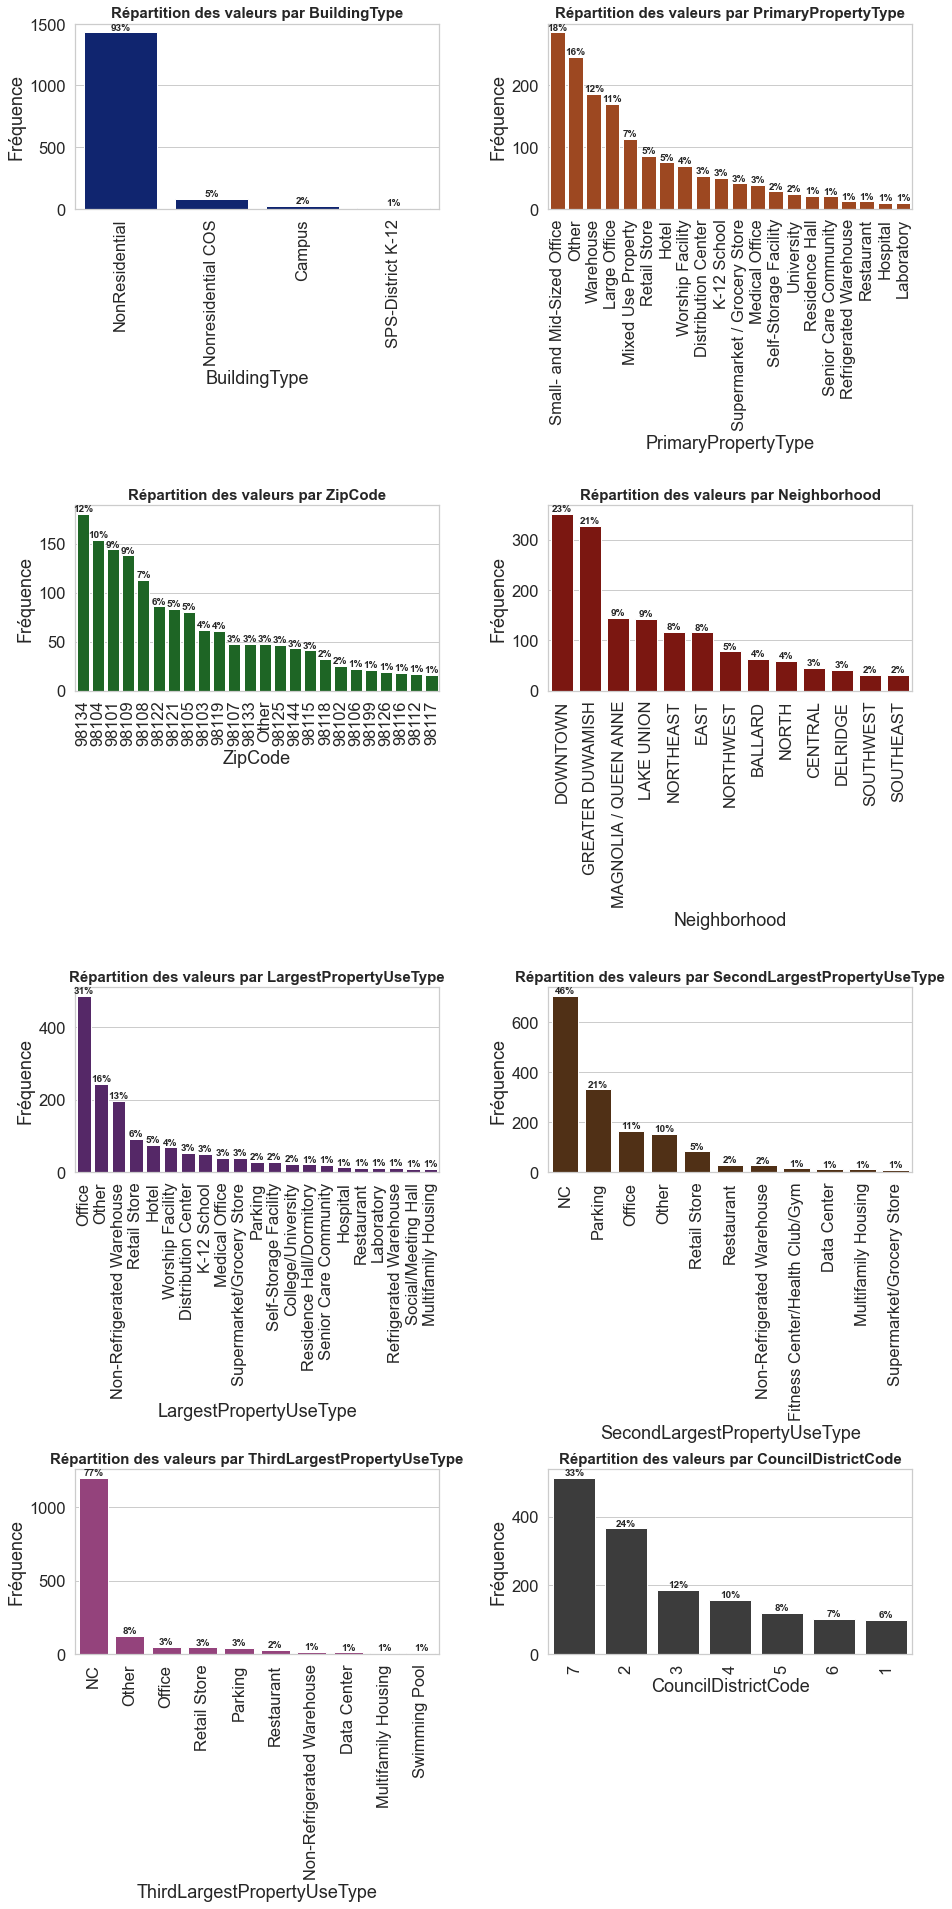

In [73]:
#On créé les sous-tracés de la figure
fig, axes = plt.subplots(4, 2, figsize=(15, 30))
axes = axes.flatten() #Pour faciliter l'indexation
plt.subplots_adjust(hspace=1.6, wspace=0.3) #Espace horizontal et vertical entre les graphs
couleurs = sns.color_palette("dark", len(var_quali)) #Pour avoir une couleur différente par graph

#Boucle pour créer un graph par variable
for i, (var, couleur) in enumerate(zip(var_quali, couleurs)):
    #Indices des sous-tracés par variable
    row = i // 2
    col = i % 2
    
    #Countplot par variable
    sns.countplot(x=var, data=data_final, order=data_final[var].value_counts().index, ax=axes[i], color=couleur)
    
    #Titre et axes
    axes[i].set_title(f'Répartition des valeurs par {var}', weight='bold', size=15)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Fréquence')
    axes[i].tick_params(axis='x', rotation=90)  #Rotation des étiquettes pour une meilleure lisibilité
    
    #Pour afficher les pourcentages au-dessus des barres
    for p in axes[i].patches:
        percentage = round((p.get_height() / len(data_final)) * 100)
        axes[i].annotate(f'{percentage}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 5), textcoords='offset points', weight='bold', size=10)

plt.show()

Globalement : Beaucoup de bureaux, environ la moitié des résidences n'ont pas d'utilité secondaire, très peu ont une utilité tertiaire, et 2 quartiers (Downtown et Greater Duwamish) sont beaucoup plus représentés que le reste. Un lien avec les districts 2 et 7 eux aussi majoritairement représentés ?
### ii) Quantitatives <a class="anchor" id="iii1ii"></a>

In [74]:
#On enregistre les variables quantitatives cette fois
var_quanti = list(data_final.select_dtypes(include=['int', 'float']).columns)
var_quanti = var_quanti[2:] #Pour retirer OSEBuildingID et CouncilDistrictCode
var_quanti

['Latitude',
 'Longitude',
 'Age',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [75]:
#Données chiffrées
data_final[var_quanti].describe().T

count       mean         std      min        25%  \
Latitude               1546.00      47.62        0.05    47.51      47.59   
Longitude              1546.00    -122.33        0.02  -122.41    -122.34   
Age                    1546.00      54.41       32.87     1.00      27.25   
NumberofBuildings      1546.00       1.21        3.03     1.00       1.00   
NumberofFloors         1546.00       4.22        6.34     1.00       1.00   
PropertyGFATotal       1546.00  121395.22   306486.70 11285.00   28841.75   
PropertyGFAParking     1546.00   13836.90    43745.03     0.00       0.00   
PropertyGFABuilding(s) 1546.00  107558.32   292810.35  3636.00   27934.25   
ENERGYSTARScore         995.00      63.63       28.81     1.00      44.00   
SiteEUI(kBtu/sf)       1546.00      75.16       75.23     1.40      34.93   
SourceEUI(kBtu/sf)     1546.00     183.41      188.01     0.00      81.45   
SiteEnergyUse(kBtu)    1546.00 8870006.86 31324694.44 57133.20 1252679.28   
SteamUse(kBtu)         1546.00  551896.10  5722168.09     0.00       0.00   
Electricity(kBtu)      1546.00 6147731.04 21523752.14     0.00  731660.00   
NaturalGas(kBtu)       1546.00 2040770.14  9716705.04     0.00       0.00   
TotalGHGEmissions      1546.00     193.84      779.58     0.00      20.69   
GHGEmissionsIntensity  1546.00       1.67        2.41     0.00       0.36   

                              50%        75%          max  
Latitude                    47.61      47.65        47.73  
Longitude                 -122.33    -122.32      -122.26  
Age                         51.00      86.00       116.00  
NumberofBuildings            1.00       1.00       111.00  
NumberofFloors               2.00       4.00        76.00  
PropertyGFATotal         48125.50  107840.50   9320156.00  
PropertyGFAParking           0.00       0.00    512608.00  
PropertyGFABuilding(s)   46063.50   95852.75   9320156.00  
ENERGYSTARScore             71.00      88.00       100.00  
SiteEUI(kBtu/sf)            53.85      85.20       834.40  
SourceEUI(kBtu/sf)         138.70     213.85      2620.00  
SiteEnergyUse(kBtu)    2735488.75 7301811.62 873923712.00  
SteamUse(kBtu)               0.00       0.00 134943456.00  
Electricity(kBtu)      1748791.50 5265867.75 657074389.00  
NaturalGas(kBtu)        490658.00 1531060.75 297909000.00  
TotalGHGEmissions           49.94     147.40     16870.98  
GHGEmissionsIntensity        0.89       1.96        34.09

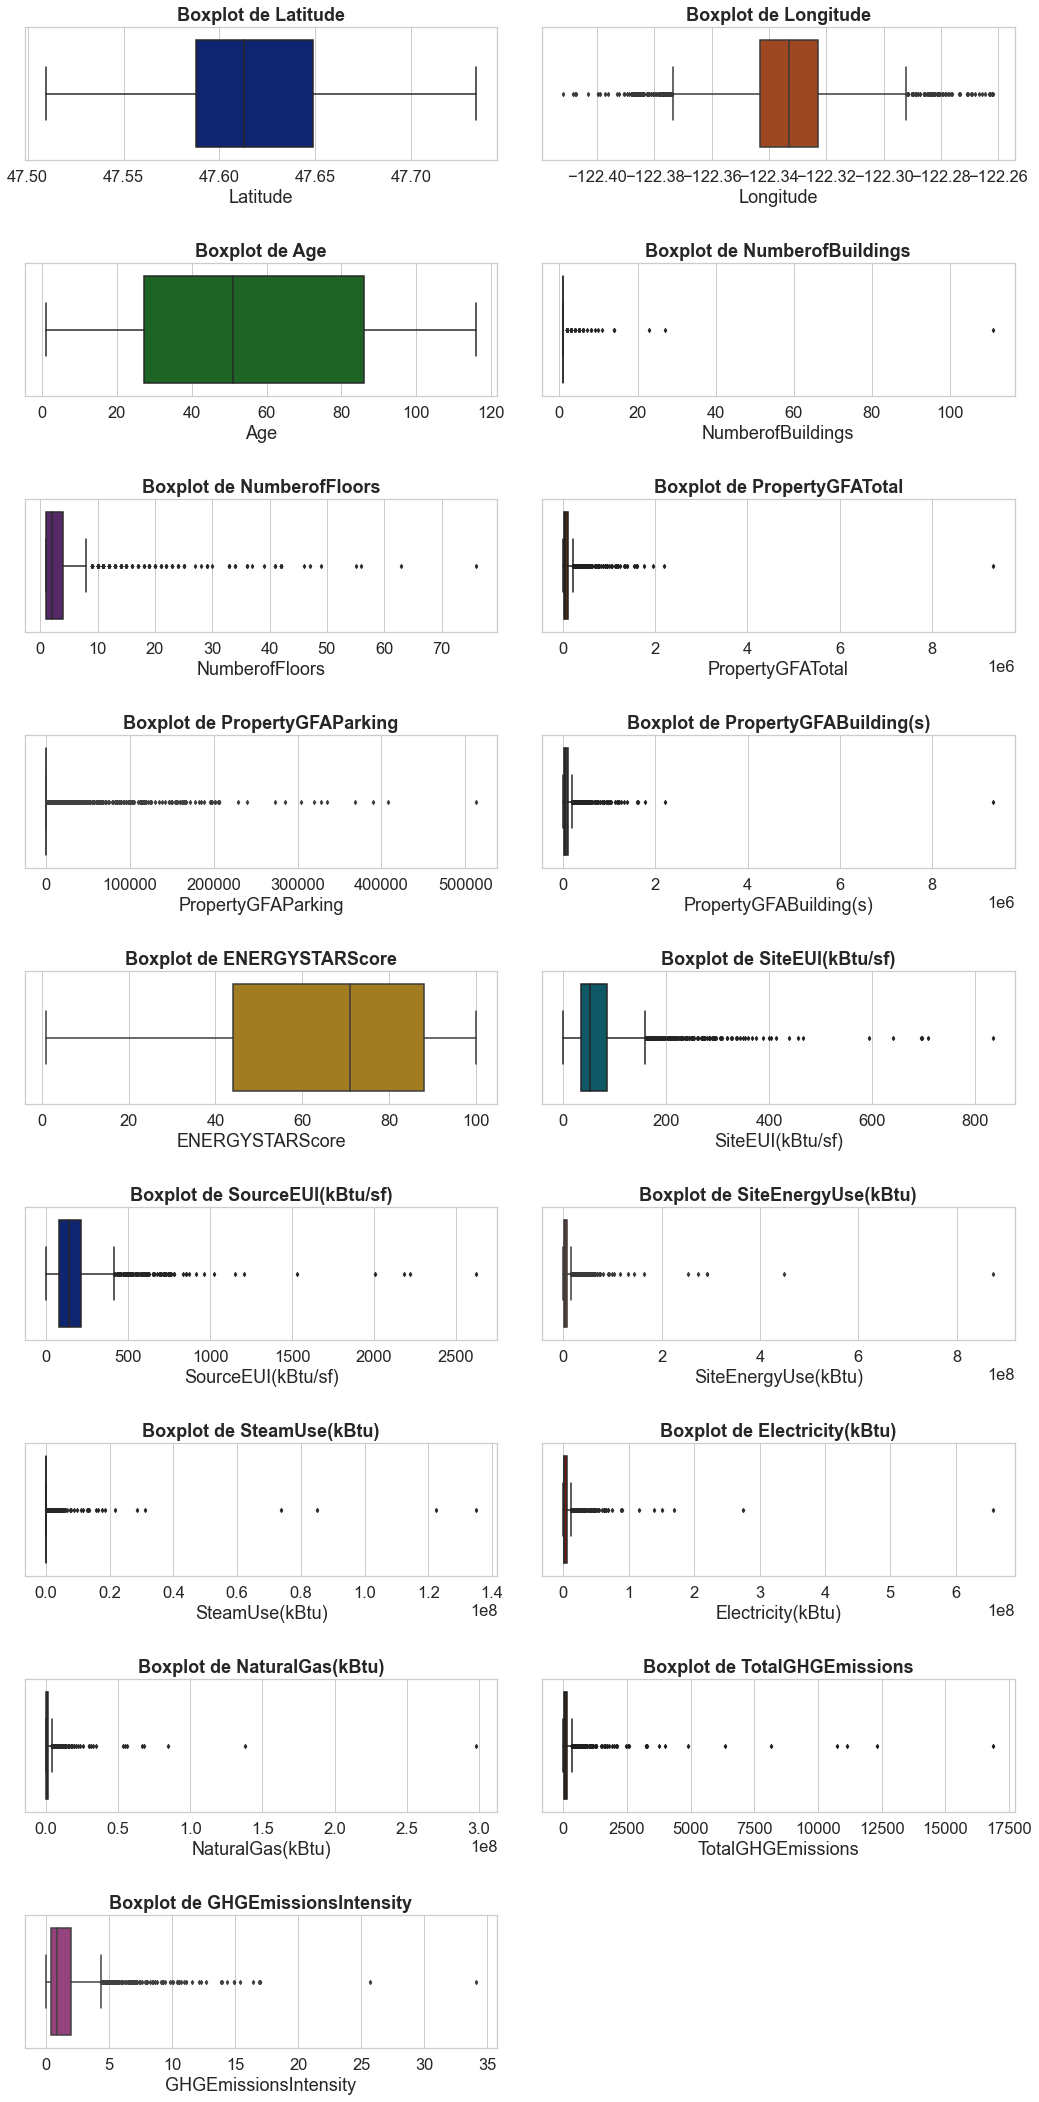

In [76]:
#Pour visualiser
plt.figure(figsize=(15, 30))
couleurs = sns.color_palette("dark", len(var_quanti))

#Un boxplot par variable
for i, (var, couleur) in enumerate(zip(var_quanti, couleurs), start=1):
    plt.subplot(9, 2, i)  #Pour avoir 9 lignes et 2 colonnes
    sns.boxplot(x=data_final[var], color=couleur, fliersize=3)
    plt.title(f'Boxplot de {var}', weight='bold')

plt.tight_layout(pad=2.0) #Un peu d'espace entre les lignes
plt.show()

Enormément d'outliers, difficile de discerner les médianes sur certains boxplots. On va essayer d'y voir plus clair lors des analyses bivariées
## 2) Bivariées <a class="anchor" id="iii2"></a>
### i) ANOVA <a class="anchor" id="iii2i"></a>
Il a beaucoup de variables, on ne va pas s'attarder à toutes les comparer une à une. En revanche on s'intéresse à leur effet sur nos 2 cibles : SiteEnergyUse(kBtu) et TotalGHGEmissions. Il s'agit donc dans un premier temps de comparer des variables qualitatives et quantitatives. Pour cela on va faire une analyse de variance (ANOVA). Voici comment nous allons procéder :
- Test de Kolmogorov-Smirnov pour tester l'hypothèse H0 selon laquelle les variables quantitatives suivent une distribution normale
    - Si oui, test paramétrique : F_oneway
    - Si non, test non paramétrique : Kruskal-Wallis

In [77]:
import scipy.stats as st
print("SiteEnergyUse :", st.kstest(data_final['SiteEnergyUse(kBtu)'], 'norm'))
print("TotalGHGEmissions :", st.kstest(data_final['TotalGHGEmissions'], 'norm'))

SiteEnergyUse : KstestResult(statistic=1.0, pvalue=0.0)
TotalGHGEmissions : KstestResult(statistic=0.9710239514966393, pvalue=0.0)


In [78]:
#Les p-value étant nulles nous devons réfuter H0, on appliquera le test de Kruskal-Wallis
#On va faire des boxplots pour visualiser
def analyse_variance(data, clusters, variables):
    
    modalites = [m for m in data[clusters].unique()]
    modalites.sort()

    medianprops = {'color':'black'}
    meanprops = {'marker':'o', 'markeredgecolor':'white', 'markerfacecolor':'firebrick', 'markersize':10}

    index = 1
    plt.figure(figsize=(20, 20))

    for var in variables:
        groupes = []

        #Boxplots
        for m in modalites:
            groupes.append(data[data[clusters] == m][var])
        plt.subplot(2, 2, index)
        plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
                    vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)

        #Calcul de l'ANOVA et récupération de la p-value
        resultat_anova = st.kruskal(*groupes)
        h_stat = round(resultat_anova.statistic, 2)
        p_value = round(resultat_anova.pvalue, 2)
        
        #Eta carré
        moyenne_y = data[var].mean()
        classes = []
        
        for modalite in modalites:
            yi_modalite = data[var][data[clusters] == modalite]
            classes.append({'ni': len(yi_modalite),
                            'moyenne': yi_modalite.mean()})
        SCT = sum([(yj - moyenne_y)**2 for yj in data[var]])  #Variation totale
        SCE = sum([c['ni'] * (c['moyenne'] - moyenne_y)**2 for c in classes])  #Variation interclasse
        eta_carre = round(SCE/SCT*100, 2)  #Eta carré
        
        plt.title(f'{var} par {clusters}\nANOVA (H={h_stat}, p-value={p_value})\nEta carré={eta_carre}%', weight='bold')
        plt.xlabel(clusters)
        plt.xticks(rotation=90, ha='right')
        plt.ylabel(var)
        plt.axhline(y=0, color='grey', ls='--')
        index += 1

    plt.tight_layout(pad=2.0)
    plt.show()

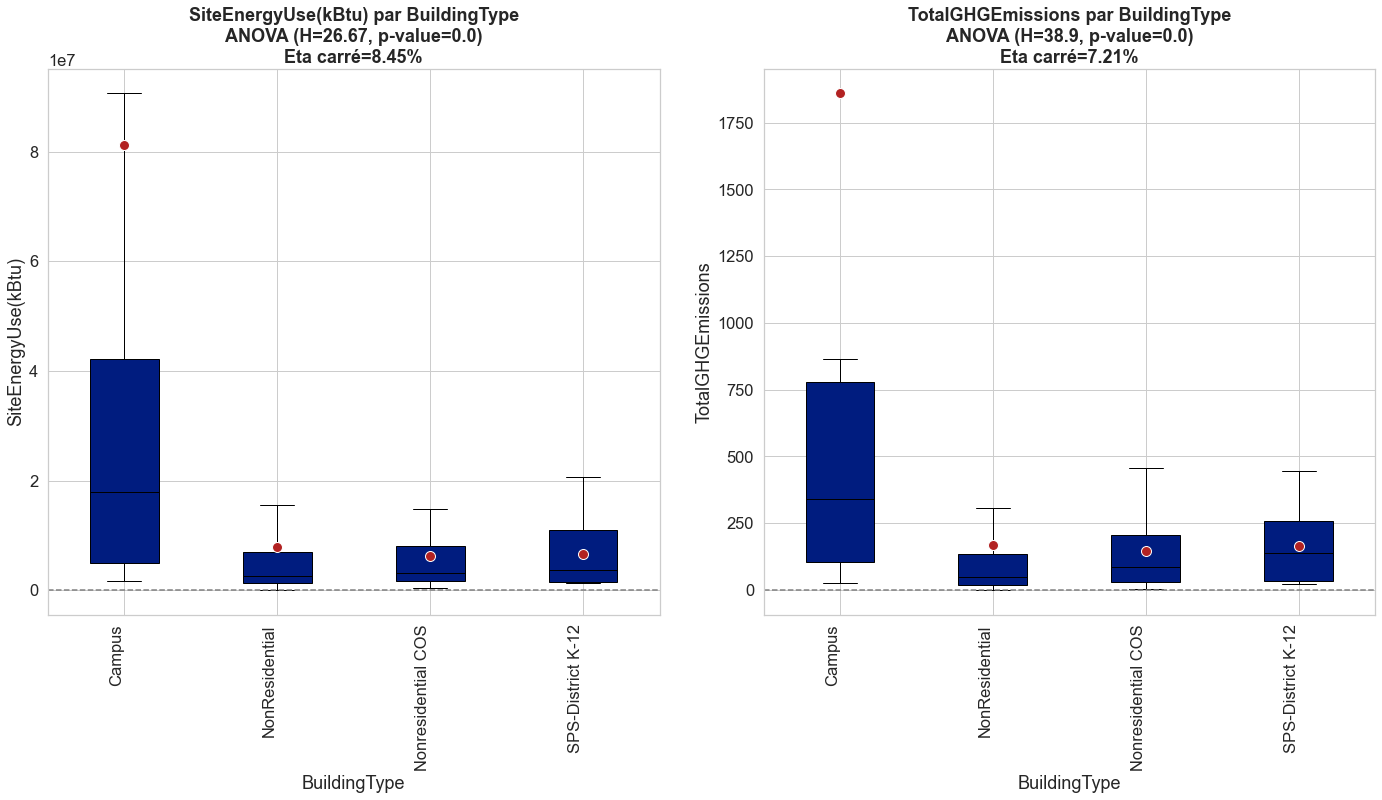

In [79]:
analyse_variance(data_final, var_quali[0], ['SiteEnergyUse(kBtu)','TotalGHGEmissions'])

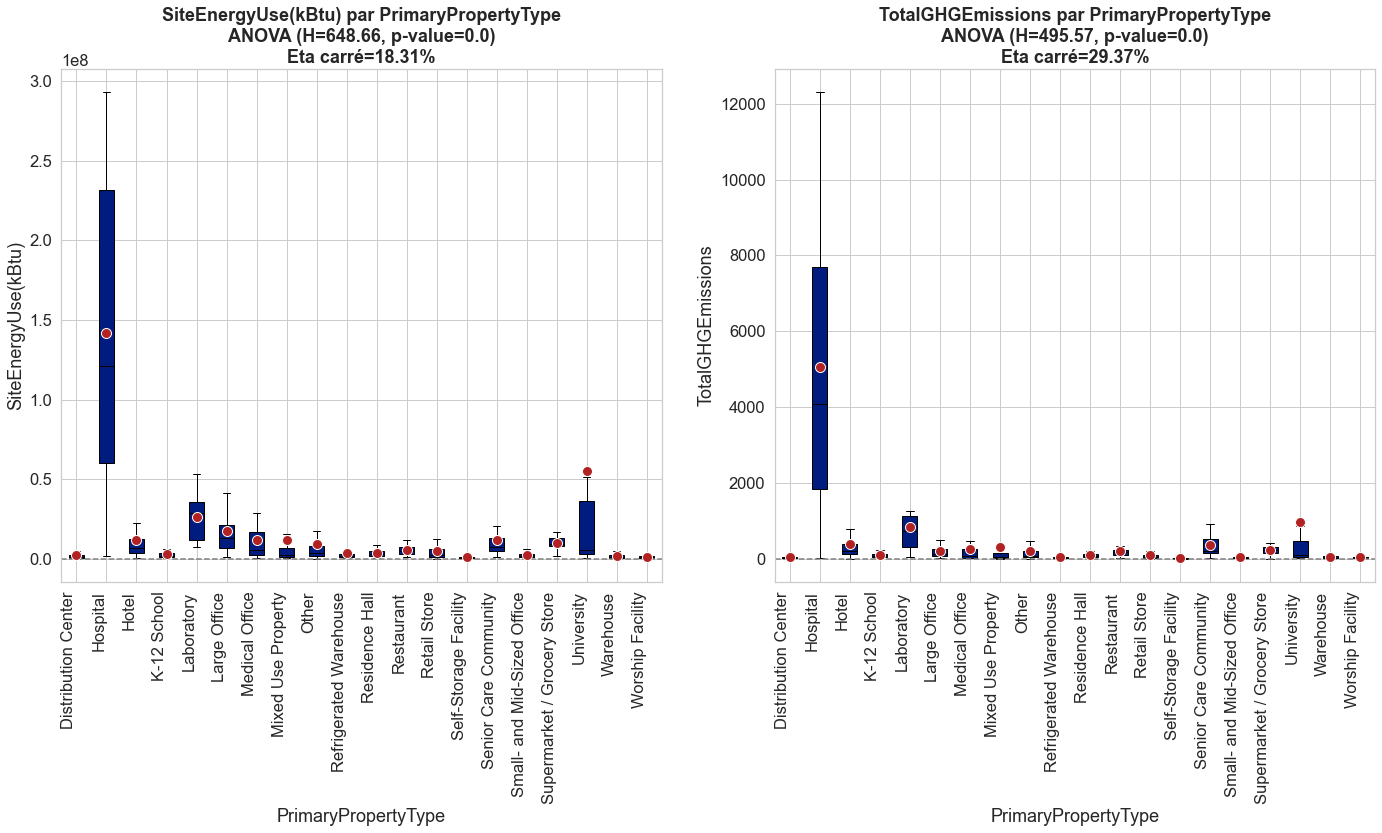

In [80]:
analyse_variance(data_final, var_quali[1], ['SiteEnergyUse(kBtu)','TotalGHGEmissions'])

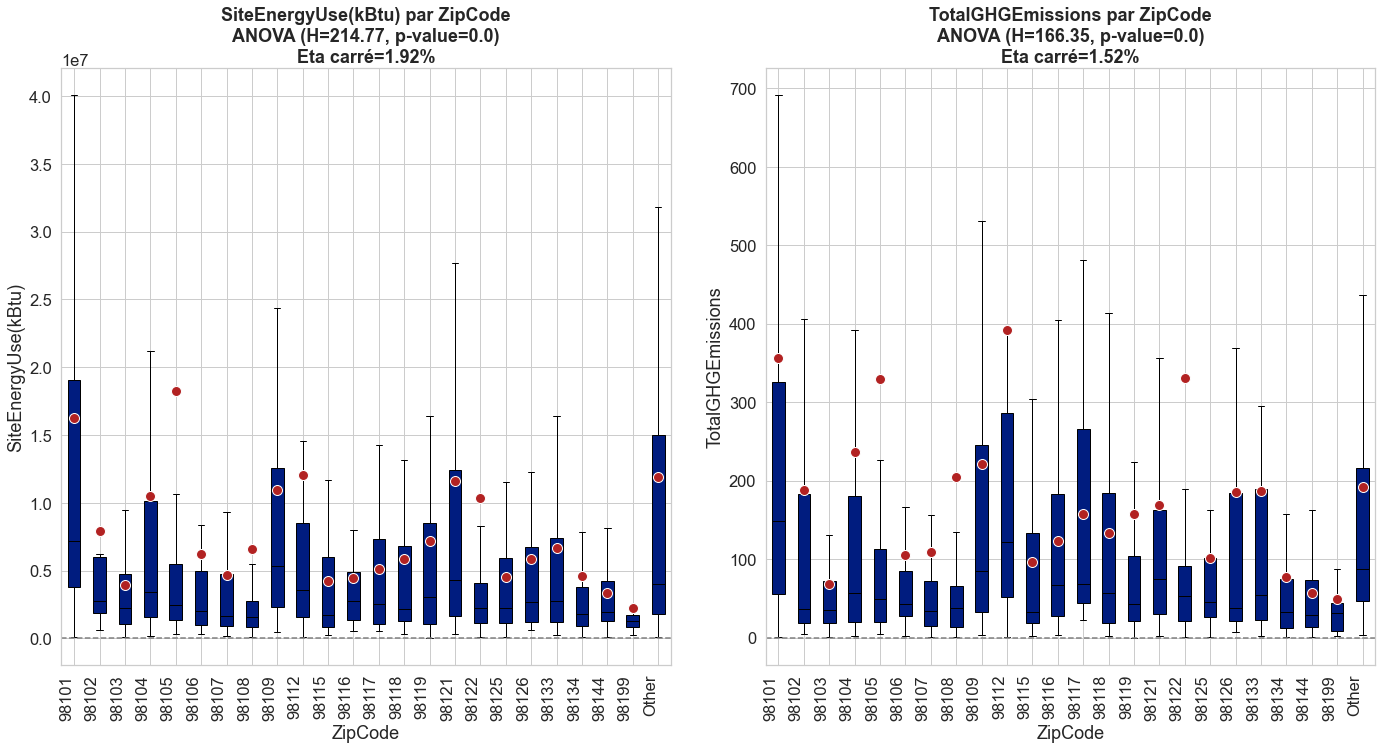

In [81]:
analyse_variance(data_final, var_quali[2], ['SiteEnergyUse(kBtu)','TotalGHGEmissions'])

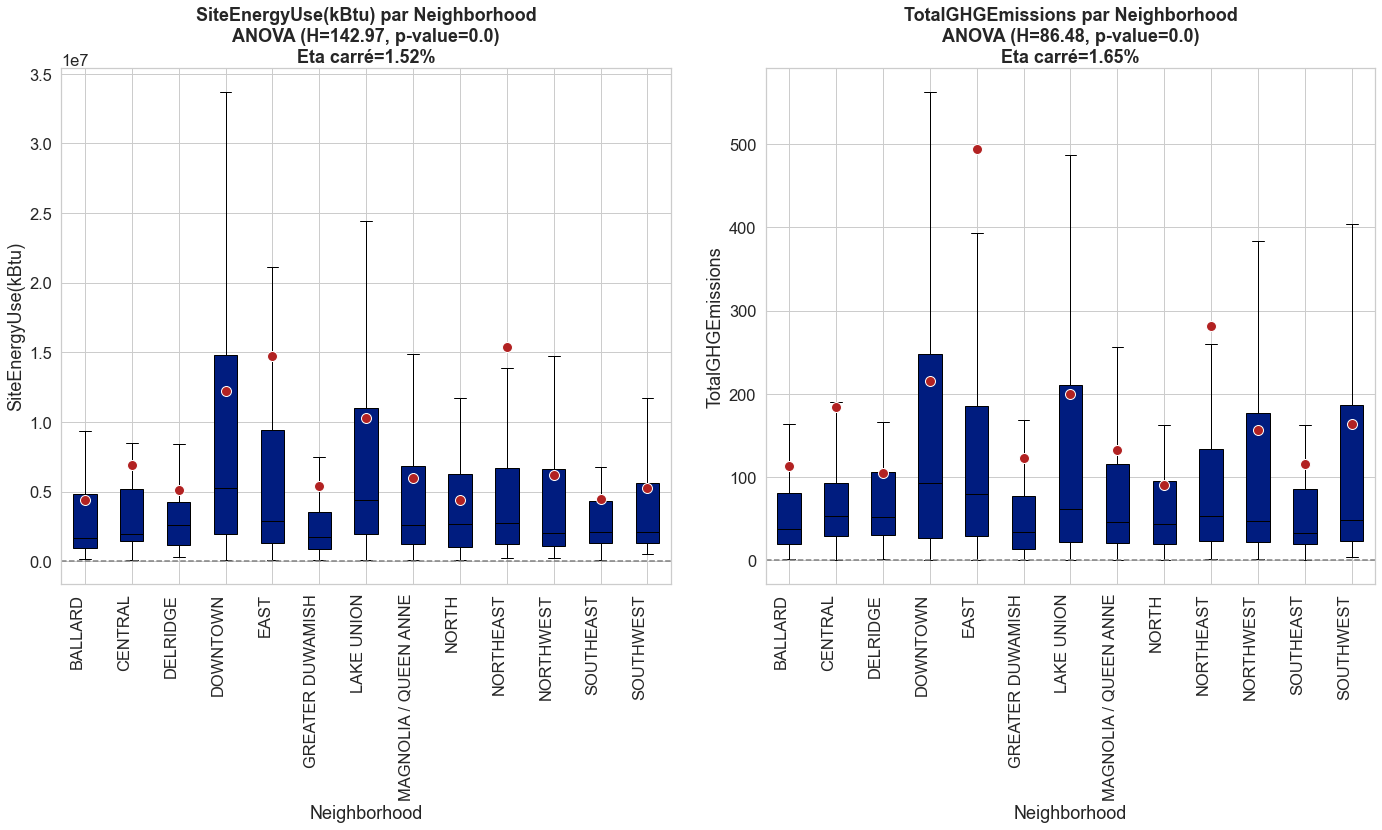

In [82]:
analyse_variance(data_final, var_quali[3], ['SiteEnergyUse(kBtu)','TotalGHGEmissions'])

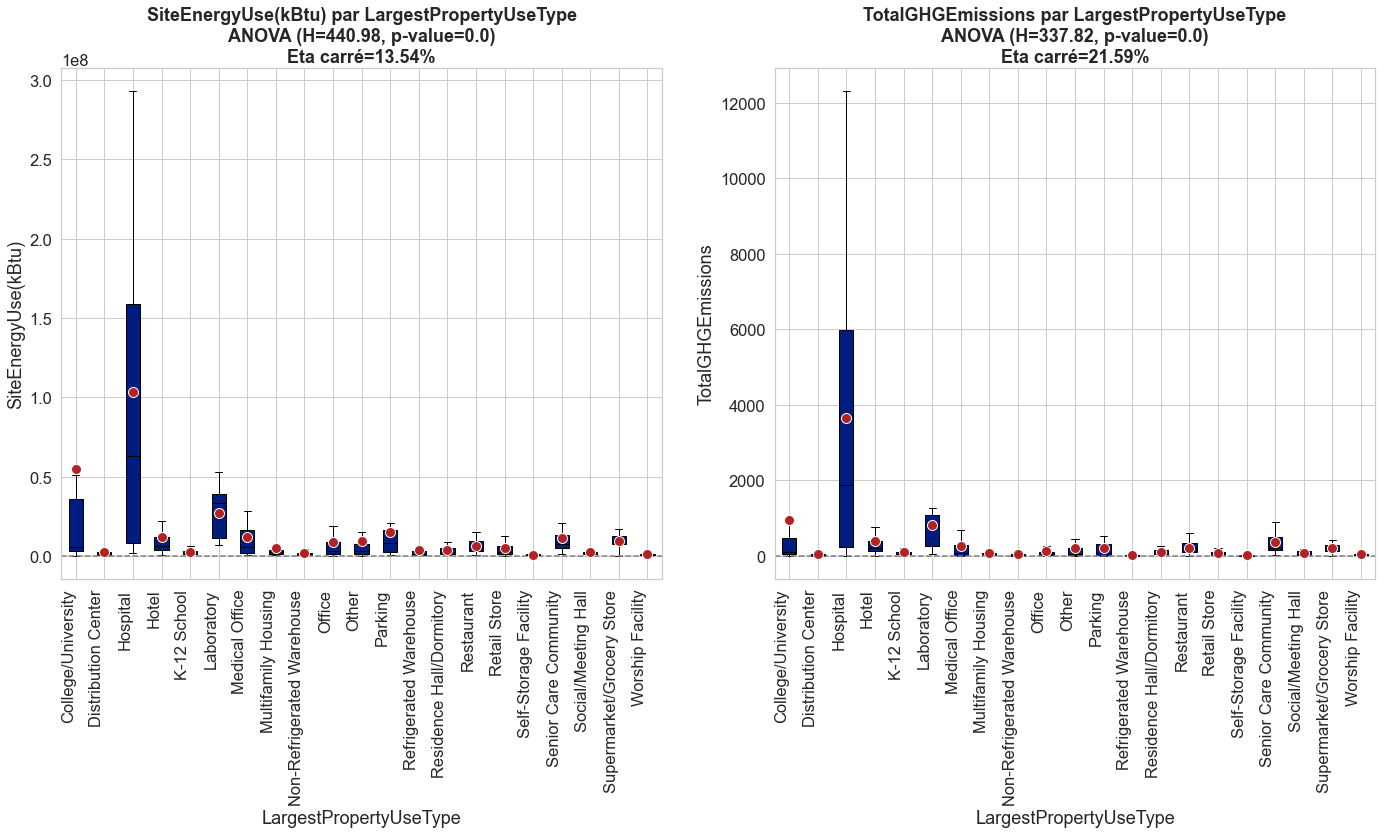

In [83]:
analyse_variance(data_final, var_quali[4], ['SiteEnergyUse(kBtu)','TotalGHGEmissions'])

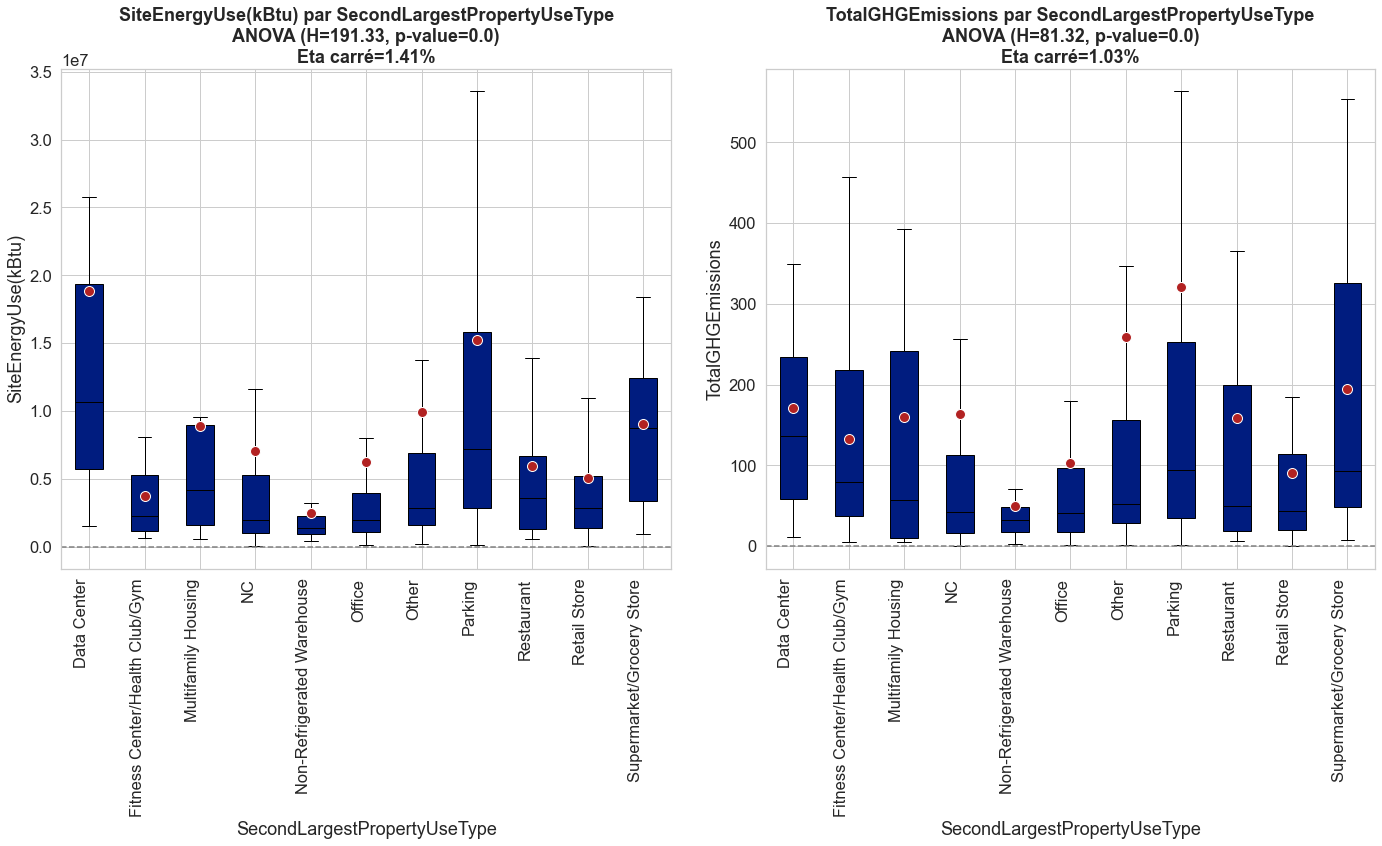

In [84]:
analyse_variance(data_final, var_quali[5], ['SiteEnergyUse(kBtu)','TotalGHGEmissions'])

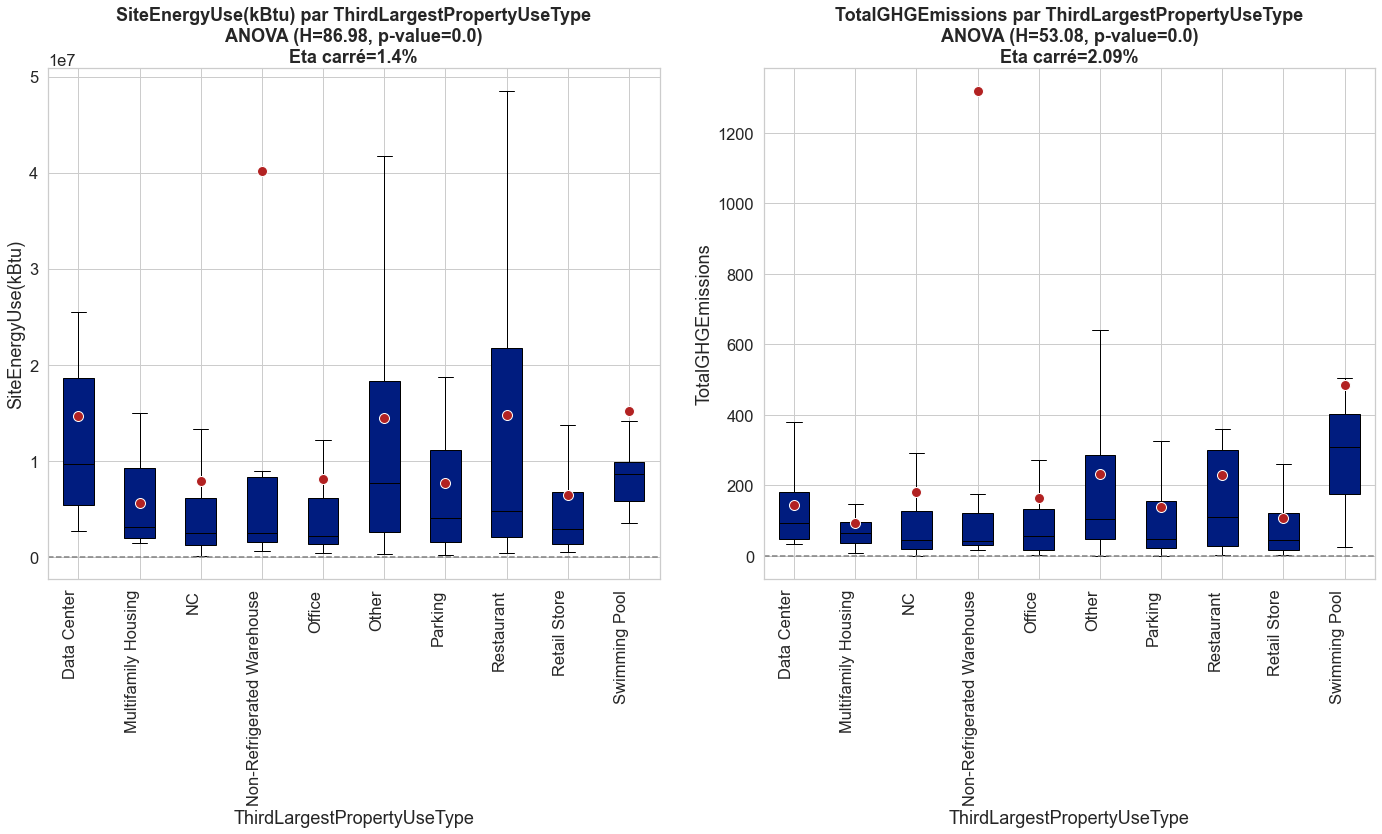

In [85]:
analyse_variance(data_final, var_quali[6], ['SiteEnergyUse(kBtu)','TotalGHGEmissions'])

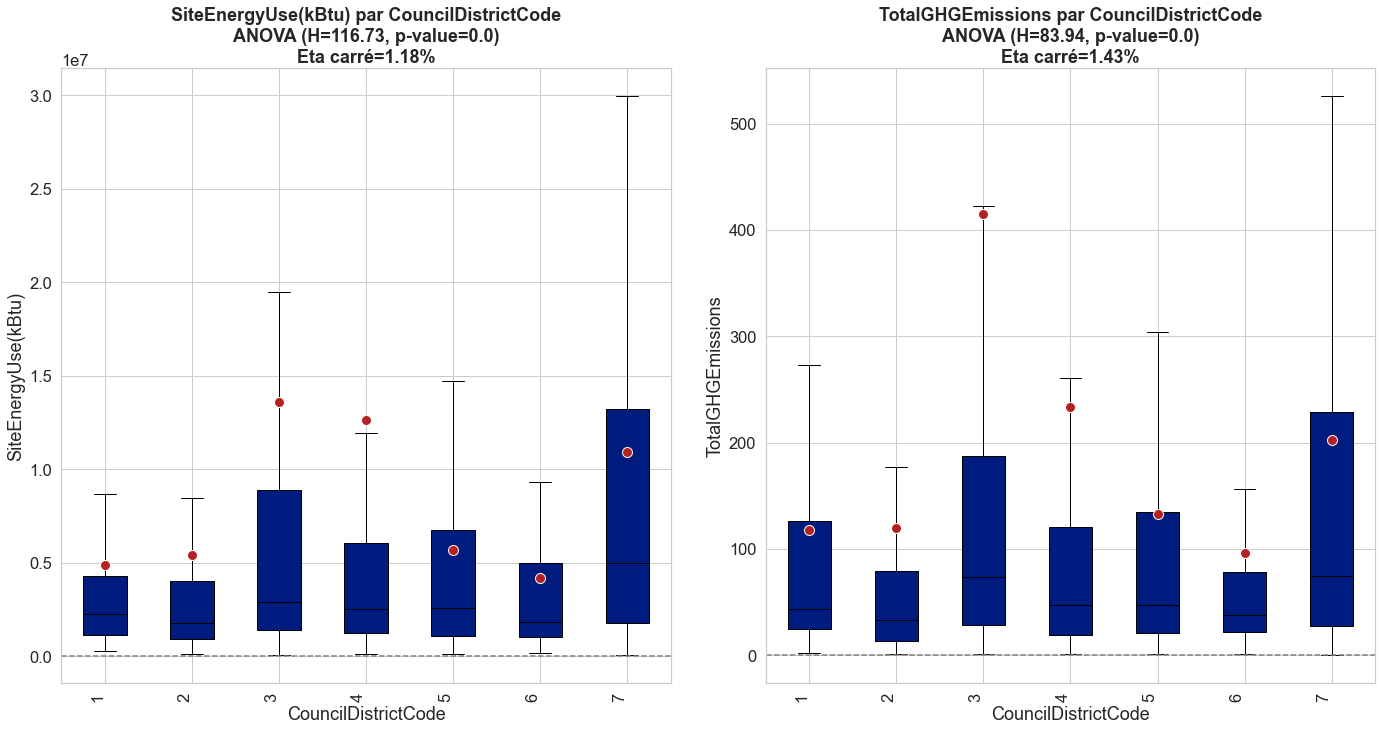

In [86]:
analyse_variance(data_final, var_quali[7], ['SiteEnergyUse(kBtu)','TotalGHGEmissions'])

La p-value est nulle dans tous les cas. Nous devons une nouvelle fois rejeter H0 et en conclure qu'il y existe des différences significatives quelle que soit la variable qualitative utilisée pour le clustering.

Le rapport de corrélation éta carré mesure la proportion de la variance totale de la variable quantitative qui est expliquée par les clusters. En d'autres termes, malgré une différence significative entre les moyennes des clusters pour une variable quantitative, un éta carré faible suggère que ces clusters n'expliquent qu'une petite partie de la variation sur cette variable.

Ainsi, il semble que LargestPropertyType et PrimaryPropertyType influencent SiteEnergyUse et TotalGHGEmissions davantage que les autres variables qualitatives.

On note qu'au premier regard, les campus et hôpitaux semblent se distinguer par des consommations/émissions plus élevées.

On enchaîne avec les variables quantitatives.
### ii) Quantitatives <a class="anchor" id="iii2ii"></a>

In [87]:
#Dans un premier temps je voudrais zoomer sur les variables Latitude et Longitude
import plotly.express as px

#On créé une map
fig = px.scatter_mapbox(data_final, 
                         lat="Latitude", lon="Longitude",
                         hover_name="PropertyName",
                         color="Neighborhood",
                         zoom=10, height=600)

#Taille et transparence des points
fig.update_traces(marker=dict(opacity=0.7, size=6, sizemode='diameter'))

#On personnalise
fig.update_layout(mapbox_style="carto-darkmatter")
fig.update_layout(title="Répartition des bâtiments par latitude et longitude", title_x=0.2)
fig.update_layout(margin={"r":0,"t":25,"l":0,"b":0})

fig.show()

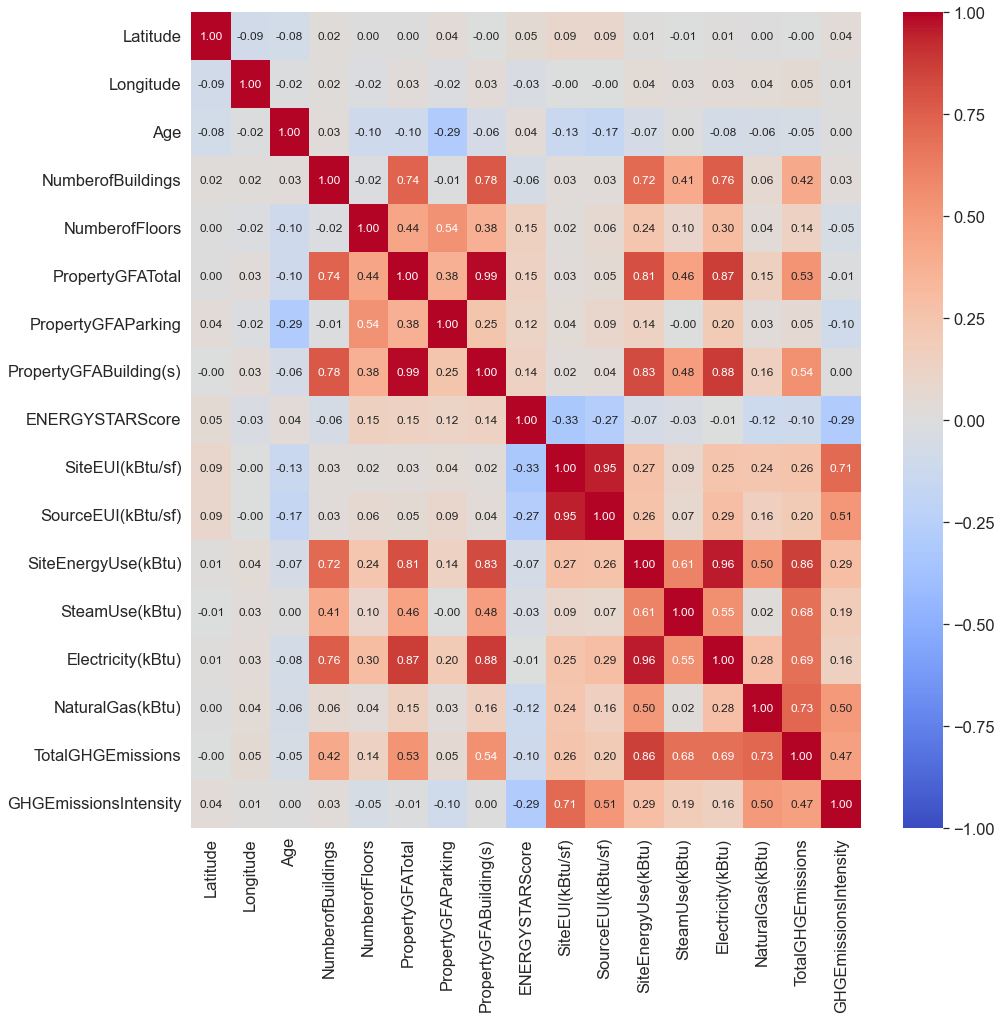

In [88]:
#On peut constater, comme on l'a vu plus tôt que Downtown et Greater Duwamish sont les quartiers les plus représentés
#On se focalise à nouveau sur SiteEnergyUse et TotalGHGEmissions
plt.figure(figsize=(15,15))
sns.heatmap(data_final[var_quanti].corr(), vmin=-1, annot=True, fmt='.2f', cmap="coolwarm", annot_kws={"size": 12})
plt.show()

Une nouvelle fois on va se focaliser sur nos 2 cibles : SiteEnergyUse(kBtu) et TotalGHGEmissions. La démarche est la même pour chaque paire de variables à tester :
- Test de Kolmogorov-Smirnov pour tester l'hypothèse H0 selon laquelle les variables suivent la même loi de distribution
    - Si oui, test paramétrique : Corrélation de Pearson
    - Si non, test non paramétrique : Corrélation de Spearman

In [89]:
cibles = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']
quanti_sans_ess = [col for col in data_final[var_quanti].columns if col != 'ENERGYSTARScore'] #A exclure ici à cause des NaNs

#Test de Kolmogorov-Smirnov pour chaque variable quantitative par rapport aux cibles
for var in data_final[quanti_sans_ess].columns:
    print("\n")
    for cible in cibles:
        stat, pvalue = st.ks_2samp(data_final[var], data_final[cible])
        print(f"{var} et {cible} : stat = {stat}, pvalue = {pvalue}")



Latitude et SiteEnergyUse(kBtu) : stat = 1.0, pvalue = 0.0
Latitude et TotalGHGEmissions : stat = 0.517464424320828, pvalue = 3.5625354078818502e-189


Longitude et SiteEnergyUse(kBtu) : stat = 1.0, pvalue = 0.0
Longitude et TotalGHGEmissions : stat = 1.0, pvalue = 0.0


Age et SiteEnergyUse(kBtu) : stat = 1.0, pvalue = 0.0
Age et TotalGHGEmissions : stat = 0.3014230271668823, pvalue = 2.292484028199876e-62


NumberofBuildings et SiteEnergyUse(kBtu) : stat = 1.0, pvalue = 0.0
NumberofBuildings et TotalGHGEmissions : stat = 0.9592496765847348, pvalue = 0.0


NumberofFloors et SiteEnergyUse(kBtu) : stat = 1.0, pvalue = 0.0
NumberofFloors et TotalGHGEmissions : stat = 0.8098318240620958, pvalue = 0.0


PropertyGFATotal et SiteEnergyUse(kBtu) : stat = 0.9094437257438551, pvalue = 0.0
PropertyGFATotal et TotalGHGEmissions : stat = 0.9987063389391979, pvalue = 0.0


PropertyGFAParking et SiteEnergyUse(kBtu) : stat = 0.98124191461837, pvalue = 0.0
PropertyGFAParking et TotalGHGEmissions : s

In [90]:
#Même chose avec ENERGYSTARScore en ignorant les NaNs
data_ess = data_final.dropna(subset=['ENERGYSTARScore'])
print("ENERGYSTARScore et SiteEnergyUse(kBtu) :", st.ks_2samp(data_ess['ENERGYSTARScore'], data_ess['SiteEnergyUse(kBtu)']))
print("ENERGYSTARScore et TotalGHGEmissions :", st.ks_2samp(data_ess['ENERGYSTARScore'], data_ess['TotalGHGEmissions']))

ENERGYSTARScore et SiteEnergyUse(kBtu) : KstestResult(statistic=1.0, pvalue=0.0)
ENERGYSTARScore et TotalGHGEmissions : KstestResult(statistic=0.32763819095477387, pvalue=1.1773773835033815e-47)


Latitude et SiteEnergyUse(kBtu) : R = 0.06974809007823626, pvalue = 0.0060776382976738125


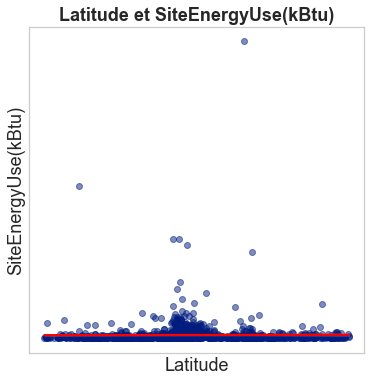

Latitude et TotalGHGEmissions : R = 0.06463226265352892, pvalue = 0.01102543134366349


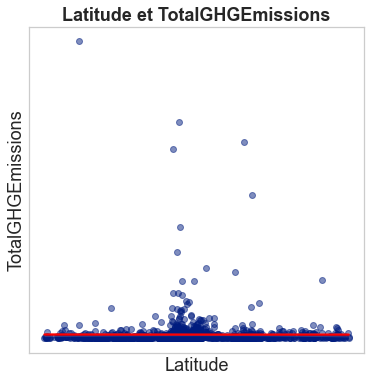

Longitude et SiteEnergyUse(kBtu) : R = -0.04831375706281222, pvalue = 0.057534085066228265


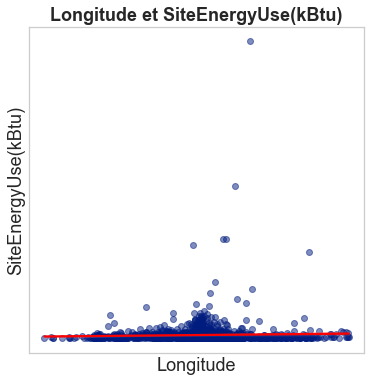

Longitude et TotalGHGEmissions : R = -0.025947897360356686, pvalue = 0.3079195425309155


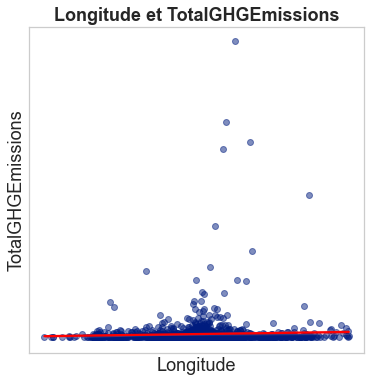

Age et SiteEnergyUse(kBtu) : R = -0.27990001818233856, pvalue = 3.1948277695550654e-29


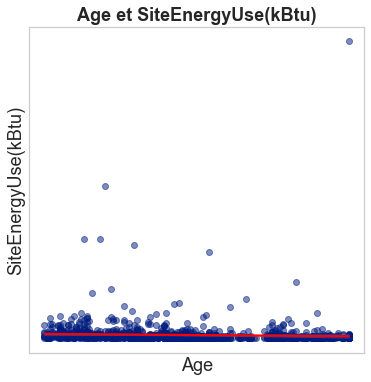

Age et TotalGHGEmissions : R = -0.16543736475725906, pvalue = 5.959441468202167e-11


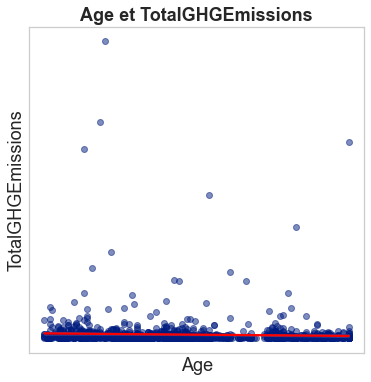

NumberofBuildings et SiteEnergyUse(kBtu) : R = 0.13649558020477046, pvalue = 7.13288896395552e-08


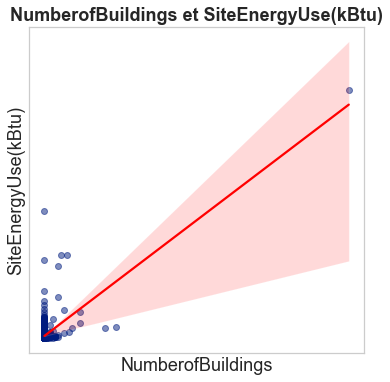

NumberofBuildings et TotalGHGEmissions : R = 0.13999727730162578, pvalue = 3.2506594609856076e-08


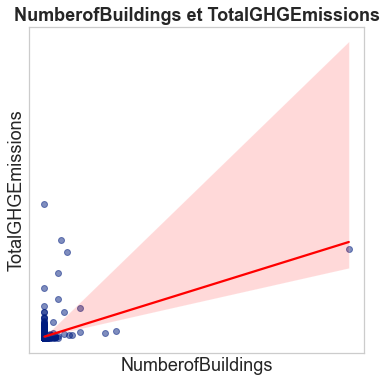

NumberofFloors et SiteEnergyUse(kBtu) : R = 0.44783511048319874, pvalue = 4.0510525111571546e-77


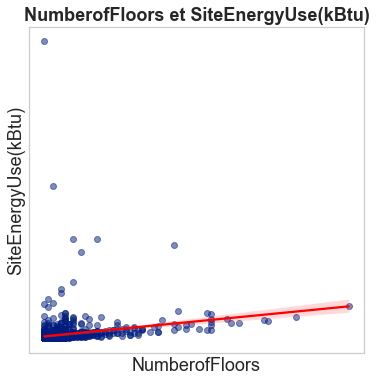

NumberofFloors et TotalGHGEmissions : R = 0.30075956029426965, pvalue = 1.0922894306001797e-33


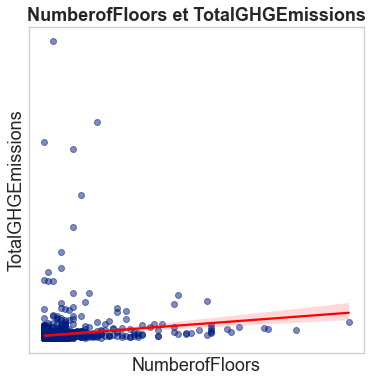

PropertyGFATotal et SiteEnergyUse(kBtu) : R = 0.7410416519188432, pvalue = 2.2679875873007043e-269


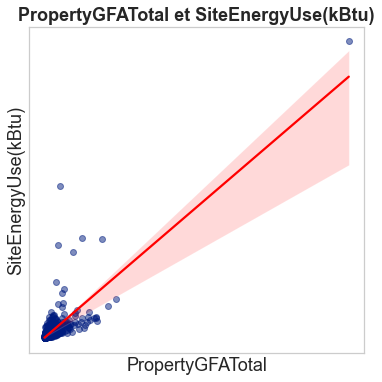

PropertyGFATotal et TotalGHGEmissions : R = 0.5696820919288025, pvalue = 1.0078553529410081e-133


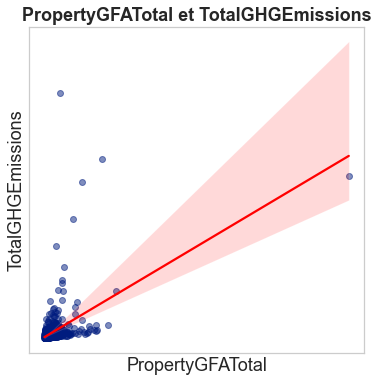

PropertyGFAParking et SiteEnergyUse(kBtu) : R = 0.35647617758811606, pvalue = 1.5406222036086083e-47


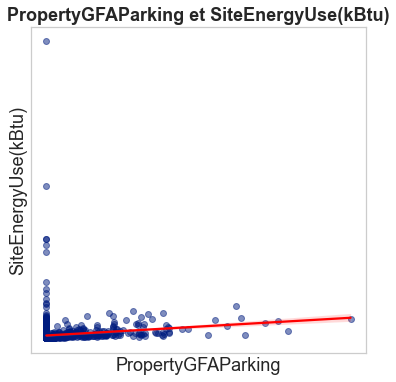

PropertyGFAParking et TotalGHGEmissions : R = 0.20613670933087602, pvalue = 2.6859466576391514e-16


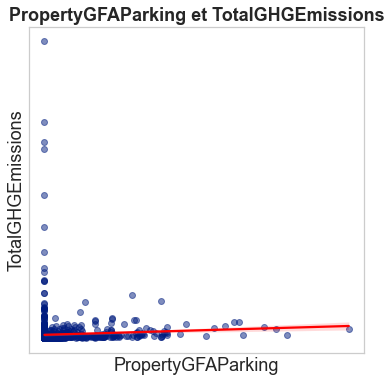

PropertyGFABuilding(s) et SiteEnergyUse(kBtu) : R = 0.724226571502715, pvalue = 1.6021747947044168e-251


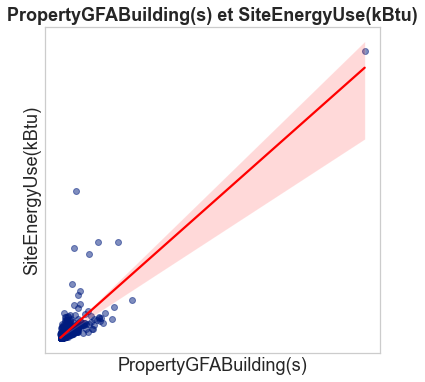

PropertyGFABuilding(s) et TotalGHGEmissions : R = 0.5709614751127116, pvalue = 1.893606991612431e-134


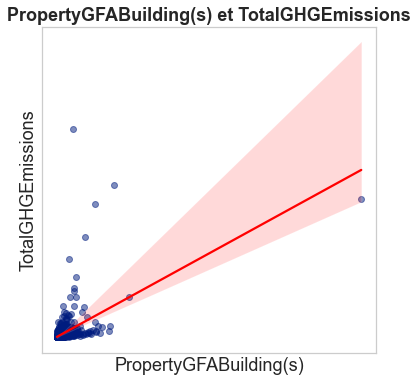

SiteEUI(kBtu/sf) et SiteEnergyUse(kBtu) : R = 0.7143909724877615, pvalue = 1.1017724299305866e-241


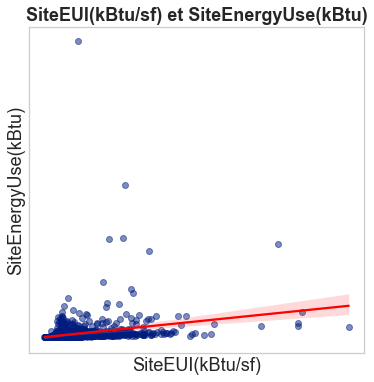

SiteEUI(kBtu/sf) et TotalGHGEmissions : R = 0.671993524706687, pvalue = 1.1972120925490367e-203


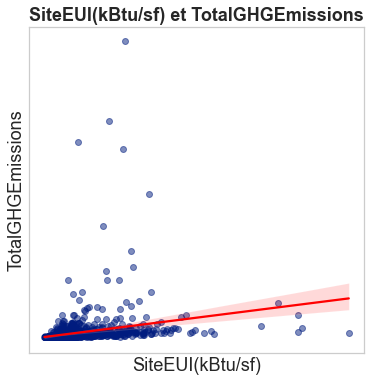

SourceEUI(kBtu/sf) et SiteEnergyUse(kBtu) : R = 0.7306127581667804, pvalue = 3.8459155332822417e-258


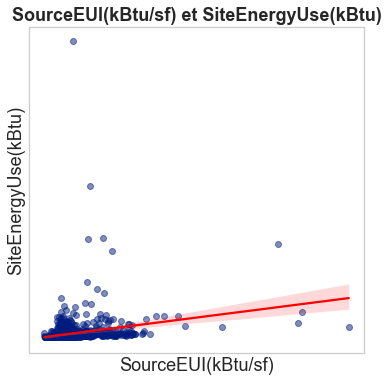

SourceEUI(kBtu/sf) et TotalGHGEmissions : R = 0.5546830876154198, pvalue = 1.9187229823779827e-125


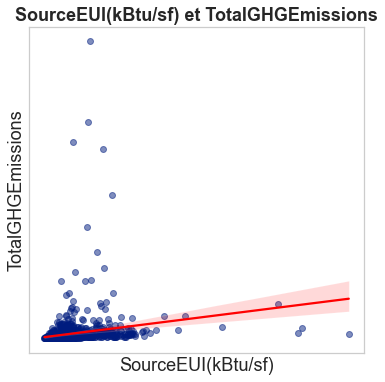

SiteEnergyUse(kBtu) et SiteEnergyUse(kBtu) : R = 1.0, pvalue = 0.0


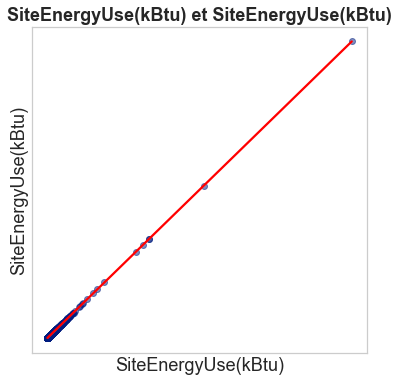

SiteEnergyUse(kBtu) et TotalGHGEmissions : R = 0.8635917444020893, pvalue = 0.0


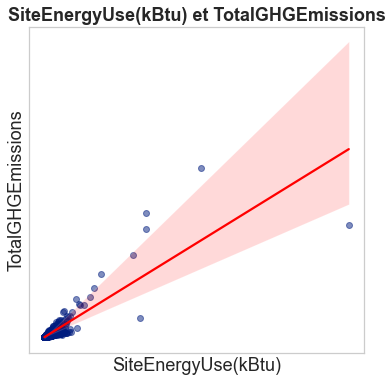

SteamUse(kBtu) et SiteEnergyUse(kBtu) : R = 0.23099554201902872, pvalue = 3.5824052313855244e-20


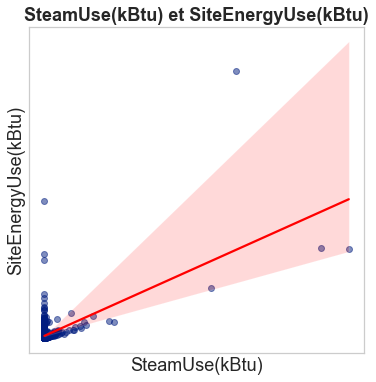

SteamUse(kBtu) et TotalGHGEmissions : R = 0.3016834372472582, pvalue = 6.7888155623412645e-34


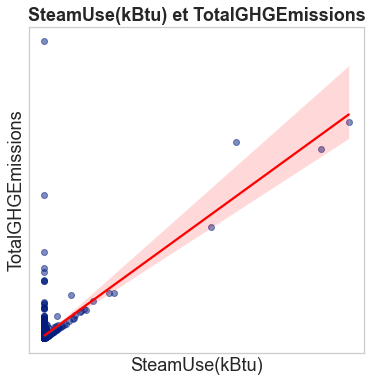

Electricity(kBtu) et SiteEnergyUse(kBtu) : R = 0.9276055980790896, pvalue = 0.0


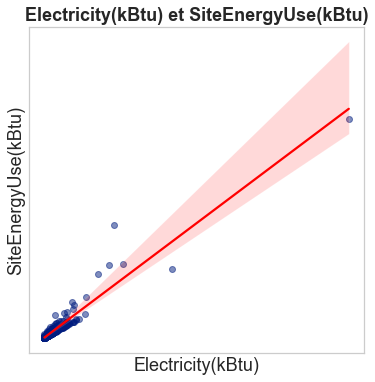

Electricity(kBtu) et TotalGHGEmissions : R = 0.6566085001850536, pvalue = 2.2758656014186498e-191


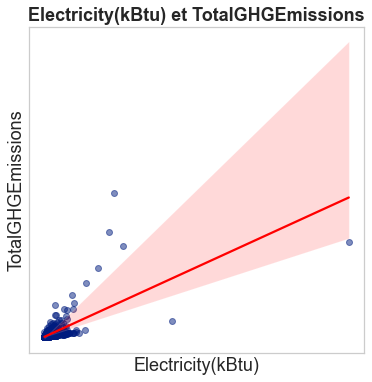

NaturalGas(kBtu) et SiteEnergyUse(kBtu) : R = 0.4229265559272836, pvalue = 4.048368321656647e-68


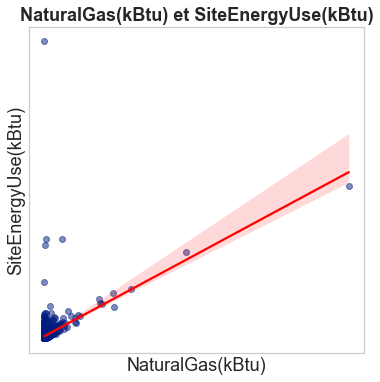

NaturalGas(kBtu) et TotalGHGEmissions : R = 0.7221131962308317, pvalue = 2.2612504962359253e-249


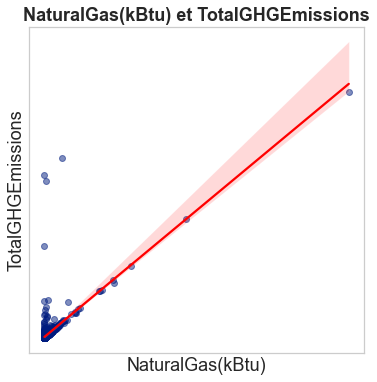

TotalGHGEmissions et SiteEnergyUse(kBtu) : R = 0.8635917444020894, pvalue = 0.0


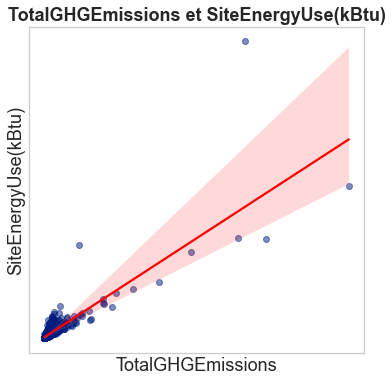

TotalGHGEmissions et TotalGHGEmissions : R = 1.0, pvalue = 0.0


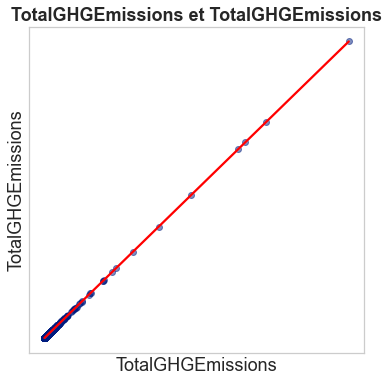

GHGEmissionsIntensity et SiteEnergyUse(kBtu) : R = 0.43791610011933196, pvalue = 1.9132051957440462e-73


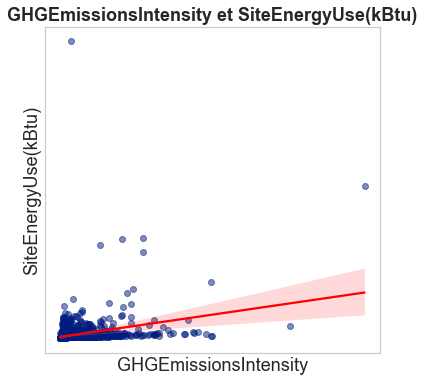

GHGEmissionsIntensity et TotalGHGEmissions : R = 0.7380954779043802, pvalue = 3.8232701480121554e-266


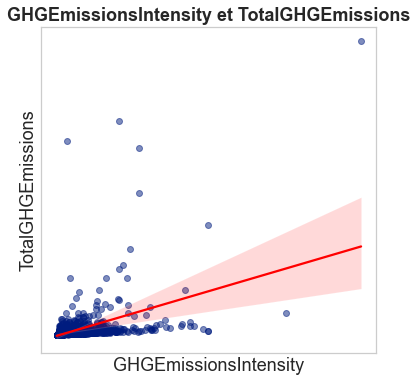

In [91]:
#Les p-value étant nulles ou proches de 0, dans tous les cas nous devons réfuter H0, on applique la corrélation de Spearman
#La corrélation de Spearman teste l'hypothèse H0 selon laquelle les variables ne sont pas corrélées
for var in data_final[quanti_sans_ess].columns:
    for cible in cibles:
        corr, pvalue = st.spearmanr(data_final[var], data_final[cible])
        print(f"{var} et {cible} : R = {corr}, pvalue = {pvalue}")

        #Pour visualiser
        plt.figure(figsize=(6, 6))
        sns.regplot(x=var, y=cible, data=data_final, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
        plt.title(f"{var} et {cible}", weight='bold')
        plt.xlabel(var)
        plt.ylabel(cible)
        
        #Retrait des xticks et yticks pour alléger le résultat
        plt.xticks([])
        plt.yticks([])
        
        plt.show()

ENERGYSTARScore et SiteEnergyUse(kBtu) : SpearmanrResult(correlation=-0.1455381256989678, pvalue=4.034586373162078e-06)


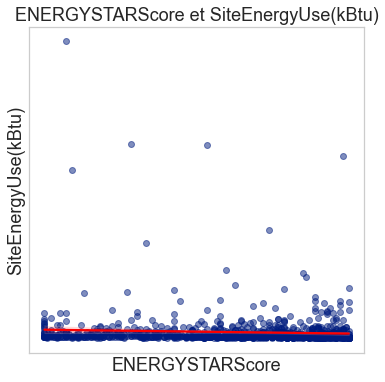

ENERGYSTARScore et TotalGHGEmissions : SpearmanrResult(correlation=-0.1239220655099938, pvalue=8.886086182256848e-05)


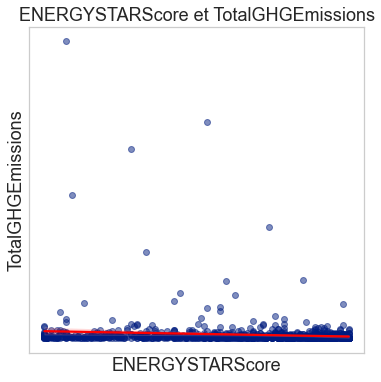

In [92]:
data_ess = data_ess.copy() #Pour éviter un message d'erreur
data_ess['ENERGYSTARScore'] = data_ess['ENERGYSTARScore'].astype('int64') #Problème de format pour le regplot, et conversion possible car pas de NaNs ici

print("ENERGYSTARScore et SiteEnergyUse(kBtu) :", st.spearmanr(data_ess['ENERGYSTARScore'], data_ess['SiteEnergyUse(kBtu)']))

plt.figure(figsize=(6, 6))
sns.regplot(x='ENERGYSTARScore', y='SiteEnergyUse(kBtu)', data=data_ess, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.title("ENERGYSTARScore et SiteEnergyUse(kBtu)")
plt.xlabel('ENERGYSTARScore')
plt.ylabel('SiteEnergyUse(kBtu)')
plt.xticks([])
plt.yticks([])
plt.show()

print("ENERGYSTARScore et TotalGHGEmissions :", st.spearmanr(data_ess['ENERGYSTARScore'], data_ess['TotalGHGEmissions']))

plt.figure(figsize=(6, 6))
sns.regplot(x='ENERGYSTARScore', y='TotalGHGEmissions', data=data_ess, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})
plt.title("ENERGYSTARScore et TotalGHGEmissions")
plt.xlabel('ENERGYSTARScore')
plt.ylabel('TotalGHGEmissions')
plt.xticks([])
plt.yticks([])
plt.show()

Les p-value étant nulles ou proches de 0, dans tous les cas nous devons réfuter H0. Cependant, à en juger par les reglots, Latitude et Longitude semblent ne pas avoir de relation linéaire avec nos cibles, je vais même les retirer du jeu de données. D'autres variables telles ENERGYSTARScore, Age semblent plus faiblement associées à nos cibles que le reste des variables.

On en a fini avec la partie exploratoire, on exporte data_final et on passe à la modélisation dans un autre notebook.
# IV) Export <a class="anchor" id="iv"></a>

In [93]:
data_final.drop(columns=['Latitude', 'Longitude'], inplace=True)
data_final

OSEBuildingID        BuildingType PrimaryPropertyType  \
0                 1      NonResidential               Hotel   
1                 2      NonResidential               Hotel   
2                 3      NonResidential               Hotel   
3                 5      NonResidential               Hotel   
4                 8      NonResidential               Hotel   
...             ...                 ...                 ...   
1541          50221  Nonresidential COS               Other   
1542          50223  Nonresidential COS               Other   
1543          50224  Nonresidential COS               Other   
1544          50225  Nonresidential COS  Mixed Use Property   
1545          50226  Nonresidential COS  Mixed Use Property   

                             PropertyName ZipCode  CouncilDistrictCode  \
0                    Mayflower park hotel   98101                    7   
1                         Paramount Hotel   98101                    7   
2                 5673-The Westin Seattle   98101                    7   
3                               HOTEL MAX   98101                    7   
4             WARWICK SEATTLE HOTEL (ID8)   98121                    7   
...                                   ...     ...                  ...   
1541          High Point Community Center   98126                    1   
1542  International district/Chinatown CC   98104                    2   
1543                      Queen Anne Pool   98119                    7   
1544          South Park Community Center   98108                    1   
1545          Van Asselt Community Center   98108                    2   

               Neighborhood  Age  NumberofBuildings  NumberofFloors  \
0                  DOWNTOWN   89                  1              12   
1                  DOWNTOWN   20                  1              11   
2                  DOWNTOWN   47                  1              41   
3                  DOWNTOWN   90                  1              10   
4                  DOWNTOWN   36                  1              18   
...                     ...  ...                ...             ...   
1541               DELRIDGE   34                  1               1   
1542               DOWNTOWN   12                  1               1   
1543  MAGNOLIA / QUEEN ANNE   42                  1               1   
1544       GREATER DUWAMISH   27                  1               1   
1545       GREATER DUWAMISH   78                  1               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2               956110              196718                  759392   
3                61320                   0                   61320   
4               175580               62000                  113580   
...                ...                 ...                     ...   
1541             18261                   0                   18261   
1542             16000                   0                   16000   
1543             13157                   0                   13157   
1544             14101                   0                   14101   
1545             18258                   0                   18258   

     LargestPropertyUseType    SecondLargestPropertyUseType  \
0                     Hotel                              NC   
1                     Hotel                         Parking   
2                     Hotel                              NC   
3                     Hotel                              NC   
4                     Hotel                         Parking   
...                     ...                             ...   
1541                  Other                              NC   
1542                  Other                              NC   
1543                  Other  Fitness Center/Health Club/Gym   
1544                  Other  Fitness

In [94]:
data_final.to_pickle('data_final.pkl')